In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/My Drive/code_ques.csv")
df.head()

0         1         2         3         4         5         6  \
0 -1.355365  2.348287  1.030452 -1.503548 -0.380958  1.095197 -2.063201   
1 -1.403411  2.131454  1.117223 -1.542901 -0.351417  1.042730 -2.025140   
2 -1.388594  2.358305  0.994477 -1.480365 -0.382565  1.104627 -2.042682   
3 -1.352139  2.155489  1.027737 -1.424550 -0.316464  1.111701 -2.039937   
4 -1.411875  2.337363  1.050743 -1.506995 -0.321872  1.118751 -2.068671   

          7         8         9  ...       759       760       761       762  \
0 -1.657276  0.780015  0.224140  ... -2.330601  0.542652 -1.660974 -2.150713   
1 -1.812830  0.707280  0.165037  ... -2.183963  0.488854 -1.674375 -2.027182   
2 -1.669257  0.800453  0.265268  ... -2.347989  0.555944 -1.651969 -2.149015   
3 -1.789147  0.725883  0.298638  ... -2.216481  0.487809 -1.595799 -2.143987   
4 -1.603735  0.730069  0.242844  ... -2.279187  0.451709 -1.607142 -2.184134   

        763       764       765       766       767  score  
0  0.545611 -1.614411 -0.133085 -2.134145  1.184289   10.0  
1  0.514854 -1.625416  0.014533 -2.156347  1.088794    8.0  
2  0.582454 -1.606852 -0.164269 -2.139201  1.158317    7.0  
3  0.419316 -1.635483 -0.074271 -2.112344  1.094625    5.0  
4  0.521283 -1.604708 -0.055002 -2.056900  1.290956    6.0  

[5 rows x 769 columns]

In [ ]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    print(col)
    print(df[col].isnull().sum())

score
4


In [ ]:
mean_value = df['score'].mean()

df['score'].fillna(mean_value, inplace=True)

# Display the DataFrame after imputation
print("DataFrame after imputation:")
df.head()

DataFrame after imputation:


0         1         2         3         4         5         6  \
0 -1.355365  2.348287  1.030452 -1.503548 -0.380958  1.095197 -2.063201   
1 -1.403411  2.131454  1.117223 -1.542901 -0.351417  1.042730 -2.025140   
2 -1.388594  2.358305  0.994477 -1.480365 -0.382565  1.104627 -2.042682   
3 -1.352139  2.155489  1.027737 -1.424550 -0.316464  1.111701 -2.039937   
4 -1.411875  2.337363  1.050743 -1.506995 -0.321872  1.118751 -2.068671   

          7         8         9  ...       759       760       761       762  \
0 -1.657276  0.780015  0.224140  ... -2.330601  0.542652 -1.660974 -2.150713   
1 -1.812830  0.707280  0.165037  ... -2.183963  0.488854 -1.674375 -2.027182   
2 -1.669257  0.800453  0.265268  ... -2.347989  0.555944 -1.651969 -2.149015   
3 -1.789147  0.725883  0.298638  ... -2.216481  0.487809 -1.595799 -2.143987   
4 -1.603735  0.730069  0.242844  ... -2.279187  0.451709 -1.607142 -2.184134   

        763       764       765       766       767  score  
0  0.545611 -1.614411 -0.133085 -2.134145  1.184289   10.0  
1  0.514854 -1.625416  0.014533 -2.156347  1.088794    8.0  
2  0.582454 -1.606852 -0.164269 -2.139201  1.158317    7.0  
3  0.419316 -1.635483 -0.074271 -2.112344  1.094625    5.0  
4  0.521283 -1.604708 -0.055002 -2.056900  1.290956    6.0  

[5 rows x 769 columns]

In [ ]:
'''flag=False
for col in df.columns:
  if df[col].isnull().sum()>0:
    flag=True
    print(col)
    print(df[col].isnull().sum())
if flag==False:
  print("NO NULL VALUES")'''

'flag=False\nfor col in df.columns:\n  if df[col].isnull().sum()>0:\n    flag=True\n    print(col)\n    print(df[col].isnull().sum())\nif flag==False:\n  print("NO NULL VALUES")'

In [ ]:
df.shape

(1176, 769)

In [ ]:
'''from scipy import stats
z_scores = np.abs(stats.zscore(df))

# Count the number of outliers for each feature
outlier_counts = pd.DataFrame((z_scores > 2).sum(axis=0), columns=['Outlier Count'])

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(outlier_counts)'''

'from scipy import stats\nz_scores = np.abs(stats.zscore(df))\n\n# Count the number of outliers for each feature\noutlier_counts = pd.DataFrame((z_scores > 2).sum(axis=0), columns=[\'Outlier Count\'])\n\n# Print the number of outliers for each feature\nprint("Number of outliers for each feature:")\nprint(outlier_counts)'

In [ ]:
'''sorted_df=outlier_counts.sort_values(by='Outlier Count')
sorted_df.tail()'''

"sorted_df=outlier_counts.sort_values(by='Outlier Count')\nsorted_df.tail()"

In [ ]:
'''import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset with 5 features
# Replace this with your actual dataset

# Select the 5 features
selected_features = ['103', '658', '520', '111', '25']
data = df[selected_features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(data_scaled)

# Identify unique rows with outliers
unique_rows_with_outliers = df[outlier_labels == -1].drop_duplicates()

# Display the number of unique rows with outliers
num_unique_rows_with_outliers = len(unique_rows_with_outliers)
print("Number of Unique Rows with Outliers:", num_unique_rows_with_outliers)
'''

'import pandas as pd\nfrom sklearn.cluster import DBSCAN\nfrom sklearn.preprocessing import StandardScaler\n\n# Assuming \'df\' is your dataset with 5 features\n# Replace this with your actual dataset\n\n# Select the 5 features\nselected_features = [\'103\', \'658\', \'520\', \'111\', \'25\']\ndata = df[selected_features]\n\n# Standardize the data\nscaler = StandardScaler()\ndata_scaled = scaler.fit_transform(data)\n\n# Apply DBSCAN for outlier detection\ndbscan = DBSCAN(eps=0.5, min_samples=5)\noutlier_labels = dbscan.fit_predict(data_scaled)\n\n# Identify unique rows with outliers\nunique_rows_with_outliers = df[outlier_labels == -1].drop_duplicates()\n\n# Display the number of unique rows with outliers\nnum_unique_rows_with_outliers = len(unique_rows_with_outliers)\nprint("Number of Unique Rows with Outliers:", num_unique_rows_with_outliers)\n'

In [ ]:
'''unique_rows_with_outliers.head()'''

'unique_rows_with_outliers.head()'

In [ ]:
'''dfnew=df.set_index(list(df.columns)).drop(unique_rows_with_outliers.set_index(list(unique_rows_with_outliers.columns)).index).reset_index()
'''

'dfnew=df.set_index(list(df.columns)).drop(unique_rows_with_outliers.set_index(list(unique_rows_with_outliers.columns)).index).reset_index()\n'

In [ ]:
'''from scipy import stats
z_scores = np.abs(stats.zscore(dfnew))

# Count the number of outliers for each feature
new_outlier_counts = pd.DataFrame((z_scores > 2).sum(axis=0), columns=['Outlier Count'])

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(new_outlier_counts)'''

'from scipy import stats\nz_scores = np.abs(stats.zscore(dfnew))\n\n# Count the number of outliers for each feature\nnew_outlier_counts = pd.DataFrame((z_scores > 2).sum(axis=0), columns=[\'Outlier Count\'])\n\n# Print the number of outliers for each feature\nprint("Number of outliers for each feature:")\nprint(new_outlier_counts)'

In [ ]:
'''dfnew.shape'''

'dfnew.shape'

In [ ]:
'''sorted_dfn=new_outlier_counts.sort_values(by='Outlier Count')
sorted_dfn.tail()'''

"sorted_dfn=new_outlier_counts.sort_values(by='Outlier Count')\nsorted_dfn.tail()"

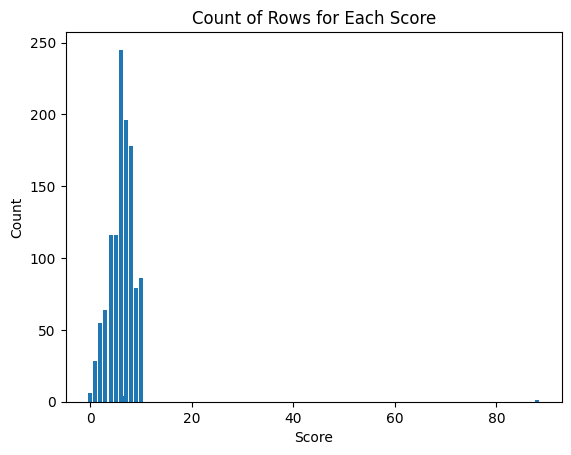

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each score
score_counts = df['score'].value_counts()

# Plotting the bar plot
plt.bar(score_counts.index, score_counts.values)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Rows for Each Score')

# Show the plot
plt.show()


In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each score
score_counts = dfnew['score'].value_counts()

# Plotting the bar plot
plt.bar(score_counts.index, score_counts.values)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Rows for Each Score')

# Show the plot
plt.show()
'''

"import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Count the occurrences of each score\nscore_counts = dfnew['score'].value_counts()\n\n# Plotting the bar plot\nplt.bar(score_counts.index, score_counts.values)\n\n# Adding labels and title\nplt.xlabel('Score')\nplt.ylabel('Count')\nplt.title('Count of Rows for Each Score')\n\n# Show the plot\nplt.show()\n"

In [ ]:
'''import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset with 5 features
# Replace this with your actual dataset

# Select the 5 features
selected_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                     '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                     '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                     '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
                     '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
                     '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
                     '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
                     '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
                     '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
                     '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
                     '101', '102', '103', '104', '105', '106', '107', '108', '109', '110',
                     '111', '112', '113', '114', '115', '116', '117', '118', '119', '120',
                     '121', '122', '123', '124', '125', '126', '127', '128', '129', '130',
                     '131', '132', '133', '134', '135', '136', '137', '138', '139', '140',
                     '141', '142', '143', '144', '145', '146', '147', '148', '149', '150',
                     '151', '152', '153', '154', '155', '156', '157', '158', '159', '160',
                     '161', '162', '163', '164', '165', '166', '167', '168', '169', '170',
                     '171', '172', '173', '174', '175', '176', '177', '178', '179', '180',
                     '181', '182', '183', '184', '185', '186', '187', '188', '189', '190',
                     '191', '192', '193', '194', '195', '196', '197', '198', '199', '200',
                     '201', '202', '203', '204', '205', '206', '207', '208', '209', '210',
                     '211', '212', '213', '214', '215', '216', '217', '218', '219', '220',
                     '221', '222', '223', '224', '225', '226', '227', '228', '229', '230',
                     '231', '232', '233', '234', '235', '236', '237', '238', '239', '240',
                     '241', '242', '243', '244', '245', '246', '247', '248', '249', '250',
                     '251', '252', '253', '254', '255', '256', '257', '258', '259', '260',
                     '261', '262', '263', '264', '265', '266', '267', '268', '269', '270',
                     '271', '272', '273', '274', '275', '276', '277', '278', '279', '280',
                     '281', '282', '283', '284', '285', '286', '287', '288', '289', '290',
                     '291', '292', '293', '294', '295', '296', '297', '298', '299', '300',
                     '301', '302', '303', '304', '305', '306', '307', '308', '309', '310',
                     '311', '312', '313', '314', '315', '316', '317', '318', '319', '320',
                     '321', '322', '323', '324', '325', '326', '327', '328', '329', '330',
                     '331', '332', '333', '334', '335', '336', '337', '338', '339', '340',
                     '341', '342', '343', '344', '345', '346', '347', '348', '349', '350',
                     '351', '352', '353', '354', '355', '356', '357', '358', '359', '360',
                     '361', '362', '363', '364', '365', '366', '367', '368', '369', '370',
                     '371', '372', '373', '374', '375', '376', '377', '378', '379', '380',
                     '381', '382', '383', '384', '385', '386', '387', '388', '389', '390',
                     '391', '392', '393', '394', '395', '396', '397', '398', '399', '400',
                     '401', '402', '403', '404', '405', '406', '407', '408', '409', '410',
                     '411', '412', '413', '414', '415', '416', '417', '418', '419', '420',
                     '421', '422', '423', '424', '425', '426', '427', '428', '429', '430',
                     '431', '432', '433', '434', '435', '436', '437', '438', '439', '440',
                     '441', '442', '443', '444', '445', '446', '447', '448', '449', '450',
                     '451', '452', '453', '454', '455', '456', '457', '458', '459', '460',
                     '461', '462', '463', '464', '465', '466', '467', '468', '469', '470',
                     '471', '472', '473', '474', '475', '476', '477', '478', '479', '480',
                     '481', '482', '483', '484', '485', '486', '487', '488', '489', '490',
                     '491', '492', '493', '494', '495', '496', '497', '498', '499', '500',
                     '501', '502', '503', '504', '505', '506', '507', '508', '509', '510',
                     '511', '512', '513', '514', '515', '516', '517', '518', '519', '520',
                     '521', '522', '523', '524', '525', '526', '527', '528', '529', '530',
                     '531', '532', '533', '534', '535', '536', '537', '538', '539', '540',
                     '541', '542', '543', '544', '545', '546', '547', '548', '549', '550',
                     '551', '552', '553', '554', '555', '556', '557', '558', '559', '560',
                     '561', '562', '563', '564', '565', '566', '567', '568', '569', '570',
                     '571', '572', '573', '574', '575', '576', '577', '578', '579', '580',
                     '581', '582', '583', '584', '585', '586', '587', '588', '589', '590',
                     '591', '592', '593', '594', '595', '596', '597', '598', '599', '600',
                     '601', '602', '603', '604', '605', '606', '607', '608', '609', '610',
                     '611', '612', '613', '614', '615', '616', '617', '618', '619', '620',
                     '621', '622', '623', '624', '625', '626', '627', '628', '629', '630',
                     '631', '632', '633', '634', '635', '636', '637', '638', '639', '640',
                     '641', '642', '643', '644', '645', '646', '647', '648', '649', '650',
                     '651', '652', '653', '654', '655', '656', '657', '658', '659', '660',
                     '661', '662', '663', '664', '665', '666', '667', '668', '669', '670',
                     '671', '672', '673', '674', '675', '676', '677', '678', '679', '680',
                     '681', '682', '683', '684', '685', '686', '687', '688', '689', '690',
                     '691', '692', '693', '694', '695', '696', '697', '698', '699', '700',
                     '701', '702', '703', '704', '705', '706', '707', '708', '709', '710',
                     '711', '712', '713', '714', '715', '716', '717', '718', '719', '720',
                     '721', '722', '723', '724', '725', '726', '727', '728', '729', '730',
                     '731', '732', '733', '734', '735', '736', '737', '738', '739', '740',
                     '741', '742', '743', '744', '745', '746', '747', '748', '749', '750',
                     '751', '752', '753', '754', '755', '756', '757', '758', '759', '760',
                     '761', '762', '763', '764', '765', '766', '767']
data = dfnew[selected_features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(data_scaled)

# Identify unique rows with outliers
unique_rows = dfnew[outlier_labels == -1].drop_duplicates()

# Display the number of unique rows with outliers
num_unique_rows = len(unique_rows)
print("Number of Unique Rows with Outliers:", num_unique_rows)
'''

'import pandas as pd\nfrom sklearn.cluster import DBSCAN\nfrom sklearn.preprocessing import StandardScaler\n\n# Assuming \'df\' is your dataset with 5 features\n# Replace this with your actual dataset\n\n# Select the 5 features\nselected_features = [\'0\', \'1\', \'2\', \'3\', \'4\', \'5\', \'6\', \'7\', \'8\', \'9\', \'10\',\n                     \'11\', \'12\', \'13\', \'14\', \'15\', \'16\', \'17\', \'18\', \'19\', \'20\',\n                     \'21\', \'22\', \'23\', \'24\', \'25\', \'26\', \'27\', \'28\', \'29\', \'30\',\n                     \'31\', \'32\', \'33\', \'34\', \'35\', \'36\', \'37\', \'38\', \'39\', \'40\',\n                     \'41\', \'42\', \'43\', \'44\', \'45\', \'46\', \'47\', \'48\', \'49\', \'50\',\n                     \'51\', \'52\', \'53\', \'54\', \'55\', \'56\', \'57\', \'58\', \'59\', \'60\',\n                     \'61\', \'62\', \'63\', \'64\', \'65\', \'66\', \'67\', \'68\', \'69\', \'70\',\n                     \'71\', \'72\', \'73\', \'74\', \'75\'

In [ ]:
'''import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset with 5 features
# Replace this with your actual dataset

# Select the 5 features
selected_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                     '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                     '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                     '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
                     '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
                     '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
                     '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
                     '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
                     '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
                     '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
                     '101', '102', '103', '104', '105', '106', '107', '108', '109', '110',
                     '111', '112', '113', '114', '115', '116', '117', '118', '119', '120',
                     '121', '122', '123', '124', '125', '126', '127', '128', '129', '130',
                     '131', '132', '133', '134', '135', '136', '137', '138', '139', '140',
                     '141', '142', '143', '144', '145', '146', '147', '148', '149', '150',
                     '151', '152', '153', '154', '155', '156', '157', '158', '159', '160',
                     '161', '162', '163', '164', '165', '166', '167', '168', '169', '170',
                     '171', '172', '173', '174', '175', '176', '177', '178', '179', '180',
                     '181', '182', '183', '184', '185', '186', '187', '188', '189', '190',
                     '191', '192', '193', '194', '195', '196', '197', '198', '199', '200',
                     '201', '202', '203', '204', '205', '206', '207', '208', '209', '210',
                     '211', '212', '213', '214', '215', '216', '217', '218', '219', '220',
                     '221', '222', '223', '224', '225', '226', '227', '228', '229', '230',
                     '231', '232', '233', '234', '235', '236', '237', '238', '239', '240',
                     '241', '242', '243', '244', '245', '246', '247', '248', '249', '250',
                     '251', '252', '253', '254', '255', '256', '257', '258', '259', '260',
                     '261', '262', '263', '264', '265', '266', '267', '268', '269', '270',
                     '271', '272', '273', '274', '275', '276', '277', '278', '279', '280',
                     '281', '282', '283', '284', '285', '286', '287', '288', '289', '290',
                     '291', '292', '293', '294', '295', '296', '297', '298', '299', '300',
                     '301', '302', '303', '304', '305', '306', '307', '308', '309', '310',
                     '311', '312', '313', '314', '315', '316', '317', '318', '319', '320',
                     '321', '322', '323', '324', '325', '326', '327', '328', '329', '330',
                     '331', '332', '333', '334', '335', '336', '337', '338', '339', '340',
                     '341', '342', '343', '344', '345', '346', '347', '348', '349', '350',
                     '351', '352', '353', '354', '355', '356', '357', '358', '359', '360',
                     '361', '362', '363', '364', '365', '366', '367', '368', '369', '370',
                     '371', '372', '373', '374', '375', '376', '377', '378', '379', '380',
                     '381', '382', '383', '384', '385', '386', '387', '388', '389', '390',
                     '391', '392', '393', '394', '395', '396', '397', '398', '399', '400',
                     '401', '402', '403', '404', '405', '406', '407', '408', '409', '410',
                     '411', '412', '413', '414', '415', '416', '417', '418', '419', '420',
                     '421', '422', '423', '424', '425', '426', '427', '428', '429', '430',
                     '431', '432', '433', '434', '435', '436', '437', '438', '439', '440',
                     '441', '442', '443', '444', '445', '446', '447', '448', '449', '450',
                     '451', '452', '453', '454', '455', '456', '457', '458', '459', '460',
                     '461', '462', '463', '464', '465', '466', '467', '468', '469', '470',
                     '471', '472', '473', '474', '475', '476', '477', '478', '479', '480',
                     '481', '482', '483', '484', '485', '486', '487', '488', '489', '490',
                     '491', '492', '493', '494', '495', '496', '497', '498', '499', '500',
                     '501', '502', '503', '504', '505', '506', '507', '508', '509', '510',
                     '511', '512', '513', '514', '515', '516', '517', '518', '519', '520',
                     '521', '522', '523', '524', '525', '526', '527', '528', '529', '530',
                     '531', '532', '533', '534', '535', '536', '537', '538', '539', '540',
                     '541', '542', '543', '544', '545', '546', '547', '548', '549', '550',
                     '551', '552', '553', '554', '555', '556', '557', '558', '559', '560',
                     '561', '562', '563', '564', '565', '566', '567', '568', '569', '570',
                     '571', '572', '573', '574', '575', '576', '577', '578', '579', '580',
                     '581', '582', '583', '584', '585', '586', '587', '588', '589', '590',
                     '591', '592', '593', '594', '595', '596', '597', '598', '599', '600',
                     '601', '602', '603', '604', '605', '606', '607', '608', '609', '610',
                     '611', '612', '613', '614', '615', '616', '617', '618', '619', '620',
                     '621', '622', '623', '624', '625', '626', '627', '628', '629', '630',
                     '631', '632', '633', '634', '635', '636', '637', '638', '639', '640',
                     '641', '642', '643', '644', '645', '646', '647', '648', '649', '650',
                     '651', '652', '653', '654', '655', '656', '657', '658', '659', '660',
                     '661', '662', '663', '664', '665', '666', '667', '668', '669', '670',
                     '671', '672', '673', '674', '675', '676', '677', '678', '679', '680',
                     '681', '682', '683', '684', '685', '686', '687', '688', '689', '690',
                     '691', '692', '693', '694', '695', '696', '697', '698', '699', '700',
                     '701', '702', '703', '704', '705', '706', '707', '708', '709', '710',
                     '711', '712', '713', '714', '715', '716', '717', '718', '719', '720',
                     '721', '722', '723', '724', '725', '726', '727', '728', '729', '730',
                     '731', '732', '733', '734', '735', '736', '737', '738', '739', '740',
                     '741', '742', '743', '744', '745', '746', '747', '748', '749', '750',
                     '751', '752', '753', '754', '755', '756', '757', '758', '759', '760',
                     '761', '762', '763', '764', '765', '766', '767']
data = df[selected_features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(data_scaled)

# Identify unique rows with outliers
unique_rows = df[outlier_labels == -1].drop_duplicates()

# Display the number of unique rows with outliers
num_unique_rows = len(unique_rows)
print("Number of Unique Rows with Outliers:", num_unique_rows)
'''

'import pandas as pd\nfrom sklearn.cluster import DBSCAN\nfrom sklearn.preprocessing import StandardScaler\n\n# Assuming \'df\' is your dataset with 5 features\n# Replace this with your actual dataset\n\n# Select the 5 features\nselected_features = [\'0\', \'1\', \'2\', \'3\', \'4\', \'5\', \'6\', \'7\', \'8\', \'9\', \'10\',\n                     \'11\', \'12\', \'13\', \'14\', \'15\', \'16\', \'17\', \'18\', \'19\', \'20\',\n                     \'21\', \'22\', \'23\', \'24\', \'25\', \'26\', \'27\', \'28\', \'29\', \'30\',\n                     \'31\', \'32\', \'33\', \'34\', \'35\', \'36\', \'37\', \'38\', \'39\', \'40\',\n                     \'41\', \'42\', \'43\', \'44\', \'45\', \'46\', \'47\', \'48\', \'49\', \'50\',\n                     \'51\', \'52\', \'53\', \'54\', \'55\', \'56\', \'57\', \'58\', \'59\', \'60\',\n                     \'61\', \'62\', \'63\', \'64\', \'65\', \'66\', \'67\', \'68\', \'69\', \'70\',\n                     \'71\', \'72\', \'73\', \'74\', \'75\'

WE WILL BE REMOVING OUTLIERS ONLY BASED ON TARGET COLUMN

In [ ]:
import pandas as pd
from scipy.stats import zscore


# Calculate Z-scores for the target column
z_scores = zscore(df['score'])

# Define a threshold (e.g., 3) beyond which a data point is considered an outlier
threshold = 3

# Identify and remove rows with target values considered outliers
outliers_mask = abs(z_scores) > threshold
ndf = df[~outliers_mask]

# Display the DataFrame after removing outliers
print("DataFrame after removing outliers:")
ndf.head()


DataFrame after removing outliers:


0         1         2         3         4         5         6  \
0 -1.355365  2.348287  1.030452 -1.503548 -0.380958  1.095197 -2.063201   
1 -1.403411  2.131454  1.117223 -1.542901 -0.351417  1.042730 -2.025140   
2 -1.388594  2.358305  0.994477 -1.480365 -0.382565  1.104627 -2.042682   
3 -1.352139  2.155489  1.027737 -1.424550 -0.316464  1.111701 -2.039937   
4 -1.411875  2.337363  1.050743 -1.506995 -0.321872  1.118751 -2.068671   

          7         8         9  ...       759       760       761       762  \
0 -1.657276  0.780015  0.224140  ... -2.330601  0.542652 -1.660974 -2.150713   
1 -1.812830  0.707280  0.165037  ... -2.183963  0.488854 -1.674375 -2.027182   
2 -1.669257  0.800453  0.265268  ... -2.347989  0.555944 -1.651969 -2.149015   
3 -1.789147  0.725883  0.298638  ... -2.216481  0.487809 -1.595799 -2.143987   
4 -1.603735  0.730069  0.242844  ... -2.279187  0.451709 -1.607142 -2.184134   

        763       764       765       766       767  score  
0  0.545611 -1.614411 -0.133085 -2.134145  1.184289   10.0  
1  0.514854 -1.625416  0.014533 -2.156347  1.088794    8.0  
2  0.582454 -1.606852 -0.164269 -2.139201  1.158317    7.0  
3  0.419316 -1.635483 -0.074271 -2.112344  1.094625    5.0  
4  0.521283 -1.604708 -0.055002 -2.056900  1.290956    6.0  

[5 rows x 769 columns]

In [ ]:
ndf.shape

(1175, 769)

In [ ]:
ndf = ndf[ndf['score'] <= 10]


In [ ]:
ndf = ndf[ndf['score'] >= 0]

In [ ]:
ndf['score'] = ndf['score'].round().astype(int)


In [ ]:
ndf.shape

(1175, 769)

FEATURE SELECTION USING ELASTIC NET AND LASSO REGRESSION

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
X=ndf.drop('score', axis=1)
y=ndf['score']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# Initialize the Elastic Net model
alpha = 0.5  # Parameter for the L1 regularization term (LASSO)
l1_ratio = 0.5  # Mixing parameter between L1 and L2 regularization (Elastic Net)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

# Train the Elastic Net model
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.5f}")

# Display the selected coefficients (non-zero coefficients indicate selected features)
print("Selected Coefficients:")
res=elastic_net.coef_
print(res)'''

'\n# Initialize the Elastic Net model\nalpha = 0.5  # Parameter for the L1 regularization term (LASSO)\nl1_ratio = 0.5  # Mixing parameter between L1 and L2 regularization (Elastic Net)\nelastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)\n\n# Train the Elastic Net model\nelastic_net.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred = elastic_net.predict(X_test)\n\n# Evaluate the model performance\nmse = mean_squared_error(y_test, y_pred)\nprint(f"Mean Squared Error: {mse:.5f}")\n\n# Display the selected coefficients (non-zero coefficients indicate selected features)\nprint("Selected Coefficients:")\nres=elastic_net.coef_\nprint(res)'

In [ ]:
'''selected = [index for index, value in enumerate(res) if value != 0]

print("Indexes of non-zero numbers:", selected)'''

'selected = [index for index, value in enumerate(res) if value != 0]\n\nprint("Indexes of non-zero numbers:", selected)'

In [ ]:
'''from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Initialize the LASSO model
alpha = 0.1  # Regularization strength (adjustable parameter)
lasso_model = Lasso(alpha=alpha, random_state=42)

# Train the LASSO model
lasso_model.fit(X_train, y_train)

# Display the learned coefficients
print("Learned Coefficients:")
print(lasso_model.coef_)
'''

'from sklearn.linear_model import Lasso\nfrom sklearn.metrics import mean_squared_error\n# Initialize the LASSO model\nalpha = 0.1  # Regularization strength (adjustable parameter)\nlasso_model = Lasso(alpha=alpha, random_state=42)\n\n# Train the LASSO model\nlasso_model.fit(X_train, y_train)\n\n# Display the learned coefficients\nprint("Learned Coefficients:")\nprint(lasso_model.coef_)\n'

In [ ]:
'''lasso_res = [index for index, value in enumerate(lasso_model.coef_) if value != 0]

print("Indexes of non-zero numbers:", lasso_res)'''

'lasso_res = [index for index, value in enumerate(lasso_model.coef_) if value != 0]\n\nprint("Indexes of non-zero numbers:", lasso_res)'

In [ ]:
'''from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}

model = Lasso()
rand_search = RandomizedSearchCV(estimator=model,
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(X_train,y_train)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)
'''

"from scipy.stats import uniform\nfrom sklearn.model_selection import RandomizedSearchCV\n\nparam_grid = {'alpha': uniform()}\n\nmodel = Lasso()\nrand_search = RandomizedSearchCV(estimator=model,\n                                 param_distributions=param_grid,\n                                 n_iter=100)\n\nrand_search.fit(X_train,y_train)\n\nprint(rand_search.best_estimator_.alpha)\nprint(rand_search.best_score_)\n"

In [ ]:
#best alpha=0.0170216866235795
#applying lasso again with hyperparam tuning
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Initialize the LASSO model
alpha = 0.0170216866235795 # Regularization strength (adjustable parameter)
lasso_model_hp = Lasso(alpha=alpha, random_state=42)

# Train the LASSO model
lasso_model_hp.fit(X_train, y_train)

# Display the learned coefficients
print("Learned Coefficients:")
print(lasso_model_hp.coef_)
lasso_res_hp = [index for index, value in enumerate(lasso_model_hp.coef_) if value != 0]

print("Indexes of non-zero numbers:", lasso_res_hp)

Learned Coefficients:
[ 0.         -0.         -0.1773495  -0.         -0.         -0.
 -0.          0.00894628 -0.         -0.          0.          0.
 -0.          0.          0.          0.          0.         -0.
 -0.11343458  0.         -0.         -0.          0.          0.
  0.          0.         -0.          0.         -0.          0.
  0.         -0.03202842 -0.08729536 -0.14960997 -0.          0.
  0.          0.04592052  0.11197647  0.06324652  0.          0.
  0.          0.          0.05729021 -0.          0.          0.
 -0.          0.          0.         -0.08971986 -0.         -0.5066643
  0.         -0.          0.         -0.         -0.05433541  0.09364949
 -0.          0.          0.         -0.         -0.          0.
  0.         -0.          0.         -0.         -0.15284835 -0.23995954
 -0.         -0.          0.         -0.          0.         -0.
  0.27564747  0.         -0.         -0.          0.         -0.
 -0.          0.          0.         -0.     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+00, tolerance: 4.743e-01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
'''ndf.dtypes'''

'ndf.dtypes'

In [ ]:
unique_values = ndf['score'].unique()

#print(f"Unique values of the '{feature_name}' feature:")
print(unique_values)

[10  8  7  5  6  4  9  1  2  3  0]


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named original_df

# List of features you want to select
selected_features = ['2', '7', '18', '31', '32', '33', '37', '38', '39', '44', '51', '53', '58', '59', '70', '71',
                     '78', '88', '89', '100', '110', '113', '117', '124', '136', '137', '141', '147', '151', '163',
                     '165', '169', '184', '189', '194', '195', '199', '201', '208', '209', '211', '215', '217', '219',
                     '225', '236', '239', '240', '264', '273', '297', '301', '313', '323', '326', '346', '366', '375',
                     '382', '389', '399', '402', '403', '407', '408', '418', '425', '429', '430', '432', '433', '434',
                     '447', '454', '464', '473', '478', '484', '486', '502', '503', '505', '506', '510', '513', '522',
                     '523', '530', '536', '542', '547', '551', '554', '557', '559', '563', '565', '569', '575', '579',
                     '580', '587', '593', '598', '603', '607', '609', '623', '632', '635', '637', '638', '639', '640',
                     '644', '645', '648', '653', '654', '655', '656', '661', '664', '680', '684', '687', '688', '691',
                     '695', '697', '701', '703', '704', '706', '710', '713', '716', '725', '727', '728', '734', '747', '749', '750', '754', '756', '763']

# Create a new DataFrame with selected features
new_df = ndf[selected_features].copy()

# Display the new DataFrame
print(new_df)


             2         7        18        31        32        33        37  \
0     1.030452 -1.657276  0.413562  1.628438  1.508062 -2.271251  0.290558   
1     1.117223 -1.812830  0.284334  1.460007  1.621506 -2.344067  0.294730   
2     0.994477 -1.669257  0.405725  1.632208  1.522269 -2.303496  0.281383   
3     1.027737 -1.789147  0.325666  1.597984  1.515191 -2.279244  0.270924   
4     1.050743 -1.603735  0.448165  1.580377  1.524122 -2.209410  0.341813   
...        ...       ...       ...       ...       ...       ...       ...   
1171 -0.794640 -0.204680 -0.039235 -0.282675  1.198532 -1.707034 -0.948506   
1172 -2.231147  0.092465 -0.279312 -0.952901  0.383562 -1.126312 -0.754892   
1173  0.067668 -0.827843  1.133334  1.033356 -0.528824 -3.717525  0.302206   
1174 -2.486930  0.260370 -0.260491 -0.887893  0.242270 -0.952728 -0.801982   
1175 -2.228937  0.323767  1.068386  0.179288 -0.537436 -1.753453  0.663032   

            38        39        44  ...       725       727    

In [ ]:
ndf = ndf.reset_index(drop=True)
new_df = new_df.reset_index(drop=True)
ndf['index']=range(len(ndf))
ndf.set_index('index', inplace=True)
new_df['index']=range(len(new_df))
new_df.set_index('index', inplace=True)

In [ ]:
ndf.head()

0         1         2         3         4         5         6  \
index                                                                         
0     -1.355365  2.348287  1.030452 -1.503548 -0.380958  1.095197 -2.063201   
1     -1.403411  2.131454  1.117223 -1.542901 -0.351417  1.042730 -2.025140   
2     -1.388594  2.358305  0.994477 -1.480365 -0.382565  1.104627 -2.042682   
3     -1.352139  2.155489  1.027737 -1.424550 -0.316464  1.111701 -2.039937   
4     -1.411875  2.337363  1.050743 -1.506995 -0.321872  1.118751 -2.068671   

              7         8         9  ...       759       760       761  \
index                                ...                                 
0     -1.657276  0.780015  0.224140  ... -2.330601  0.542652 -1.660974   
1     -1.812830  0.707280  0.165037  ... -2.183963  0.488854 -1.674375   
2     -1.669257  0.800453  0.265268  ... -2.347989  0.555944 -1.651969   
3     -1.789147  0.725883  0.298638  ... -2.216481  0.487809 -1.595799   
4     -1.603735  0.730069  0.242844  ... -2.279187  0.451709 -1.607142   

            762       763       764       765       766       767  score  
index                                                                     
0     -2.150713  0.545611 -1.614411 -0.133085 -2.134145  1.184289     10  
1     -2.027182  0.514854 -1.625416  0.014533 -2.156347  1.088794      8  
2     -2.149015  0.582454 -1.606852 -0.164269 -2.139201  1.158317      7  
3     -2.143987  0.419316 -1.635483 -0.074271 -2.112344  1.094625      5  
4     -2.184134  0.521283 -1.604708 -0.055002 -2.056900  1.290956      6  

[5 rows x 769 columns]

KMEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# kmeans model for subset dataset

X = new_df
y = ndf['score']

model_kmeans = KMeans(n_clusters=11, random_state=42)
kmeans_model = model_kmeans.fit(X)
kmeans_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([9, 9, 9, ..., 1, 1, 1], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


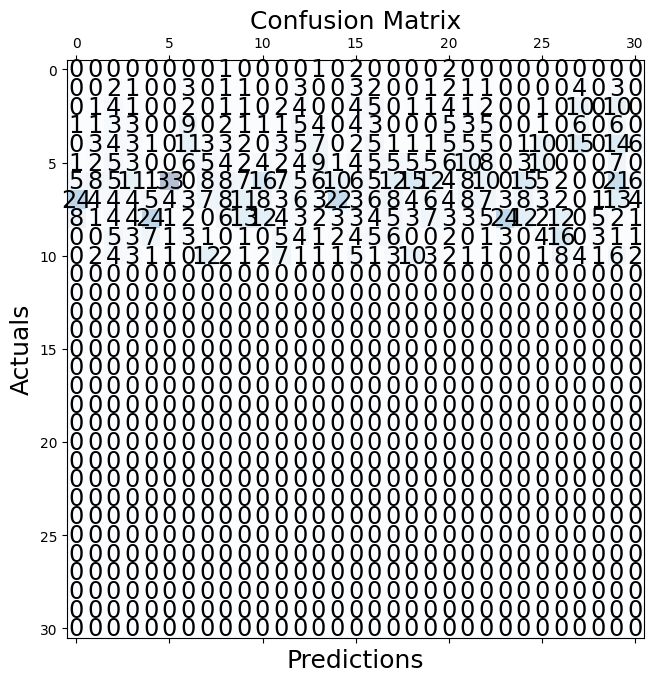

Silhouette Score: 0.5961394117136897
calinski_harabasz Score: 274.22475436575763
davies_bouldin Score: 0.7173760147026843
ari Score: 0.03416625574852389
nmi Score: 0.1541513213021724
fm_index Score: 0.10665708885441488


In [ ]:
#applying kmeans to entire dataset
from sklearn.metrics import silhouette_score

from sklearn.metrics import confusion_matrix
Xt=ndf.drop('score', axis=1)
modelt = KMeans(n_clusters=31, random_state=42)
kmeans_modelt = modelt.fit(Xt)
clusters=modelt.fit_predict(Xt)
klabels=kmeans_modelt.labels_
conf_matrix=confusion_matrix(y, klabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, klabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, klabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, klabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], klabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], klabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], klabels)
print(f"fm_index Score: {fm_index}")


In [ ]:
data_with_clusters = pd.DataFrame(data=Xt, columns=Xt.columns)
data_with_clusters["Cluster"] = clusters
cluster_distribution = pd.crosstab(data_with_clusters["Cluster"], y)

print("\nCluster Distribution Across Target Variable:")
print(cluster_distribution)


Cluster Distribution Across Target Variable:
score    0   1   2   3   4   5   6   7   8   9   10
Cluster                                            
0         0   0   0   1   0   1   5  24   8   0   0
1         0   0   1   1   3   2   8   4   1   0   2
2         0   2   4   3   4   5   5   4   4   5   4
3         0   1   1   3   3   3  11   4   4   3   3
4         0   0   0   0   1   0   1   5  24   7   1
5         0   0   0   0   0   0  33   4   1   1   1
6         0   3   2   9  11   6   0   3   2   3   0
7         0   0   0   0   3   5   8   7   0   1  12
8         1   1   1   2   3   4   8   8   6   0   2
9         0   1   1   1   2   2   7  11  13   1   1
10        0   0   0   1   0   4  16   8  12   0   2
11        0   0   2   1   3   2   7   3   4   5   7
12        0   3   4   5   5   4   5   6   3   4   1
13        1   0   0   4   7   9   6   3   2   1   1
14        0   0   0   0   0   1  10  22   3   2   1
15        2   3   4   4   2   4   6   3   3   4   5
16        0   2   

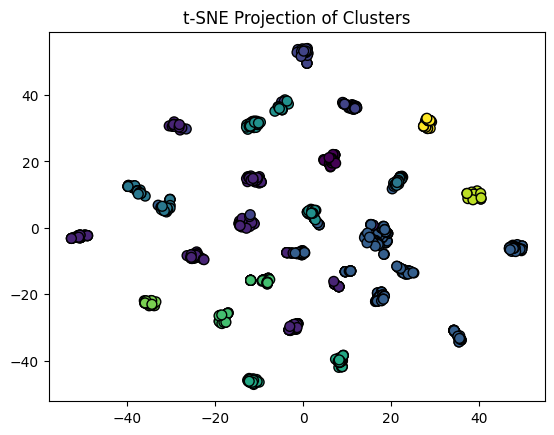

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_model.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()
#kmeans_model.cluster_centers_


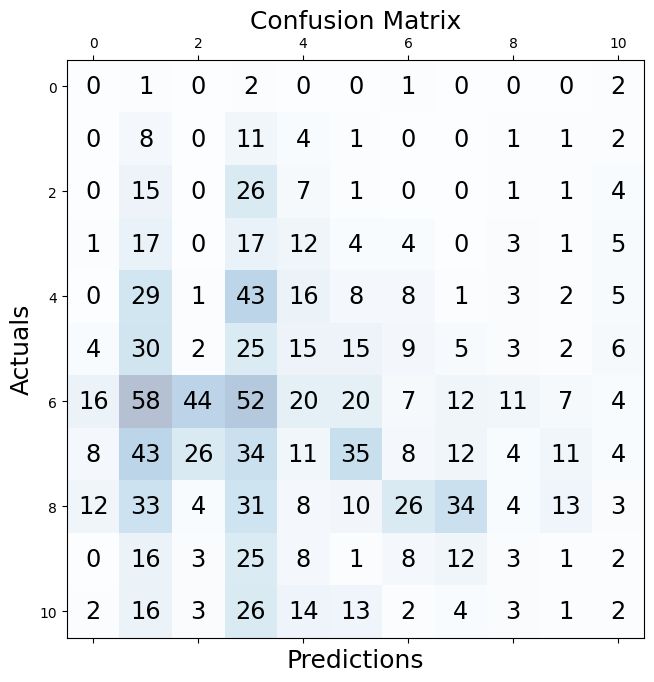

ari Score: 0.006734912888828918
nmi Score: 0.070550646890017
fm_index Score: 0.14509490788613252
Silhouette Score: 0.2973341261980582
calinski_harabasz Score: 112.10928127345376
davies_bouldin Score: 1.4680579391066124


In [ ]:
#kmeans for subset dataset
from sklearn.metrics import silhouette_score

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, kmeans_model.labels_)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], kmeans_model.labels_)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], kmeans_model.labels_)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], kmeans_model.labels_)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, kmeans_model.labels_)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, kmeans_model.labels_)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, kmeans_model.labels_)
print(f"davies_bouldin Score: {davies_bouldin}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


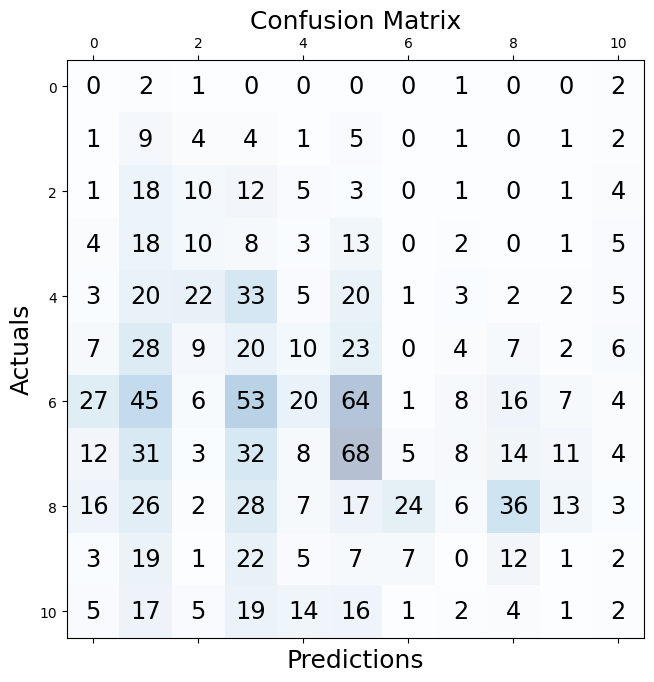

Silhouette Score: 0.2785808722083785
calinski_harabasz Score: 107.57768903546514
davies_bouldin Score: 1.5680538171280929
ari Score: 0.022312479634426174
nmi Score: 0.07108365588306782
fm_index Score: 0.15493894024976654


In [ ]:
#applying kmeans to entire dataset

Xt=ndf.drop('score', axis=1)
modelt = KMeans(n_clusters=11, random_state=42)
kmeans_modelt = modelt.fit(Xt)
clusters=modelt.fit_predict(Xt)
klabels=kmeans_modelt.labels_
conf_matrix=confusion_matrix(y, klabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, klabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, klabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, klabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], klabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], klabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], klabels)
print(f"fm_index Score: {fm_index}")


CLUSTER DISTRIBUTION ACROSS DIFFERENT CLASSES

In [ ]:
data_with_clusters = pd.DataFrame(data=Xt, columns=Xt.columns)
data_with_clusters["Cluster"] = clusters
cluster_distribution = pd.crosstab(data_with_clusters["Cluster"], y)

print("\nCluster Distribution Across Target Variable:")
print(cluster_distribution)


Cluster Distribution Across Target Variable:
score    0   1   2   3   4   5   6   7   8   9   10
Cluster                                            
0         0   1   1   4   3   7  27  12  16   3   5
1         2   9  18  18  20  28  45  31  26  19  17
2         1   4  10  10  22   9   6   3   2   1   5
3         0   4  12   8  33  20  53  32  28  22  19
4         0   1   5   3   5  10  20   8   7   5  14
5         0   5   3  13  20  23  64  68  17   7  16
6         0   0   0   0   1   0   1   5  24   7   1
7         1   1   1   2   3   4   8   8   6   0   2
8         0   0   0   0   2   7  16  14  36  12   4
9         0   1   1   1   2   2   7  11  13   1   1
10        2   2   4   5   5   6   4   4   3   2   2


In [ ]:
cluster_counts = pd.Series(clusters).value_counts()
print(cluster_counts)

5     236
1     233
3     231
8      91
0      79
4      78
2      73
9      40
6      39
10     39
7      36
dtype: int64


In [ ]:
class_counts = pd.Series(y).value_counts()

print("Number of datapoints in each class:")
print(class_counts)

Number of datapoints in each class:
6     251
7     196
8     178
5     116
4     116
10     86
9      79
3      64
2      55
1      28
0       6
Name: score, dtype: int64


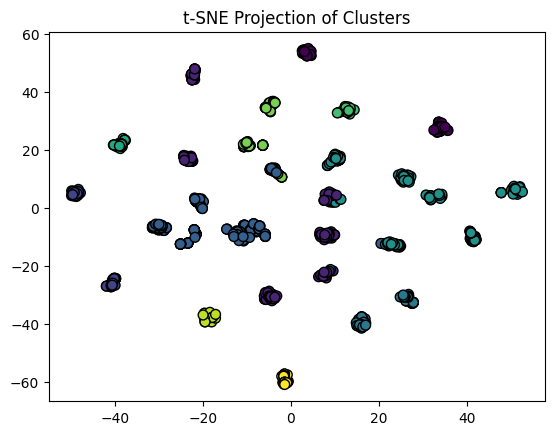

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=klabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4533725252296889


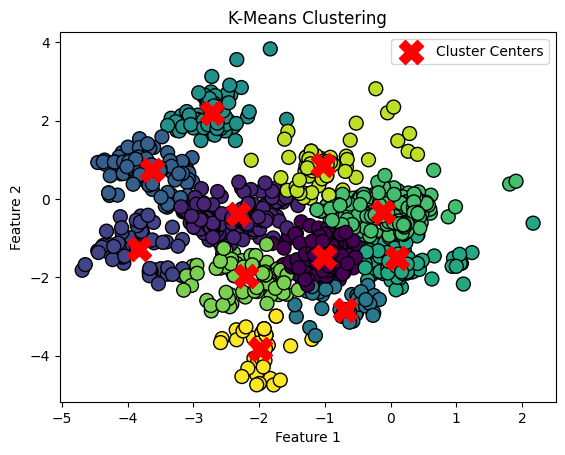

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract features (assuming you have two features for simplicity)
features = new_df[['53', '71']].values

# Set the number of clusters
n_clusters = 11

# Fit the K-Means model
kMeans = KMeans(n_clusters=n_clusters, random_state=42)
kMeans.fit(features)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(features, clusterLabels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clusters
plt.scatter(features[:, 0], features[:, 1], c=clusterLabels, cmap='viridis', edgecolors='k', s=100)
centers = kMeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=300, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()

In [ ]:
'''    y ==> score
['33', '53', '71',
 '113', '143', '151',
 '163', '169', '177',
 '199', '206', '241',
 '264', '313', '323',
 '326', '344', '372',
 '373', '376', '438',
 '464', '476', '512',
 '603', '611', '652',
 '684', '702', '706']

Adjusted Rand Index (ARI):

Measures the similarity between true and predicted labels, adjusted for chance. ARI of 1 indicates a perfect match.

Normalized Mutual Information (NMI):

Measures the mutual information between true and predicted labels, normalized by entropy. Values range from 0 to 1, where 1 indicates a perfect match.

Fowlkes-Mallows Index:

Computes the geometric mean of precision and recall. Ranges from 0 to 1, where 1 indicates a perfect match.
'''

"    y ==> score\n['33', '53', '71',\n '113', '143', '151',\n '163', '169', '177',\n '199', '206', '241',\n '264', '313', '323',\n '326', '344', '372',\n '373', '376', '438',\n '464', '476', '512',\n '603', '611', '652',\n '684', '702', '706']\n\nAdjusted Rand Index (ARI):\n\nMeasures the similarity between true and predicted labels, adjusted for chance. ARI of 1 indicates a perfect match.\n\nNormalized Mutual Information (NMI):\n\nMeasures the mutual information between true and predicted labels, normalized by entropy. Values range from 0 to 1, where 1 indicates a perfect match.\n\nFowlkes-Mallows Index:\n\nComputes the geometric mean of precision and recall. Ranges from 0 to 1, where 1 indicates a perfect match.\n"

AGGLOMERATIVE CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')
hierar_sub=hierarchical.fit_predict(X)
hierarchical.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([10, 10, 10, ...,  1,  0,  0])

In [ ]:
y_hierarchical= np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).astype(int)
y_hierarchical

index
0       10
1        8
2        7
3        5
4        6
        ..
1170     1
1171     8
1172     2
1173     8
1174    10
Name: score, Length: 1175, dtype: int64

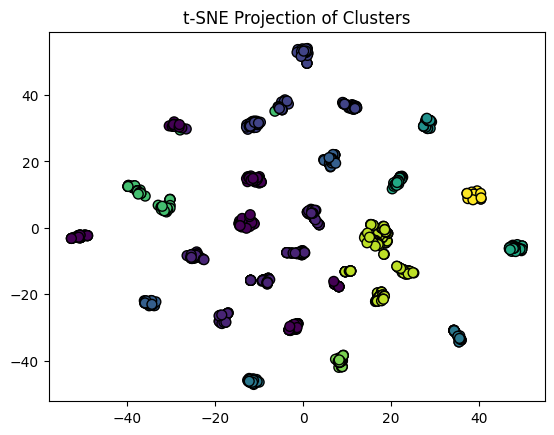

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_h = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_h[:, 0], X_tsne_h[:, 1], c=hierarchical.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

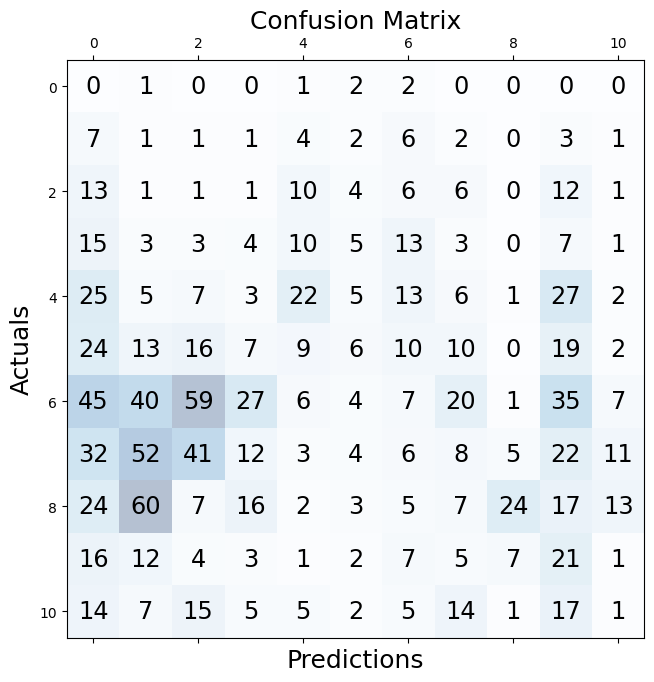

ari Score: 0.03605664362106147
nmi Score: 0.08361819885422687
fm_index Score: 0.15786708521234447
Silhouette Score: 0.2772874649466415
calinski_harabasz Score: 111.9557008950601
davies_bouldin Score: 1.599060584773043


In [ ]:
#hierarchical for subset dataset
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, hierarchical.labels_)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], hierarchical.labels_)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], hierarchical.labels_)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], hierarchical.labels_)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, hierarchical.labels_)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, hierarchical.labels_)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, hierarchical.labels_)
print(f"davies_bouldin Score: {davies_bouldin}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


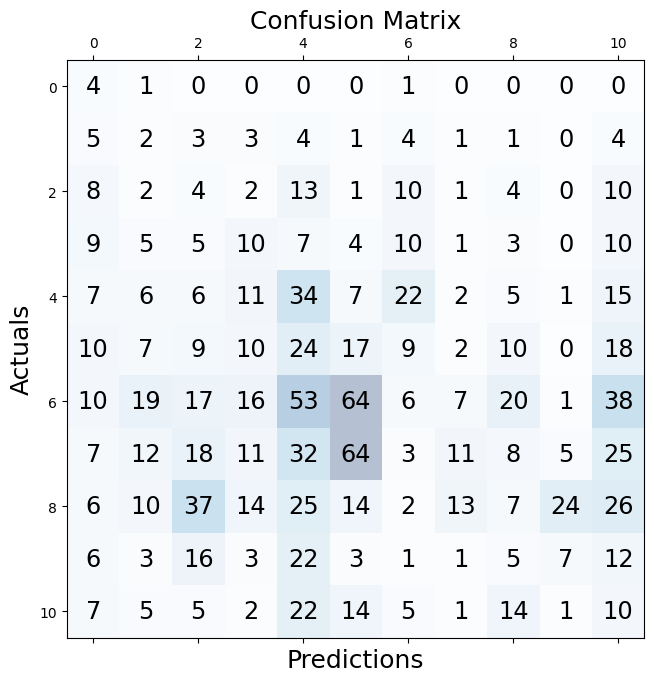

Silhouette Score: 0.2876551916235689
calinski_harabasz Score: 112.97657917480245
davies_bouldin Score: 1.5586307811049316
ari Score: 0.03138946220785145
nmi Score: 0.07154571545883338
fm_index Score: 0.1527134860184909


In [ ]:
#applying hierarchical clustering to entire dataset

Xt=ndf.drop('score', axis=1)
#modelt = KMeans(n_clusters=11, random_state=42)
hierarchicalt = hierarchical.fit_predict(Xt)
hlabels=hierarchical.labels_
conf_matrix=confusion_matrix(y, hlabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, hlabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, hlabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, hlabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], hlabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], hlabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], hlabels)
print(f"fm_index Score: {fm_index}")


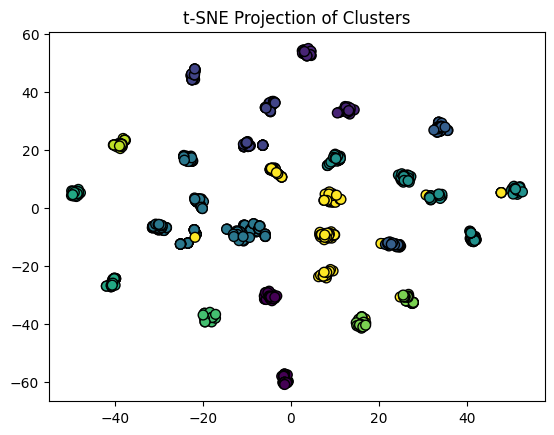

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hlabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

DBSCAN CLUSTERING

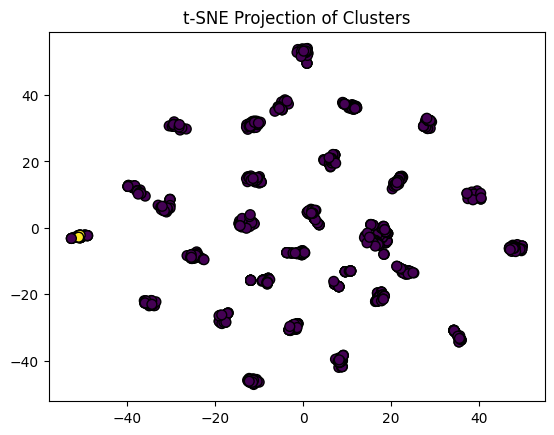

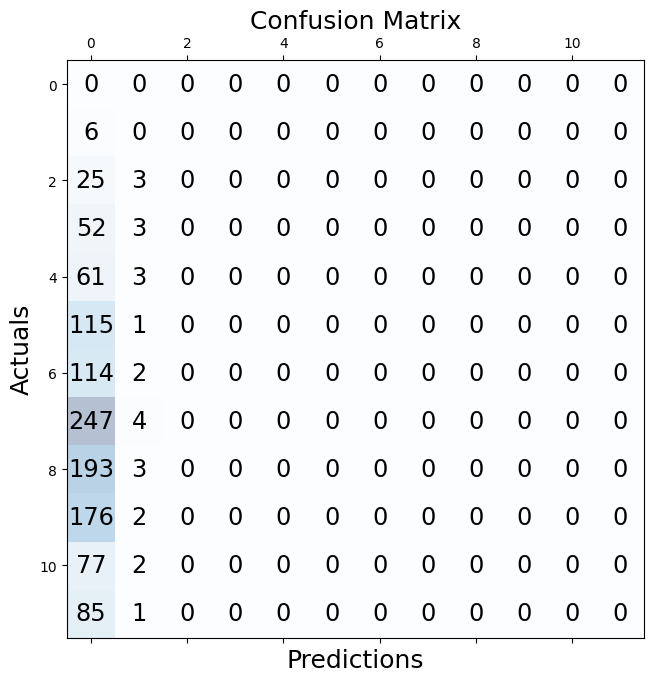

ari Score: 0.002410205292320959
nmi Score: 0.004677529751614449
fm_index Score: 0.357186281186903
Silhouette Score: 0.021459656760869267
calinski_harabasz Score: 23.476177063142064
davies_bouldin Score: 0.9950478115873445


In [ ]:
#DBSCAN for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
dlabels = db.labels_
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_d = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_d[:, 0], X_tsne_h[:, 1], c=db.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, db.labels_)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], db.labels_)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], db.labels_)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], db.labels_)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, db.labels_)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, db.labels_)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, db.labels_)
print(f"davies_bouldin Score: {davies_bouldin}")


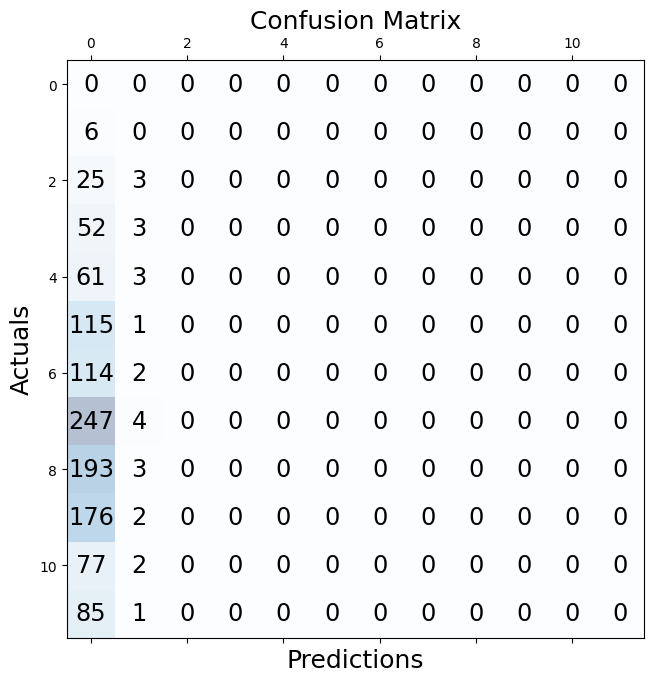

Silhouette Score: 0.06882523204588104
calinski_harabasz Score: 28.503650019592932
davies_bouldin Score: 0.9023144169830504
ari Score: 0.002410205292320959
nmi Score: 0.004677529751614449
fm_index Score: 0.357186281186903


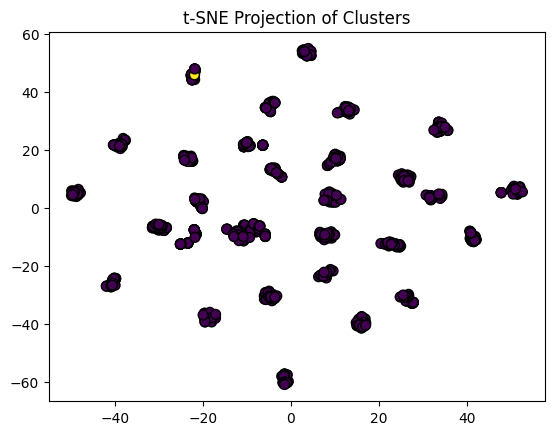

In [ ]:
#applying DBSCAN to entire dataset

Xt=ndf.drop('score', axis=1)
dbt = DBSCAN(eps=0.3, min_samples=10).fit(Xt)
dlabelst = dbt.labels_
conf_matrix=confusion_matrix(y, dlabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, dlabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, dlabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, dlabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], dlabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], dlabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], dlabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dlabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



GAUSSIAN MIXTURE MODEL

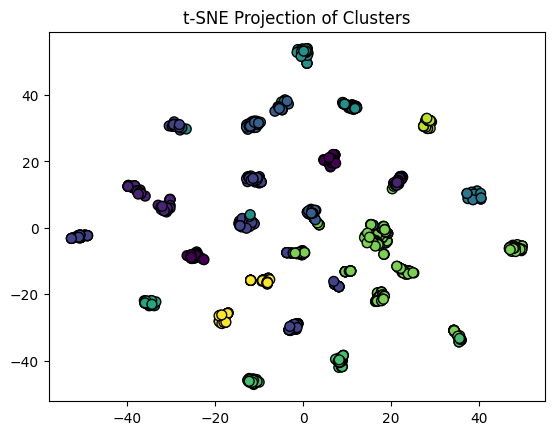

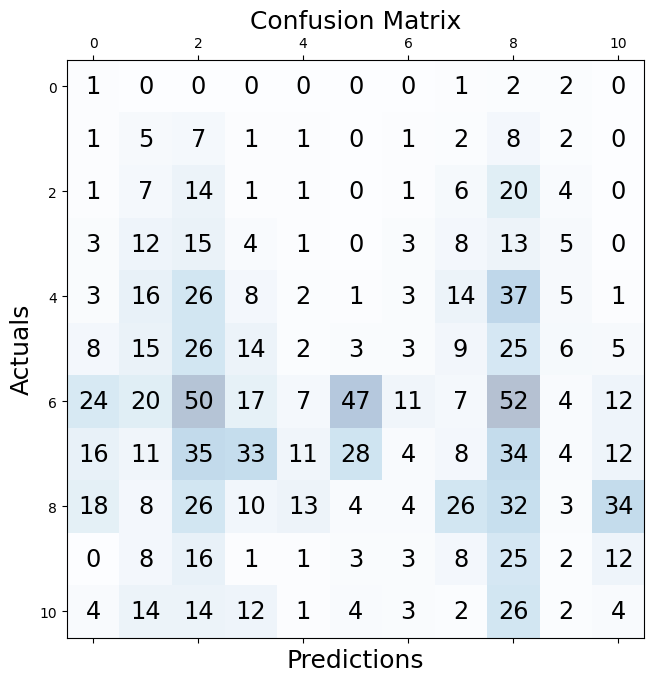

ari Score: 0.010450125629290869
nmi Score: 0.0661671859019695
fm_index Score: 0.14095150506302165
Silhouette Score: 0.2908190952434977
calinski_harabasz Score: 111.72142168287117
davies_bouldin Score: 1.501113402550544


In [ ]:
#Gaussian Mixture Model (GMM) for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 11, random_state=42)
glabels=gmm.fit_predict(X)
#glabels = gmm.labels_
#glabels = gmm.get_params()['labels_']
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_g = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_g[:, 0], X_tsne_g[:, 1], c=glabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, glabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'],glabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], glabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], glabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, glabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, glabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, glabels)
print(f"davies_bouldin Score: {davies_bouldin}")


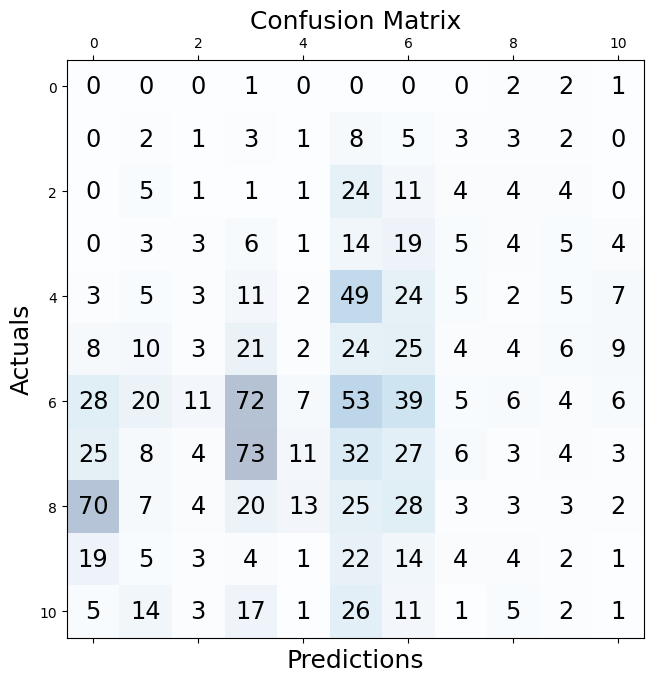

Silhouette Score: 0.29662789897789626
calinski_harabasz Score: 106.14785269045056
davies_bouldin Score: 1.4125787545658333
ari Score: 0.03998693609107342
nmi Score: 0.07579624836095994
fm_index Score: 0.17529456509981298


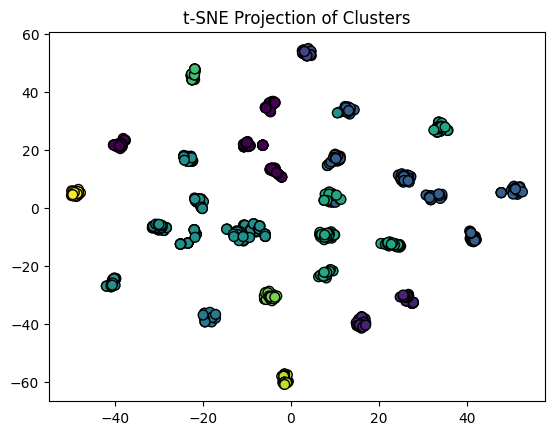

In [ ]:
#applying Gaussian Mixture Model (GMM) to entire dataset

Xt=ndf.drop('score', axis=1)
glabelst=gmm.fit_predict(Xt)
conf_matrix=confusion_matrix(y, glabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, glabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, glabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, glabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], glabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], glabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], glabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=glabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



SPECTRAL CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


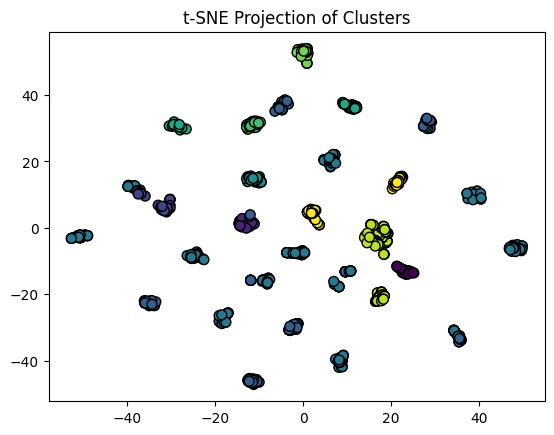

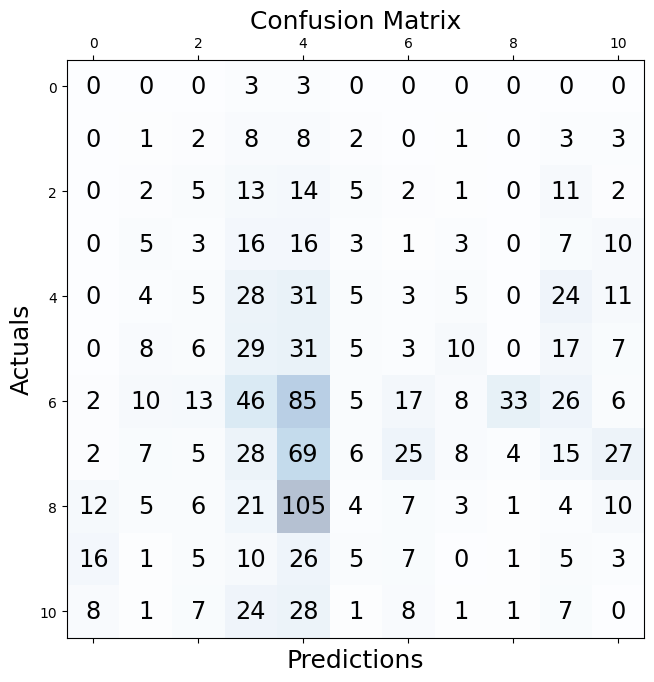

ari Score: 0.026064674275475902
nmi Score: 0.07459599975442072
fm_index Score: 0.17952265192441974
Silhouette Score: 0.09634498318692666
calinski_harabasz Score: 48.59516087818283
davies_bouldin Score: 2.4141166482564724


In [ ]:
#spectral clustering for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=11, affinity='nearest_neighbors', random_state=0)
slabels=sc.fit_predict(X)
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=slabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, slabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], slabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], slabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], slabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, slabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, slabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, slabels)
print(f"davies_bouldin Score: {davies_bouldin}")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


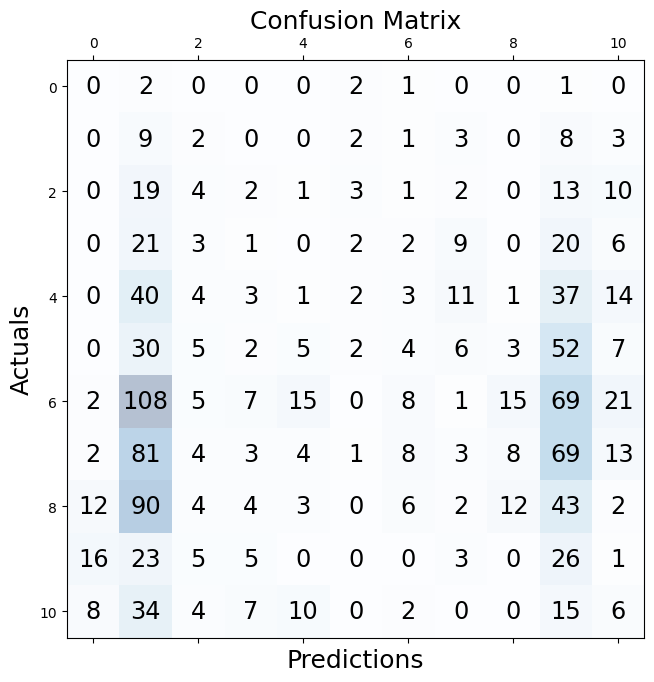

Silhouette Score: 0.07191337572460484
calinski_harabasz Score: 42.95495971437678
davies_bouldin Score: 2.0618352793661625
ari Score: 0.02115881082604319
nmi Score: 0.0709568446983506
fm_index Score: 0.20055220954496566


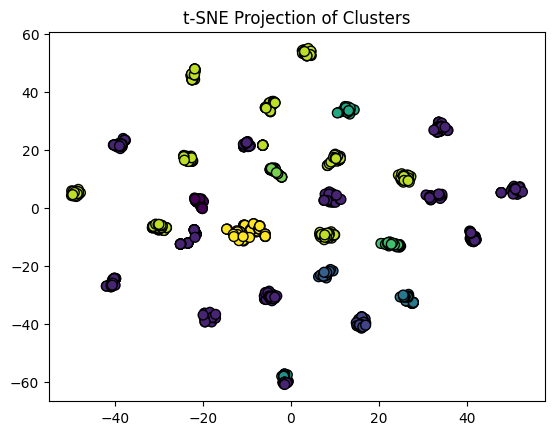

In [ ]:
#applying spectral clustering to entire dataset

Xt=ndf.drop('score', axis=1)
slabelst=sc.fit_predict(Xt)
conf_matrix=confusion_matrix(y, slabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, slabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, slabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, slabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], slabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], slabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], slabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=slabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



BIRCH CLUSTERING

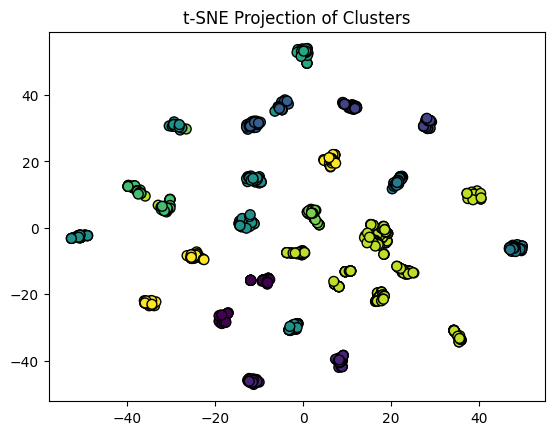

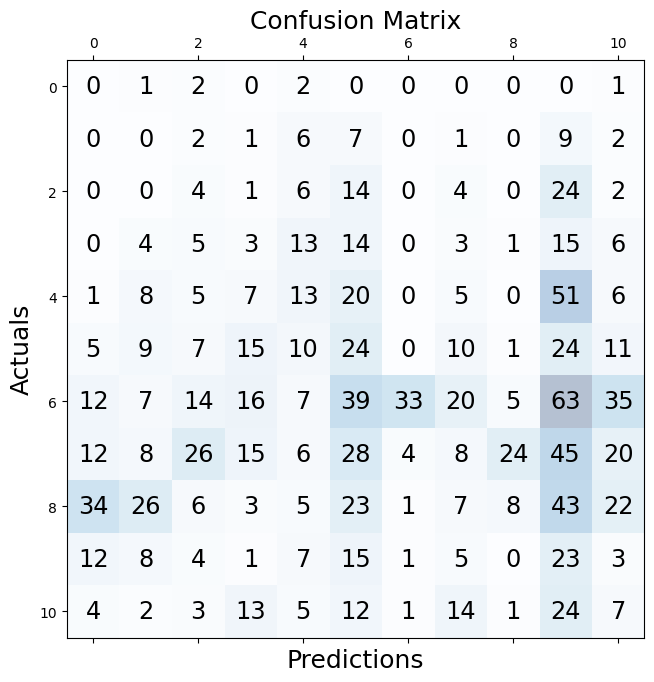

ari Score: 0.010272367957840492
nmi Score: 0.07775631872352563
fm_index Score: 0.14397832333348462
Silhouette Score: 0.2783349474601684
calinski_harabasz Score: 106.30740769494348
davies_bouldin Score: 1.5285238164298256


In [ ]:
#BIRCH for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import Birch
bmodel = Birch(branching_factor = 50, n_clusters = 11, threshold = 1.5)

# Fit the data (Training)
blabels=bmodel.fit_predict(X)
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=blabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, blabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], blabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], blabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], blabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, blabels)
print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, blabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, blabels)
print(f"davies_bouldin Score: {davies_bouldin}")


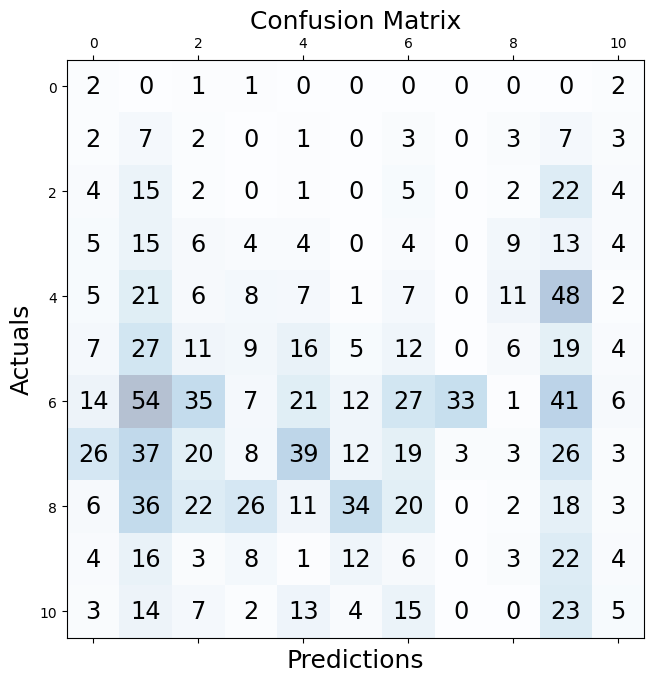

Silhouette Score: 0.2710709213272746
calinski_harabasz Score: 101.96980212458631
davies_bouldin Score: 1.6122137951266373
ari Score: 0.016838639781371973
nmi Score: 0.0801549914043716
fm_index Score: 0.14418938929521838


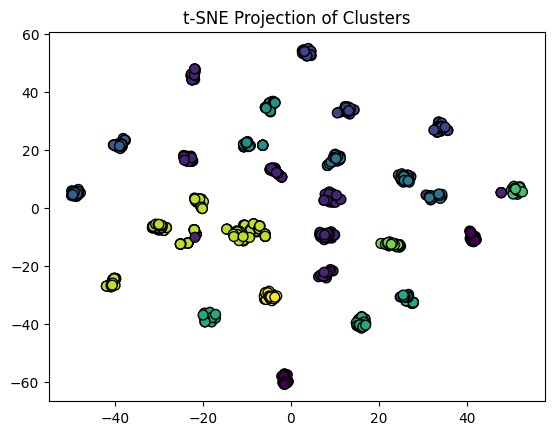

In [ ]:
#applying BIRCH to entire dataset

Xt=ndf.drop('score', axis=1)

blabelst = bmodel.fit_predict(Xt)
conf_matrix=confusion_matrix(y, blabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, blabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, blabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, blabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], blabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], blabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], blabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=blabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



KMEDOIDS CLUSTERING

In [ ]:
!pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.3 MB/s eta 0:00:00


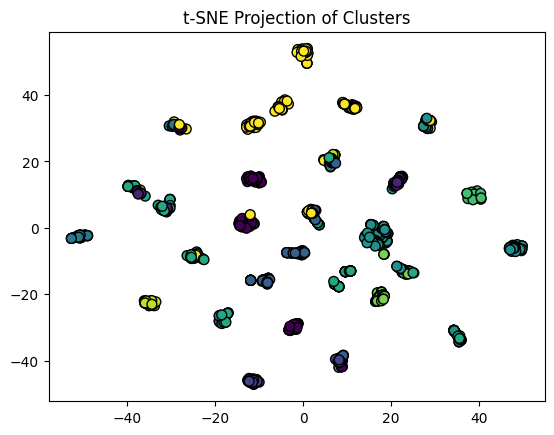

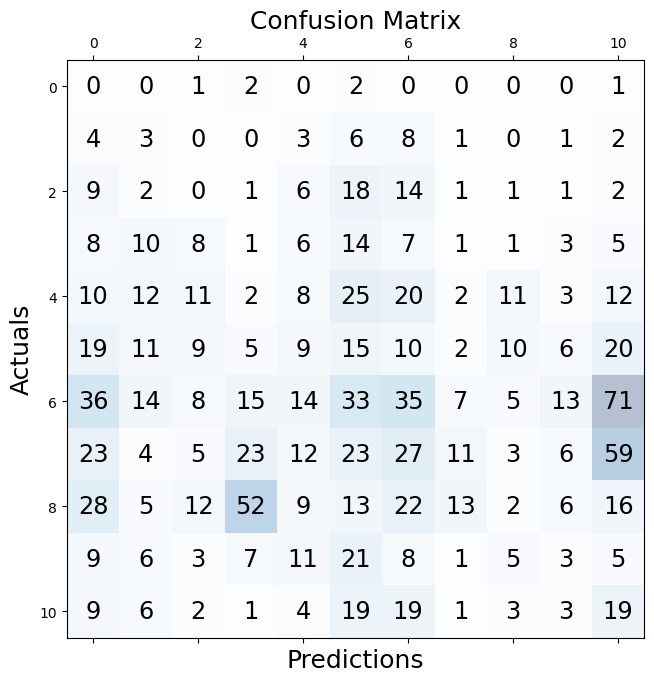

ari Score: 0.02991261800694706
nmi Score: 0.06371374420289162
fm_index Score: 0.1513264232871718
Silhouette Score: 0.17237794455264308
calinski_harabasz Score: 76.90372030741311
davies_bouldin Score: 1.974173057220636


In [ ]:
#kmedoids for subset dataset
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
kmedoids = KMedoids(n_clusters=11).fit(X)
clabels=kmedoids.labels_

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, clabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], clabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], clabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], clabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, clabels)
print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, clabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, clabels)
print(f"davies_bouldin Score: {davies_bouldin}")


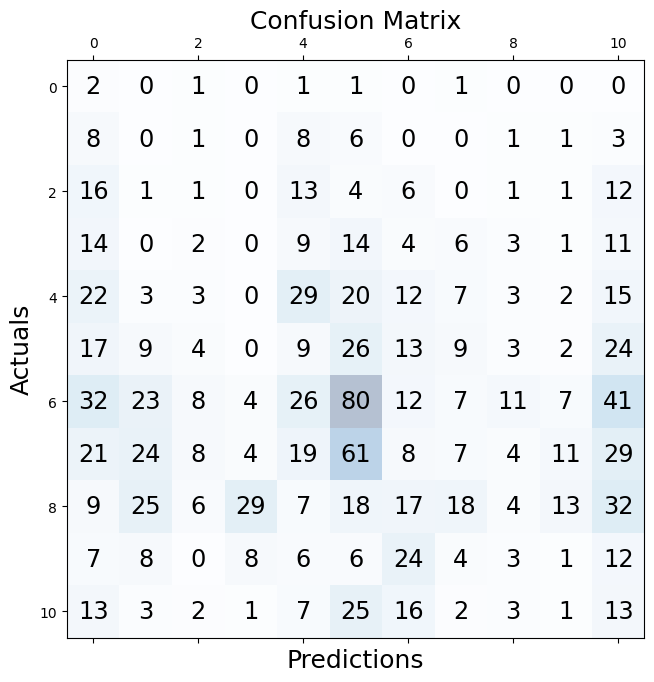

Silhouette Score: 0.1982009206209411
calinski_harabasz Score: 74.4625331851027
davies_bouldin Score: 1.9444380493598032
ari Score: 0.0260021752724222
nmi Score: 0.07005550065873516
fm_index Score: 0.1530575502992983


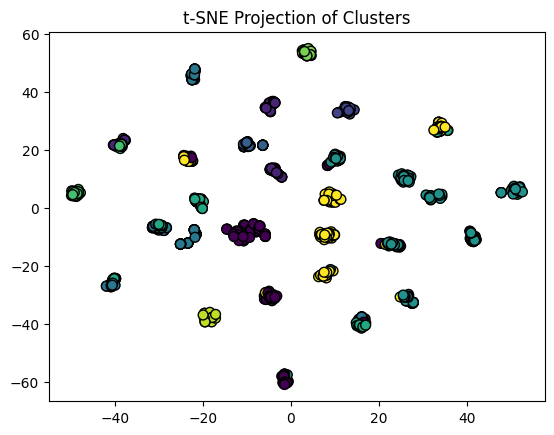

In [ ]:
#applying kmedoids to entire dataset

Xt=ndf.drop('score', axis=1)

kmedoids = KMedoids(n_clusters=11).fit(Xt)
kmlabels=kmedoids.labels_

conf_matrix=confusion_matrix(y, kmlabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, kmlabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, kmlabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, kmlabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], kmlabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], kmlabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], kmlabels)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmlabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



In [ ]:
'''
kmeans
heirarchical
dbscan
Gaussian Mixture Model (GMM)
Spectral Clustering
BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
kmedoids
THE ABOVE 7 MODELS HV BEEN IMPLEMENTED

kmeans
heirarchical
Gaussian Mixture Model (GMM)
THESE GAVE GOOD OUTPUTSSS

'''

'\nkmeans\nheirarchical\ndbscan\nGaussian Mixture Model (GMM)\nSpectral Clustering\nBIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)\nkmedoids\nTHE ABOVE 7 MODELS HV BEEN IMPLEMENTED\n\nkmeans\nheirarchical\nGaussian Mixture Model (GMM)\nTHESE GAVE GOOD OUTPUTSSS\n\n'

In [ ]:
read_file = pd.read_excel("drive/My Drive/volunteering_data_processed.xlsx")
read_file.to_csv ("Test.csv",
                  index = None,
                  header=True)

# read csv file and convert
# into a dataframe object
edf = pd.DataFrame(pd.read_csv("Test.csv"))

# show the dataframe
edf

Question  \
0     Sum of elements in an array   
1     Sum of elements in an array   
2     Sum of elements in an array   
3     Sum of elements in an array   
4     Sum of elements in an array   
...                           ...   
1171  Program to swap two numbers   
1172  Program to swap two numbers   
1173  Program to swap two numbers   
1174  Program to swap two numbers   
1175  Program to swap two numbers   

                                           Correct_Code  \
0     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
1     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
2     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
3     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
4     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
...                                                 ...   
1171  #include <stdio.h>\n \n void swap(int* num1, i...   
1172  #include <stdio.h>\n \n void swap(int* num1, i...   
1173  #include <stdio.h>\n \n void swap(int* num1, i...   
1174  #include <stdio.h>\n \n void swap(int* num1, i...   
1175  #include <stdio.h>\n \n void swap(int* num1, i...   

                                        Code_with_Error  \
0     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
1     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
2     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
3     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
4     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
...                                                 ...   
1171  #include <stdio.h>\n \n void swap(int* num1, i...   
1172  #include <stdio.h>\n \n void swap(int* num1, i...   
1173  #include <stdio.h>\n \n int main() {\n  int nu...   
1174  #include <stdio.h>\n \n void swap(int* num1, i...   
1175  #include <stdio.h>\n \n int main() {\n  int nu...   

                       Type_of_Error Number_of_Loops  \
0                             ['3a']               2   
1                             ['1b']               2   
2                             ['1c']               2   
3                       ['1e', '2d']               1   
4                             ['2b']               2   
...                              ...             ...   
1171        ['1c', '1e', '2b', '2c']               0   
1172                          ['1d']               0   
1173  ['1c', '1d', '1e', '2b', '2c']               0   
1174                          ['2b']               0   
1175                          ['3a']               0   

      Header_and_Main_Declaration  Incomprehensible_Code  \
0                               2                    2.0   
1                               2                    2.0   
2                               2                    2.0   
3                               2                    1.0   
4                               2                    2.0   
...                           ...                    ...   
1171                            1                    0.0   
1172                            2                    2.0   
1173                            2                    0.0   
1174                            2                    2.0   
1175                            2                    2.0   

      Comprehensible_Code_with_logical_errors  \
0                                           2   
1                                           2   
2                                           1   
3                                           1   
4                                           1   
...                                       ...   
1171                                        0   
1172                                        2   
1173                                        0   
1174                                        1   
1175                                        2   

      Comprehensible_code_with_syntax_errors  Correct_code_and_output  \
0                                        2.0                        2   
1                                

In [ ]:
unique_values = edf['Question'].unique()

print("Unique questions:")
print(unique_values)

Unique questions:
['Sum of elements in an array' 'Print the factors of a number'
 'Largest among three numbers' 'Factorial of a Number'
 "Calculate Fahrenheit to celsius and vice versa (depending on user's wish)"
 'Print the prime numbers in a range' 'Armstrong number or not'
 'Sorting an array using insertion sort'
 'Print if the number is a palindrome number or not'
 'Print Frequency of Each letter in a String in C.' 'Reverse an Array'
 'Write a C program to merge 2 arrays'
 'Write a program in C to copy one string to another string.'
 'Count number of digits for a number'
 'Generating multiplication table of a number'
 'Merge two sorted arrays in C' 'Print the reverse of the given number'
 'Calculate the roots of an equation' 'Find the gcd and lcm of 2 numbers '
 'sort an array using selection sort in c' nan
 'Write a C program to remove spaces in a string'
 'Simple pyramid for n (here n=4): 1 22 333 4444 (1 in one line, 22 in the next line, 333 next line, and so on)'
 'Calculate th

In [ ]:
label_mapping = {'Sum of elements in an array': 0,
                 'Print the factors of a number': 1,
                 'Largest among three numbers': 2,
                 'Factorial of a Number': 3,
                 "Calculate Fahrenheit to celsius and vice versa (depending on user's wish)": 4,
                 'Print the prime numbers in a range': 5,
                 'Armstrong number or not': 6,
                 'Sorting an array using insertion sort': 7,
                 'Print if the number is a palindrome number or not': 8,
                 'Print Frequency of Each letter in a String in C.': 9,
                 'Reverse an Array': 10,
                 'Write a C program to merge 2 arrays': 11,
                 'Write a program in C to copy one string to another string.': 12,
                 'Count number of digits for a number': 13,
                 'Generating multiplication table of a number': 14,
                 'Merge two sorted arrays in C': 15,
                 'Print the reverse of the given number': 16,
                 'Calculate the roots of an equation': 17,
                 'Find the gcd and lcm of 2 numbers ': 18,
                 'sort an array using selection sort in c': 19,
                 'Write a C program to remove spaces in a string': 20,
                 'Simple pyramid for n (here n=4): 1 22 333 4444 (1 in one line, 22 in the next line, 333 next line, and so on)': 21,
                 'Calculate the power of a number': 22,
                 'Sum of even and odd indexes in an array': 23,
                 'Print Fibonacci series (upto a specified limit)': 24,
                 'Print if the number is odd or even': 25,
                 'Remove Duplicates from Array in C+3:3C22:92:22:3': 26,
                 'Remove Duplicates from Array in C': 27,
                 'Print Square of Array Elements in C': 28,
                 'Print maximum Occurring Character in a String in C': 29,
                 'Program to swap two numbers': 30
                 }

# Create a new column 'Fruit_Labels' using the map function
edf['Ques'] = edf['Question'].map(label_mapping)

print(edf)

                         Question  \
0     Sum of elements in an array   
1     Sum of elements in an array   
2     Sum of elements in an array   
3     Sum of elements in an array   
4     Sum of elements in an array   
...                           ...   
1171  Program to swap two numbers   
1172  Program to swap two numbers   
1173  Program to swap two numbers   
1174  Program to swap two numbers   
1175  Program to swap two numbers   

                                           Correct_Code  \
0     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
1     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
2     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
3     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
4     #include <stdio.h>\n#define MAX_SIZE 100\nint ...   
...                                                 ...   
1171  #include <stdio.h>\n \n void swap(int* num1, i...   
1172  #include <stdio.h>\n \n void swap(int* num1, i...   
1173  #include <stdio.h>

In [ ]:
edf.shape

(1176, 16)

In [ ]:
edf=edf.reset_index()
q_map = edf[['index','Ques']].drop_duplicates().reset_index(drop=True)
print(q_map['Ques'].value_counts().sort_index())

q_map[q_map['Ques'].isna()]

0.0     40
1.0     40
2.0     40
3.0     39
4.0     40
5.0     40
6.0     40
7.0     40
8.0     37
9.0     40
10.0    40
11.0    40
12.0    40
13.0    40
14.0    40
15.0    40
16.0    33
17.0    34
18.0    41
19.0     1
20.0    34
21.0    40
22.0    40
23.0    40
24.0    40
25.0    40
26.0     2
27.0    37
28.0    39
29.0    40
30.0    40
Name: Ques, dtype: int64


index  Ques
745    745   NaN
746    746   NaN
747    747   NaN
748    748   NaN
749    749   NaN
750    750   NaN
751    751   NaN
752    752   NaN
753    753   NaN
754    754   NaN
755    755   NaN
756    756   NaN
757    757   NaN
758    758   NaN
759    759   NaN
760    760   NaN
761    761   NaN
762    762   NaN
763    763   NaN
764    764   NaN
765    765   NaN
766    766   NaN
767    767   NaN
768    768   NaN
769    769   NaN
770    770   NaN
771    771   NaN
772    772   NaN
773    773   NaN
774    774   NaN
775    775   NaN
776    776   NaN
777    777   NaN
778    778   NaN
779    779   NaN
780    780   NaN
781    781   NaN
782    782   NaN
783    783   NaN

In [ ]:
q_map['Ques']=q_map['Ques'].fillna(19)
q_map['Ques']=q_map['Ques'].astype("int")
print(q_map)

emb = df.reset_index()
print(emb.head())

df2 = emb.merge(q_map, on="index", how="left")
print(df2.head())

df2.shape

      index  Ques
0         0     0
1         1     0
2         2     0
3         3     0
4         4     0
...     ...   ...
1171   1171    30
1172   1172    30
1173   1173    30
1174   1174    30
1175   1175    30

[1176 rows x 2 columns]
   index         0         1         2         3         4         5  \
0      0 -1.355365  2.348287  1.030452 -1.503548 -0.380958  1.095197   
1      1 -1.403411  2.131454  1.117223 -1.542901 -0.351417  1.042730   
2      2 -1.388594  2.358305  0.994477 -1.480365 -0.382565  1.104627   
3      3 -1.352139  2.155489  1.027737 -1.424550 -0.316464  1.111701   
4      4 -1.411875  2.337363  1.050743 -1.506995 -0.321872  1.118751   

          6         7         8  ...       759       760       761       762  \
0 -2.063201 -1.657276  0.780015  ... -2.330601  0.542652 -1.660974 -2.150713   
1 -2.025140 -1.812830  0.707280  ... -2.183963  0.488854 -1.674375 -2.027182   
2 -2.042682 -1.669257  0.800453  ... -2.347989  0.555944 -1.651969 -2.149015   
3 -2.0

(1176, 771)

In [ ]:
df2['Ques'].value_counts().sort_index()

0     40
1     40
2     40
3     39
4     40
5     40
6     40
7     40
8     37
9     40
10    40
11    40
12    40
13    40
14    40
15    40
16    33
17    34
18    41
19    40
20    34
21    40
22    40
23    40
24    40
25    40
26     2
27    37
28    39
29    40
30    40
Name: Ques, dtype: int64

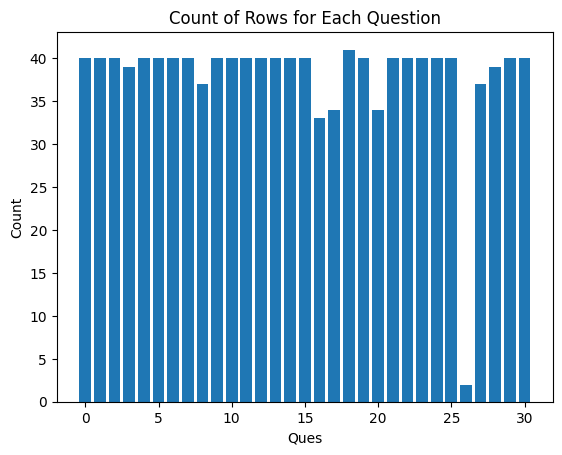

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each score
ques_counts = df2['Ques'].value_counts()

# Plotting the bar plot
plt.bar(ques_counts.index, ques_counts.values)

# Adding labels and title
plt.xlabel('Ques')
plt.ylabel('Count')
plt.title('Count of Rows for Each Question')

# Show the plot
plt.show()

In [ ]:
df2 = df2.drop("index", axis=1)
print(df2.head())

import pandas as pd
from scipy.stats import zscore


# Calculate Z-scores for the target column
z_scores = zscore(df2['Ques'])

# Define a threshold (e.g., 3) beyond which a data point is considered an outlier
threshold = 3

# Identify and remove rows with target values considered outliers
outliers_mask = abs(z_scores) > threshold
data = df2[~outliers_mask]

# Display the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(data.head())
print(data.shape)

nan_check_column = data['Ques'].isna()

# Filter rows with NaN values in column 'A'
nan_rows = data[nan_check_column]


print("\nRows with NaN values in Column A:")
print(nan_rows)


column_name = 'Ques'

# Drop rows with NaN values in the specified column
dfc = data.dropna(subset=[column_name])

# Display the original and cleaned DataFrames

print("\nDataFrame after removing NaN values in Column A:")
dfc.head()
dfc.shape

          0         1         2         3         4         5         6  \
0 -1.355365  2.348287  1.030452 -1.503548 -0.380958  1.095197 -2.063201   
1 -1.403411  2.131454  1.117223 -1.542901 -0.351417  1.042730 -2.025140   
2 -1.388594  2.358305  0.994477 -1.480365 -0.382565  1.104627 -2.042682   
3 -1.352139  2.155489  1.027737 -1.424550 -0.316464  1.111701 -2.039937   
4 -1.411875  2.337363  1.050743 -1.506995 -0.321872  1.118751 -2.068671   

          7         8         9  ...       760       761       762       763  \
0 -1.657276  0.780015  0.224140  ...  0.542652 -1.660974 -2.150713  0.545611   
1 -1.812830  0.707280  0.165037  ...  0.488854 -1.674375 -2.027182  0.514854   
2 -1.669257  0.800453  0.265268  ...  0.555944 -1.651969 -2.149015  0.582454   
3 -1.789147  0.725883  0.298638  ...  0.487809 -1.595799 -2.143987  0.419316   
4 -1.603735  0.730069  0.242844  ...  0.451709 -1.607142 -2.184134  0.521283   

        764       765       766       767  score  Ques  
0 -1.614411

(1176, 770)

In [ ]:
dfc[dfc['Ques']==15]

0         1         2         3         4         5         6  \
596 -0.691244 -0.779026  0.512457  0.554378 -0.533716  2.166288 -0.195420   
597 -0.403896 -0.815428  0.566895  0.468449 -0.521930  2.320704 -0.076982   
598 -0.578602 -0.421566  0.834645  0.463692 -0.454671  1.835686 -0.249629   
599 -0.609293 -0.479693  0.844550  0.693240 -0.353139  1.751581 -0.080106   
600 -0.450069 -0.471878  0.758644  0.556582 -0.363066  2.096666 -0.280582   
601 -0.618844 -0.473136  0.659253  0.776704 -0.226367  1.573965 -0.087290   
602 -0.524424 -0.651449  0.877436  0.427463 -0.607669  1.994997 -0.243384   
603 -0.670513 -0.616037  0.565855  0.674321 -0.290009  2.223531  0.025143   
604 -0.383544 -0.261942  0.799845  0.689844 -0.068005  1.530078 -0.070692   
605 -0.198886 -1.143974  0.824807  0.232447 -0.593008  2.732341 -0.049130   
606 -0.515295 -0.591142  1.036863  0.471963 -0.479162  2.162991 -0.236310   
607 -0.746078 -0.919724  0.301400  0.643065 -0.397432  2.446400  0.248783   
608 -0.666313 -0.391433  0.933548  0.398271 -0.440112  1.742983 -0.245144   
609 -0.923307 -0.826343  0.598845  0.703485 -0.537161  1.903935  0.227130   
610 -0.072886 -0.715411  0.788511  0.437927 -0.278199  2.496757 -0.147813   
611 -0.323398 -1.137901  0.580442  0.234751 -0.635691  2.558483 -0.085878   
612 -0.458516 -0.852247  0.669480  0.394957 -0.657165  2.279888 -0.140699   
613 -0.220541 -0.932621  0.753842  0.338427 -0.537597  2.273368 -0.139779   
614 -0.504855 -1.435579  0.598693  0.454054 -0.606769  2.654441  0.172370   
615 -0.065919 -1.146922  0.665671  0.196527 -0.526058  2.508581 -0.184572   
616 -0.719305 -1.546768  0.662719  0.528216 -0.649656  2.542072  0.295979   
617  0.216101 -1.718522  0.647347  0.341456 -0.385151  3.100244  0.194608   
618 -0.960203 -1.102888  0.906340  0.433338 -0.725295  2.059538 -0.071788   
619 -0.750718 -1.047596  0.736033  0.305861 -0.858369  2.138504 -0.062103   
620 -1.220223 -1.232684  1.020354  0.564082 -0.662597  2.135230 -0.224350   
621 -0.810333 -1.572336  0.568386  0.533524 -0.632178  2.583993  0.343108   
622 -0.759682 -0.869878  0.866090  0.459222 -0.660873  1.785832  0.208749   
623 -0.735680 -0.665299  0.992430  0.565393 -0.727541  1.346875 -0.149148   
624 -0.731512 -1.248961  0.769820  0.401858 -0.663592  2.021154  0.185827   
625 -1.011101 -1.144048  0.801614  0.538490 -0.729837  2.126719  0.108156   
626 -1.004901 -1.286320  0.623482  0.646822 -0.786328  2.007731  0.289350   
627 -0.291552 -1.776453  0.441748  0.340732 -0.576153  3.017093  0.252132   
628 -0.850498 -0.729818  1.051234  0.538709 -0.609162  1.670978 -0.180644   
629 -0.815052 -1.134280  0.631476  0.614120 -0.823144  2.451731  0.176820   
630 -0.808941 -1.114040  0.776520  0.512101 -0.671203  2.088315  0.204370   
631 -0.231442 -1.361974  0.000075  0.839659 -0.359608  2.291004  0.416573   
632 -1.236120 -1.392895 -0.313691  0.597894 -0.577778  2.032347  0.069046   
633 -1.033336 -0.491793  0.293609  0.040199 -0.598684  2.023856 -0.169370   
634 -0.624194 -0.930435 -0.860437  0.384765  0.937203  1.431648 -0.433429   
635 -0.518343 -0.715899  0.500305  0.539039 -0.553360  2.262958 -0.039363   

            7         8         9  ...       760       761       762  \
596  0.304083 -0.709268  0.866011  ... -0.657425  1.021507 -0.721569   
597  0.488619 -0.730582  0.970184  ... -0.768625  1.044217 -0.965456   
598  0.176347 -0.735010  0.763849  ... -0.884804  0.795369 -0.968006   
599  0.142648 -0.490798  0.752864  ... -0.610454  0.909325 -0.711325   
600  0.436230 -0.607887  0.805211  ... -0.841003  1.036119 -0.870334   
601  0.205125 -0.449587  0.640166  ... -0.630515  0.795875 -0.714981   
602 -0.112408 -0.698549  0.951136  ... -0.750180  0.743402 -0.904370   
603  0.619224 -0.456011  0.604239  ... -0.829050  0.611487 -0.957825   
604  0.179491 -0.523443  0.640919  ... -0.388416  0.486045 -0.682185   
605  0.511901 -0.840739  1.264749  ... -0.934586  0.819913 -1.535472   
606  0.082025 -0.610339  0.848882  ... -0.831829  0.509309 -1.

In [ ]:
dfc[dfc['Ques']==11 ]

0         1         2         3         4         5         6  \
436 -0.815359  0.200025  0.245965  0.428069 -0.093465  1.223944 -0.175791   
437 -1.030650  0.238695  0.399670  0.188530 -0.516749  1.019627 -0.316938   
438 -0.474220  0.219760  0.357756  0.564723 -0.045823  1.056049 -0.361979   
439 -0.577705  0.337715  0.539681  0.892107 -0.121461  1.483411 -0.054775   
440 -1.154598  0.353450  0.402307  0.507151 -0.085697  1.352660 -0.006842   
441 -1.190032  0.483781  0.614375  0.285323 -0.140691  1.428898 -0.281792   
442  0.010979 -0.589711  0.820096  0.654453  0.358975  1.177902 -0.793947   
443 -0.095062 -0.612384  1.124584  0.461090 -0.026612  1.658902 -0.337692   
444 -0.178798 -0.400850  0.878211  0.557942  0.250105  1.592847 -0.012821   
445  0.105817 -0.096215  0.648449  0.289264  0.638406  1.690315 -0.343803   
446 -0.444425  0.068491  0.753810  0.572726  0.399496  1.126898 -0.212473   
447  0.032567 -0.214473  0.666439  0.182325  0.563606  1.707458 -0.136748   
448 -0.530585 -0.332636  0.845858  0.276321  0.056930  1.047404 -0.695545   
449 -0.601222 -0.344478  0.802575  0.213774  0.031607  0.977693 -0.601173   
450 -0.504114 -0.555972  0.644581  0.098300  0.026418  1.022556 -0.568615   
451 -0.428952  0.594153  0.682673  0.912622  0.531199  1.407917 -0.750165   
452 -0.013381  0.696986  0.840285  0.494376  0.473529  1.435965 -0.508660   
453 -0.156075  0.574919  0.856904  0.537767  0.460029  1.314282 -0.588433   
454 -0.909969 -0.408665  0.465557  0.488654 -0.078289  1.748230 -0.288567   
455 -0.830556 -0.465223  0.874270  0.312595  0.021568  1.460465 -0.553733   
456 -0.836094 -0.080944  0.697773  0.335450  0.026590  1.428674 -0.190240   
457  0.616613  0.639383  1.692321  0.156984  1.041833  1.420604 -0.593015   
458  0.276866  0.657718  1.285097  0.163874  0.813947  1.361531 -0.558541   
459  0.254039  0.705964  1.131412  0.314854  0.430528  1.398909 -0.324026   
460  0.076144  1.033526  0.743710 -0.092271  0.274353  0.984756 -0.680764   
461 -0.222047  0.429242  1.123627  0.122128  0.373504  0.925831 -0.250182   
462 -0.225574  0.658266  1.158522 -0.021414  0.339657  0.744927 -0.203861   
463 -0.767636 -0.162343  0.961827  0.338533  0.472608  0.952207 -0.993182   
464 -0.799642 -0.217323  1.165284  0.169448  0.645575  1.139560 -1.094154   
465 -0.846623 -0.443649  0.907783  0.302630  0.624914  1.279073 -1.062004   
466  1.260058 -0.013280  0.774123  0.257707  1.229676  1.197011 -0.205239   
467  0.870343 -0.026842  0.371810  0.182488  1.039916  1.401332 -0.097256   
468  1.117331 -0.073958  0.702153  0.423848  1.158812  1.164235 -0.302355   
469 -0.874058 -1.044664  0.552663  1.225429  2.092019  0.376935 -0.936496   
470 -0.407201 -1.241738 -0.570773  0.791223  3.281687  0.283464 -0.139881   
471 -0.587488 -1.161029  0.089055  1.264239  3.025966  0.193981 -1.431506   
472  0.008144 -0.372770  0.668800  1.017285  2.672985  0.872940 -0.334583   
473 -0.255561  0.141699  0.623700  0.901967  2.201540  0.869355 -0.375174   
474  0.044687 -0.228199  0.699512  1.183149  2.410811  0.761205 -0.743076   
475 -0.977776 -0.992804  0.603243  0.883018  2.461409  0.172677 -0.478292   

            7         8         9  ...       760       761       762  \
436  0.106406 -0.689916 -0.015844  ... -0.602977 -0.199600 -0.823692   
437  0.341363 -0.683566 -0.190237  ... -0.160985 -0.416636 -1.023174   
438 -0.197121 -0.625024  0.273764  ... -0.357643  0.087350 -0.332653   
439  0.084116 -0.538594  0.306494  ... -0.364597 -0.160218 -1.547375   
440  0.346800 -0.671854 -0.078040  ... -0.641704 -0.207152 -1.397183   
441  0.409604 -0.565587 -0.128973  ... -0.349533 -0.181450 -1.660476   
442  0.222694 -0.575002 -0.228912  ... -0.439768  0.084076 -1.176149   
443  0.280180 -0.696163  0.568037  ... -0.193352  0.219410 -1.041781   
444  0.372416 -0.710294  0.065729  ... -0.092965  0.146267 -1.300359   
445  0.794763 -1.091316  0.108333  ... -0.382976  0.163990 -1.225861   
446  0.138645 -0.709565  0.307404  ... -0.050564  0.589367 -1.

In [ ]:
test = dfc.drop(["score","Ques"],axis=1)

In [ ]:
q11 = test.loc[475]
q15 = test.loc[633]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

embedding1 = np.array(q11).reshape(1, -1)
embedding2 = np.array(q15).reshape(1, -1)

similarity = cosine_similarity(embedding1, embedding2)[0, 0]

print(f"Cosine Similarity: {similarity}")

Cosine Similarity: 0.6900579077574576


KMEANS

In [ ]:
dfc['Ques']=dfc['Ques'].astype("int")
dfc['score']=dfc['score'].astype("int")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
X2=dfc.drop(['Ques','score'], axis=1)
y2=dfc['Ques']
# Split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}

model = Lasso()
rand_search = RandomizedSearchCV(estimator=model,
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(X2,y2)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.168e+01, tolerance: 8.141e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+01, tolerance: 9.259e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+01, tolerance: 8.209e

0.0814705527388544
-34.77575773054459


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Initialize the LASSO model
alpha = 0.015351474835892498 # Regularization strength (adjustable parameter)
lasso_model_hp = Lasso(alpha=alpha, random_state=42)

# Train the LASSO model
lasso_model_hp.fit(X2, y2)

# Display the learned coefficients
print("Learned Coefficients:")
print(lasso_model_hp.coef_)
lasso_res_hp = [index for index, value in enumerate(lasso_model_hp.coef_) if value != 0]

print("Indexes of non-zero numbers:", lasso_res_hp)

Learned Coefficients:
[ 0.         -0.12574364  0.         -0.          0.         -0.
  0.          0.          0.          0.          0.         -0.
  0.          0.33724613  0.          0.         -0.          0.
 -0.403753   -0.         -0.         -0.          0.05126902  0.
  0.          0.          0.          0.         -0.         -0.024816
 -0.10378641 -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.27095941 -0.         -0.
  0.         -0.          0.          0.73480225 -0.         -0.11252762
  0.15135191  0.         -0.          0.08014453 -0.          0.
  0.          0.01155971  0.         -1.23034503 -0.          0.
  0.         -0.          0.20964518 -0.         -0.04304382 -0.0358335
 -0.         -0.          0.          0.         -0.         -0.
  0.0495974   0.         -0.30658853 -0.         -0.20172658 -0.
  0.          0.77033901 -0.         -0.6036315

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.757e+01, tolerance: 9.334e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named original_df

# List of features you want to select
selected_features =  ['1', '13', '18', '19', '22', '29', '30', '45', '51', '53', '54', '57', '61', '63', '68', '70', '71', '78', '80', '82', '85', '87', '91', '92', '93',
                       '97', '98', '109', '110', '114', '119', '128', '129', '131', '133', '134', '136', '137', '139', '141', '142', '149', '152', '170', '174', '176', '178',
                        '185', '188', '189', '198', '201', '204', '207', '220', '221', '226', '231', '244', '253', '255', '257', '271', '280', '282', '283', '290',
                        '297', '305', '308', '315', '319', '321', '328', '336', '345', '348', '355', '356', '362', '364', '366', '367', '369', '370', '371', '375', '378',
                        '379', '380', '381', '385', '391', '392', '394', '395', '405', '406', '407', '410', '414', '417', '425', '427', '429', '431', '432', '434', '437',
                        '442', '444', '452', '455', '460', '462', '469', '473', '474', '478', '483', '492', '503', '505', '507', '508', '513', '518', '530', '531', '533',
                        '543', '544', '547', '548', '551', '552', '557', '559', '569', '570', '572', '578', '586', '589', '590', '596', '600', '601', '610', '612', '616',
                        '618', '619', '620' , '625', '627', '628','631', '644', '647', '648', '652', '653', '656', '661', '663', '664', '667', '670', '675', '676', '677',
                        '678', '680', '692', '696', '697', '699', '700', '702', '703', '706', '709', '710', '715', '718', '719', '722', '727', '728', '729', '732', '736',
                        '744', '759', 'score', 'Ques']

# Create a new DataFrame with selected features
new_df2 = dfc[selected_features].copy()

# Display the new DataFrame
print(new_df2)

             1        13        18        19        22        29        30  \
0     2.348287 -0.144763  0.413562  0.740739 -1.277235  0.013485  0.435404   
1     2.131454 -0.081431  0.284334  0.817390 -1.300868 -0.071593  0.446588   
2     2.358305 -0.145859  0.405725  0.747961 -1.305503  0.033899  0.386743   
3     2.155489 -0.060405  0.325666  0.590135 -1.220976 -0.003498  0.439692   
4     2.337363 -0.120844  0.448165  0.636470 -1.394446 -0.084691  0.376348   
...        ...       ...       ...       ...       ...       ...       ...   
1171 -1.962069  1.917883 -0.039235 -2.722078  0.206342 -0.981671  2.584887   
1172 -2.904476  1.670365 -0.279312 -2.577008 -0.347362 -1.800653  1.603661   
1173 -4.291207  0.438695  1.133334 -0.523582  0.399045 -2.179645  0.307964   
1174 -3.192011  1.866288 -0.260491 -2.342490 -0.308459 -2.052903  1.818996   
1175 -3.551449  1.126207  1.068386 -2.815949 -1.263012 -2.384122  1.356647   

            45        51        53  ...       722       727    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 3  3  3 ... 12 21 21]


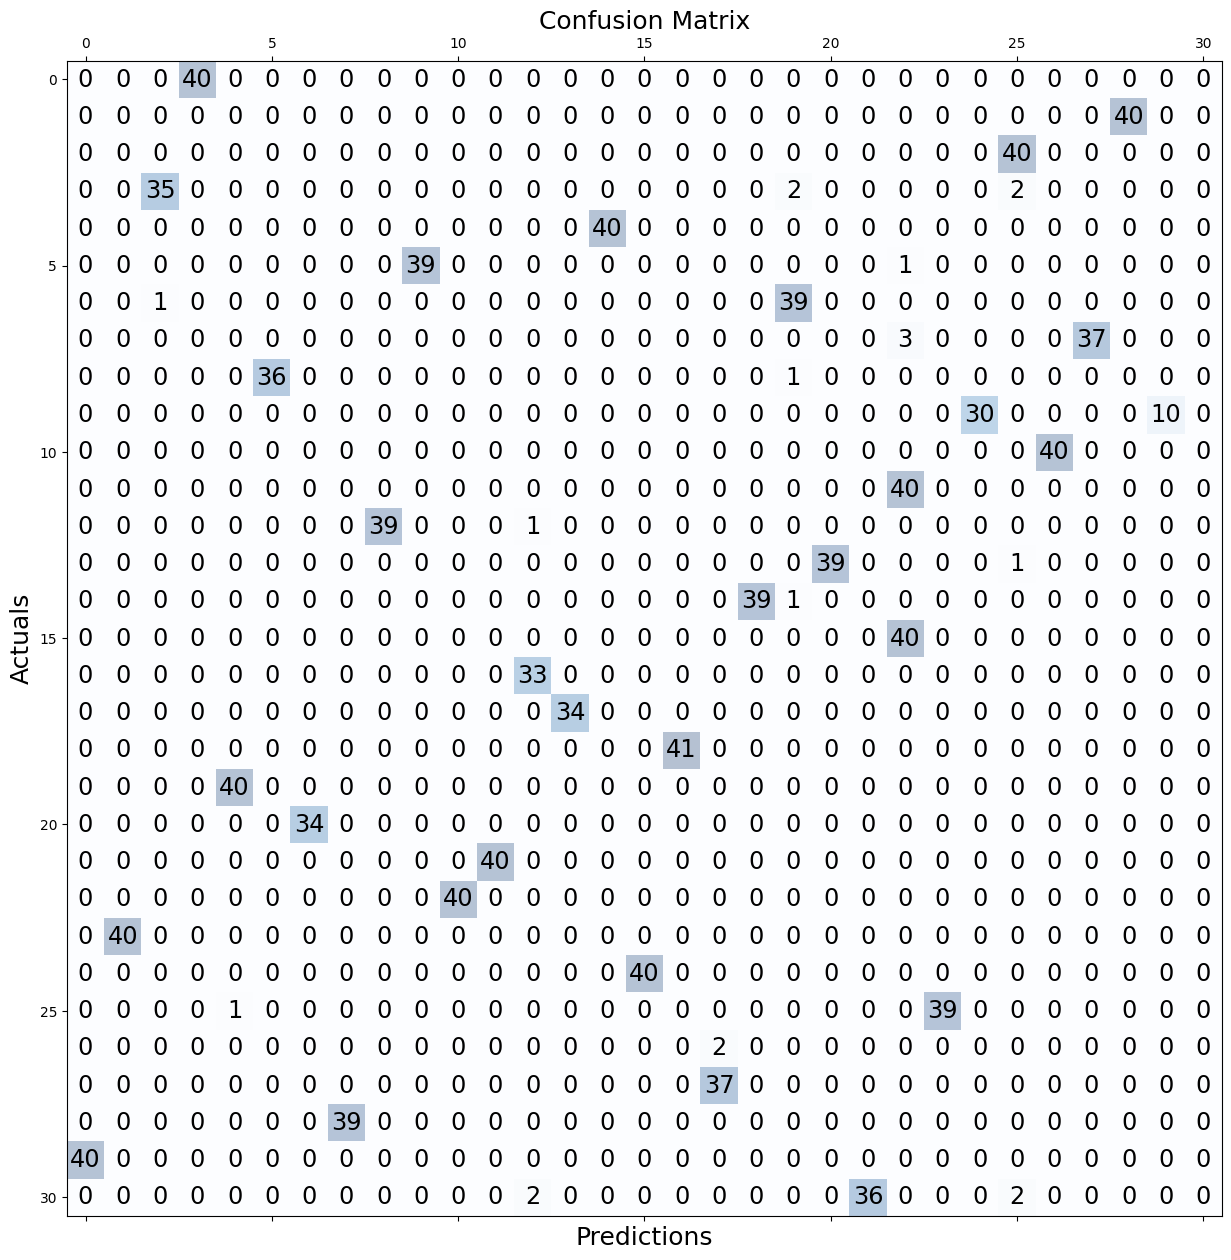

Silhouette Score: 0.5902464478336076
calinski_harabasz Score: 274.7477252180187
davies_bouldin Score: 0.7392827876386048
ari Score: 0.9217127129437509
nmi Score: 0.9700219180212255
fm_index Score: 0.924869463349018


In [ ]:
#applying kmeans to entire dataset -----------------------------------------
Xk=dfc.drop(['Ques','score'], axis=1)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

model_kmeans = KMeans(n_clusters=30, random_state=42)
kmeans_model = model_kmeans.fit(Xk)
klabels=kmeans_model.labels_
print(klabels)
conf_matrix=confusion_matrix(y2, klabels)

fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(X2, klabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X2, klabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X2, klabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(dfc['Ques'], klabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(dfc['Ques'], klabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(dfc['Ques'], klabels)
print(f"fm_index Score: {fm_index}")

In [ ]:
data_with_clusters = pd.DataFrame(data=X2, columns=X2.columns)
clusters = model_kmeans.fit_predict(Xk)
data_with_clusters["Cluster"] = clusters
cluster_distribution = pd.crosstab(data_with_clusters["Cluster"], y2)

print("\nCluster Distribution Across Target Variable:")
print(cluster_distribution)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Distribution Across Target Variable:
Ques     0   1   2   3   4   5   6   7   8   9   ...  21  22  23  24  25  26  \
Cluster                                          ...                           
0         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1         0   0   0   0   0   0   0   0   0   0  ...   0   0  40   0   0   0   
2         0   0   0  35   0   0   1   0   0   0  ...   0   0   0   0   0   0   
3        40   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
4         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   1   0   
5         0   0   0   0   0   0   0   0  36   0  ...   0   0   0   0   0   0   
6         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
7         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
8         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
9         0   0   0   0   0  39   0   0   0   0  ...   0   0   0   0   0  

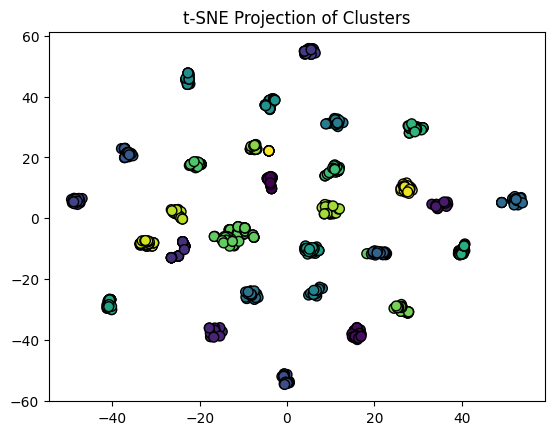

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xk)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_model.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

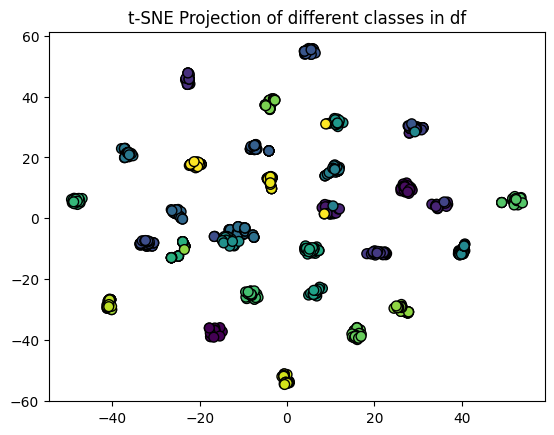

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xk)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y2, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of different classes in df')
plt.show()

In [ ]:
len(dfc)

1176

In [ ]:
dfc['Questions']= dfc['Ques']

In [ ]:
for i in range(0, len(dfc)):
  if dfc['score'][i]==0:
    if dfc['Questions'][i]==0:
      dfc['Label']=0
    elif dfc['Questions'][i]==1:
      dfc['Label']=1
    elif dfc['Questions'][i]==2:
      dfc['Label']=2
    elif dfc['Questions'][i]==3:
      dfc['Label']=3
    elif dfc['Questions'][i]==4:
      dfc['Label']=4
    elif dfc['Questions'][i]==5:
      dfc['Label']=5
    elif dfc['Questions'][i]==6:
      dfc['Label']=6
    elif dfc['Questions'][i]==7:
      dfc['Label']=7
    elif dfc['Questions'][i]==8:
      dfc['Label']=8
    elif dfc['Questions'][i]==9:
      dfc['Label']=9
    elif dfc['Questions'][i]==10:
      dfc['Label']=10
    elif dfc['Questions'][i]==11:
      dfc['Label']=11
    elif dfc['Questions'][i]==12:
      dfc['Label']=12
    elif dfc['Questions'][i]==13:
      dfc['Label']=13
    elif dfc['Questions'][i]==14:
      dfc['Label']=14
    elif dfc['Questions'][i]==15:
      dfc['Label']=15
    elif dfc['Questions'][i]==16:
      dfc['Label']=16
    elif dfc['Questions'][i]==17:
      dfc['Label']=17
    elif dfc['Questions'][i]==18:
      dfc['Label']=18
    elif dfc['Questions'][i]==19:
      dfc['Label']=19
    elif dfc['Questions'][i]==20:
      dfc['Label']=20
    elif dfc['Questions'][i]==21:
      dfc['Label']=21
    elif dfc['Questions'][i]==22:
      dfc['Label']=22
    elif dfc['Questions'][i]==23:
      dfc['Label']=23
    elif dfc['Questions'][i]==24:
      dfc['Label']=24
    elif dfc['Questions'][i]==25:
      dfc['Label']=25
    elif dfc['Questions'][i]==26:
      dfc['Label']=26
    elif dfc['Questions'][i]==27:
      dfc['Label']=27
    elif dfc['Questions'][i]==28:
      dfc['Label']=28
    elif dfc['Questions'][i]==29:
      dfc['Label']=29
    elif dfc['Questions'][i]==30:
      dfc['Label']=30


  elif dfc['score'][i]==1:
    if dfc['Questions'][i]==0:
      dfc['Label']=32
    elif dfc['Questions'][i]==1:
      dfc['Label']=33
    elif dfc['Questions'][i]==2:
      dfc['Label']=34
    elif dfc['Questions'][i]==3:
      dfc['Label']=35
    elif dfc['Questions'][i]==4:
      dfc['Label']=36
    elif dfc['Questions'][i]==5:
      dfc['Label']=37
    elif dfc['Questions'][i]==6:
      dfc['Label']=38
    elif dfc['Questions'][i]==7:
      dfc['Label']=39
    elif dfc['Questions'][i]==8:
      dfc['Label']=40
    elif dfc['Questions'][i]==9:
      dfc['Label']=41
    elif dfc['Questions'][i]==10:
      dfc['Label']=42
    elif dfc['Questions'][i]==11:
      dfc['Label']=43
    elif dfc['Questions'][i]==12:
      dfc['Label']=44
    elif dfc['Questions'][i]==13:
      dfc['Label']=45
    elif dfc['Questions'][i]==14:
      dfc['Label']=46
    elif dfc['Questions'][i]==15:
      dfc['Label']=47
    elif dfc['Questions'][i]==16:
      dfc['Label']=48
    elif dfc['Questions'][i]==17:
      dfc['Label']=49
    elif dfc['Questions'][i]==18:
      dfc['Label']=50
    elif dfc['Questions'][i]==19:
      dfc['Label']=51
    elif dfc['Questions'][i]==20:
      dfc['Label']=52
    elif dfc['Questions'][i]==21:
      dfc['Label']=53
    elif dfc['Questions'][i]==22:
      dfc['Label']=54
    elif dfc['Questions'][i]==23:
      dfc['Label']=55
    elif dfc['Questions'][i]==24:
      dfc['Label']=56
    elif dfc['Questions'][i]==25:
      dfc['Label']=57
    elif dfc['Questions'][i]==26:
      dfc['Label']=58
    elif dfc['Questions'][i]==27:
      dfc['Label']=59
    elif dfc['Questions'][i]==28:
      dfc['Label']=60
    elif dfc['Questions'][i]==29:
      dfc['Label']=61
    elif dfc['Questions'][i]==30:
      dfc['Label']=62


  elif dfc['score'][i]==2:
    if dfc['Questions'][i]==0:
      dfc['Label']=64
    elif dfc['Questions'][i]==1:
      dfc['Label']=65
    elif dfc['Questions'][i]==2:
      dfc['Label']=66
    elif dfc['Questions'][i]==3:
      dfc['Label']=67
    elif dfc['Questions'][i]==4:
      dfc['Label']=68
    elif dfc['Questions'][i]==5:
      dfc['Label']=69
    elif dfc['Questions'][i]==6:
      dfc['Label']=70
    elif dfc['Questions'][i]==7:
      dfc['Label']=71
    elif dfc['Questions'][i]==8:
      dfc['Label']=72
    elif dfc['Questions'][i]==9:
      dfc['Label']=73
    elif dfc['Questions'][i]==10:
      dfc['Label']=74
    elif dfc['Questions'][i]==11:
      dfc['Label']=75
    elif dfc['Questions'][i]==12:
      dfc['Label']=76
    elif dfc['Questions'][i]==13:
      dfc['Label']=77
    elif dfc['Questions'][i]==14:
      dfc['Label']=78
    elif dfc['Questions'][i]==15:
      dfc['Label']=79
    elif dfc['Questions'][i]==16:
      dfc['Label']=80
    elif dfc['Questions'][i]==17:
      dfc['Label']=81
    elif dfc['Questions'][i]==18:
      dfc['Label']=82
    elif dfc['Questions'][i]==19:
      dfc['Label']=83
    elif dfc['Questions'][i]==20:
      dfc['Label']=84
    elif dfc['Questions'][i]==21:
      dfc['Label']=85
    elif dfc['Questions'][i]==22:
      dfc['Label']=86
    elif dfc['Questions'][i]==23:
      dfc['Label']=87
    elif dfc['Questions'][i]==24:
      dfc['Label']=88
    elif dfc['Questions'][i]==25:
      dfc['Label']=89
    elif dfc['Questions'][i]==26:
      dfc['Label']=90
    elif dfc['Questions'][i]==27:
      dfc['Label']=91
    elif dfc['Questions'][i]==28:
      dfc['Label']=92
    elif dfc['Questions'][i]==29:
      dfc['Label']=93
    elif dfc['Questions'][i]==30:
      dfc['Label']=94


  elif dfc['score'][i]==3:
    if dfc['Questions'][i]==0:
      dfc['Label']=96
    elif dfc['Questions'][i]==1:
      dfc['Label']=97
    elif dfc['Questions'][i]==2:
      dfc['Label']=98
    elif dfc['Questions'][i]==3:
      dfc['Label']=99
    elif dfc['Questions'][i]==4:
      dfc['Label']=100
    elif dfc['Questions'][i]==5:
      dfc['Label']=101
    elif dfc['Questions'][i]==6:
      dfc['Label']=102
    elif dfc['Questions'][i]==7:
      dfc['Label']=103
    elif dfc['Questions'][i]==8:
      dfc['Label']=104
    elif dfc['Questions'][i]==9:
      dfc['Label']=105
    elif dfc['Questions'][i]==10:
      dfc['Label']=106
    elif dfc['Questions'][i]==11:
      dfc['Label']=107
    elif dfc['Questions'][i]==12:
      dfc['Label']=108
    elif dfc['Questions'][i]==13:
      dfc['Label']=109
    elif dfc['Questions'][i]==14:
      dfc['Label']=110
    elif dfc['Questions'][i]==15:
      dfc['Label']=111
    elif dfc['Questions'][i]==16:
      dfc['Label']=112
    elif dfc['Questions'][i]==17:
      dfc['Label']=113
    elif dfc['Questions'][i]==18:
      dfc['Label']=114
    elif dfc['Questions'][i]==19:
      dfc['Label']=115
    elif dfc['Questions'][i]==20:
      dfc['Label']=116
    elif dfc['Questions'][i]==21:
      dfc['Label']=117
    elif dfc['Questions'][i]==22:
      dfc['Label']=118
    elif dfc['Questions'][i]==23:
      dfc['Label']=119
    elif dfc['Questions'][i]==24:
      dfc['Label']=120
    elif dfc['Questions'][i]==25:
      dfc['Label']=121
    elif dfc['Questions'][i]==26:
      dfc['Label']=122
    elif dfc['Questions'][i]==27:
      dfc['Label']=123
    elif dfc['Questions'][i]==28:
      dfc['Label']=124
    elif dfc['Questions'][i]==29:
      dfc['Label']=125
    elif dfc['Questions'][i]==30:
      dfc['Label']=126


  elif dfc['score'][i]==4:
    if dfc['Questions'][i]==0:
      dfc['Label']=128
    elif dfc['Questions'][i]==1:
      dfc['Label']=129
    elif dfc['Questions'][i]==2:
      dfc['Label']=130
    elif dfc['Questions'][i]==3:
      dfc['Label']=131
    elif dfc['Questions'][i]==4:
      dfc['Label']=132
    elif dfc['Questions'][i]==5:
      dfc['Label']=133
    elif dfc['Questions'][i]==6:
      dfc['Label']=134
    elif dfc['Questions'][i]==7:
      dfc['Label']=135
    elif dfc['Questions'][i]==8:
      dfc['Label']=136
    elif dfc['Questions'][i]==9:
      dfc['Label']=137
    elif dfc['Questions'][i]==10:
      dfc['Label']=138
    elif dfc['Questions'][i]==11:
      dfc['Label']=139
    elif dfc['Questions'][i]==12:
      dfc['Label']=140
    elif dfc['Questions'][i]==13:
      dfc['Label']=141
    elif dfc['Questions'][i]==14:
      dfc['Label']=142
    elif dfc['Questions'][i]==15:
      dfc['Label']=143
    elif dfc['Questions'][i]==16:
      dfc['Label']=144
    elif dfc['Questions'][i]==17:
      dfc['Label']=145
    elif dfc['Questions'][i]==18:
      dfc['Label']=146
    elif dfc['Questions'][i]==19:
      dfc['Label']=147
    elif dfc['Questions'][i]==20:
      dfc['Label']=148
    elif dfc['Questions'][i]==21:
      dfc['Label']=149
    elif dfc['Questions'][i]==22:
      dfc['Label']=150
    elif dfc['Questions'][i]==23:
      dfc['Label']=151
    elif dfc['Questions'][i]==24:
      dfc['Label']=152
    elif dfc['Questions'][i]==25:
      dfc['Label']=153
    elif dfc['Questions'][i]==26:
      dfc['Label']=154
    elif dfc['Questions'][i]==27:
      dfc['Label']=155
    elif dfc['Questions'][i]==28:
      dfc['Label']=156
    elif dfc['Questions'][i]==29:
      dfc['Label']=157
    elif dfc['Questions'][i]==30:
      dfc['Label']=158


  elif dfc['score'][i]==5:
    if dfc['Questions'][i]==0:
      dfc['Label']=160
    elif dfc['Questions'][i]==1:
      dfc['Label']=161
    elif dfc['Questions'][i]==2:
      dfc['Label']=162
    elif dfc['Questions'][i]==3:
      dfc['Label']=163
    elif dfc['Questions'][i]==4:
      dfc['Label']=164
    elif dfc['Questions'][i]==5:
      dfc['Label']=165
    elif dfc['Questions'][i]==6:
      dfc['Label']=166
    elif dfc['Questions'][i]==7:
      dfc['Label']=167
    elif dfc['Questions'][i]==8:
      dfc['Label']=168
    elif dfc['Questions'][i]==9:
      dfc['Label']=169
    elif dfc['Questions'][i]==10:
      dfc['Label']=170
    elif dfc['Questions'][i]==11:
      dfc['Label']=171
    elif dfc['Questions'][i]==12:
      dfc['Label']=172
    elif dfc['Questions'][i]==13:
      dfc['Label']=173
    elif dfc['Questions'][i]==14:
      dfc['Label']=174
    elif dfc['Questions'][i]==15:
      dfc['Label']=175
    elif dfc['Questions'][i]==16:
      dfc['Label']=176
    elif dfc['Questions'][i]==17:
      dfc['Label']=177
    elif dfc['Questions'][i]==18:
      dfc['Label']=178
    elif dfc['Questions'][i]==19:
      dfc['Label']=179
    elif dfc['Questions'][i]==20:
      dfc['Label']=180
    elif dfc['Questions'][i]==21:
      dfc['Label']=181
    elif dfc['Questions'][i]==22:
      dfc['Label']=182
    elif dfc['Questions'][i]==23:
      dfc['Label']=183
    elif dfc['Questions'][i]==24:
      dfc['Label']=184
    elif dfc['Questions'][i]==25:
      dfc['Label']=185
    elif dfc['Questions'][i]==26:
      dfc['Label']=186
    elif dfc['Questions'][i]==27:
      dfc['Label']=187
    elif dfc['Questions'][i]==28:
      dfc['Label']=188
    elif dfc['Questions'][i]==29:
      dfc['Label']=189
    elif dfc['Questions'][i]==30:
      dfc['Label']=200



In [ ]:
for i in range(0, len(dfc)):
  if dfc['score'][i]==6:
    if dfc['Questions'][i]==0:
      dfc['Label']=202
    elif dfc['Questions'][i]==1:
      dfc['Label']=203
    elif dfc['Questions'][i]==2:
      dfc['Label']=204
    elif dfc['Questions'][i]==3:
      dfc['Label']=205
    elif dfc['Questions'][i]==4:
      dfc['Label']=206
    elif dfc['Questions'][i]==5:
      dfc['Label']=207
    elif dfc['Questions'][i]==6:
      dfc['Label']=208
    elif dfc['Questions'][i]==7:
      dfc['Label']=209
    elif dfc['Questions'][i]==8:
      dfc['Label']=210
    elif dfc['Questions'][i]==9:
      dfc['Label']=211
    elif dfc['Questions'][i]==10:
      dfc['Label']=212
    elif dfc['Questions'][i]==11:
      dfc['Label']=213
    elif dfc['Questions'][i]==12:
      dfc['Label']=214
    elif dfc['Questions'][i]==13:
      dfc['Label']=215
    elif dfc['Questions'][i]==14:
      dfc['Label']=216
    elif dfc['Questions'][i]==15:
      dfc['Label']=217
    elif dfc['Questions'][i]==16:
      dfc['Label']=218
    elif dfc['Questions'][i]==17:
      dfc['Label']=219
    elif dfc['Questions'][i]==18:
      dfc['Label']=220
    elif dfc['Questions'][i]==19:
      dfc['Label']=221
    elif dfc['Questions'][i]==20:
      dfc['Label']=222
    elif dfc['Questions'][i]==21:
      dfc['Label']=223
    elif dfc['Questions'][i]==22:
      dfc['Label']=224
    elif dfc['Questions'][i]==23:
      dfc['Label']=225
    elif dfc['Questions'][i]==24:
      dfc['Label']=226
    elif dfc['Questions'][i]==25:
      dfc['Label']=227
    elif dfc['Questions'][i]==26:
      dfc['Label']=228
    elif dfc['Questions'][i]==27:
      dfc['Label']=229
    elif dfc['Questions'][i]==28:
      dfc['Label']=230
    elif dfc['Questions'][i]==29:
      dfc['Label']=231
    elif dfc['Questions'][i]==30:
      dfc['Label']=232


  elif dfc['score'][i]==7:
    if dfc['Questions'][i]==0:
      dfc['Label']=234
    elif dfc['Questions'][i]==1:
      dfc['Label']=235
    elif dfc['Questions'][i]==2:
      dfc['Label']=236
    elif dfc['Questions'][i]==3:
      dfc['Label']=237
    elif dfc['Questions'][i]==4:
      dfc['Label']=238
    elif dfc['Questions'][i]==5:
      dfc['Label']=239
    elif dfc['Questions'][i]==6:
      dfc['Label']=240
    elif dfc['Questions'][i]==7:
      dfc['Label']=241
    elif dfc['Questions'][i]==8:
      dfc['Label']=242
    elif dfc['Questions'][i]==9:
      dfc['Label']=243
    elif dfc['Questions'][i]==10:
      dfc['Label']=244
    elif dfc['Questions'][i]==11:
      dfc['Label']=245
    elif dfc['Questions'][i]==12:
      dfc['Label']=246
    elif dfc['Questions'][i]==13:
      dfc['Label']=247
    elif dfc['Questions'][i]==14:
      dfc['Label']=248
    elif dfc['Questions'][i]==15:
      dfc['Label']=249
    elif dfc['Questions'][i]==16:
      dfc['Label']=250
    elif dfc['Questions'][i]==17:
      dfc['Label']=251
    elif dfc['Questions'][i]==18:
      dfc['Label']=252
    elif dfc['Questions'][i]==19:
      dfc['Label']=253
    elif dfc['Questions'][i]==20:
      dfc['Label']=254
    elif dfc['Questions'][i]==21:
      dfc['Label']=255
    elif dfc['Questions'][i]==22:
      dfc['Label']=256
    elif dfc['Questions'][i]==23:
      dfc['Label']=257
    elif dfc['Questions'][i]==24:
      dfc['Label']=258
    elif dfc['Questions'][i]==25:
      dfc['Label']=259
    elif dfc['Questions'][i]==26:
      dfc['Label']=260
    elif dfc['Questions'][i]==27:
      dfc['Label']=261
    elif dfc['Questions'][i]==28:
      dfc['Label']=262
    elif dfc['Questions'][i]==29:
      dfc['Label']=263
    elif dfc['Questions'][i]==30:
      dfc['Label']=264


  elif dfc['score'][i]==8:
    if dfc['Questions'][i]==0:
      dfc['Label']=266
    elif dfc['Questions'][i]==1:
      dfc['Label']=267
    elif dfc['Questions'][i]==2:
      dfc['Label']=268
    elif dfc['Questions'][i]==3:
      dfc['Label']=269
    elif dfc['Questions'][i]==4:
      dfc['Label']=270
    elif dfc['Questions'][i]==5:
      dfc['Label']=271
    elif dfc['Questions'][i]==6:
      dfc['Label']=272
    elif dfc['Questions'][i]==7:
      dfc['Label']=273
    elif dfc['Questions'][i]==8:
      dfc['Label']=274
    elif dfc['Questions'][i]==9:
      dfc['Label']=275
    elif dfc['Questions'][i]==10:
      dfc['Label']=276
    elif dfc['Questions'][i]==11:
      dfc['Label']=277
    elif dfc['Questions'][i]==12:
      dfc['Label']=278
    elif dfc['Questions'][i]==13:
      dfc['Label']=279
    elif dfc['Questions'][i]==14:
      dfc['Label']=280
    elif dfc['Questions'][i]==15:
      dfc['Label']=281
    elif dfc['Questions'][i]==16:
      dfc['Label']=282
    elif dfc['Questions'][i]==17:
      dfc['Label']=283
    elif dfc['Questions'][i]==18:
      dfc['Label']=284
    elif dfc['Questions'][i]==19:
      dfc['Label']=285
    elif dfc['Questions'][i]==20:
      dfc['Label']=286
    elif dfc['Questions'][i]==21:
      dfc['Label']=287
    elif dfc['Questions'][i]==22:
      dfc['Label']=288
    elif dfc['Questions'][i]==23:
      dfc['Label']=289
    elif dfc['Questions'][i]==24:
      dfc['Label']=290
    elif dfc['Questions'][i]==25:
      dfc['Label']=291
    elif dfc['Questions'][i]==26:
      dfc['Label']=292
    elif dfc['Questions'][i]==27:
      dfc['Label']=293
    elif dfc['Questions'][i]==28:
      dfc['Label']=294
    elif dfc['Questions'][i]==29:
      dfc['Label']=295
    elif dfc['Questions'][i]==30:
      dfc['Label']=296


  elif dfc['score'][i]==9:
    if dfc['Questions'][i]==0:
      dfc['Label']=298
    elif dfc['Questions'][i]==1:
      dfc['Label']=299
    elif dfc['Questions'][i]==2:
      dfc['Label']=300
    elif dfc['Questions'][i]==3:
      dfc['Label']=301
    elif dfc['Questions'][i]==4:
      dfc['Label']=302
    elif dfc['Questions'][i]==5:
      dfc['Label']=303
    elif dfc['Questions'][i]==6:
      dfc['Label']=304
    elif dfc['Questions'][i]==7:
      dfc['Label']=305
    elif dfc['Questions'][i]==8:
      dfc['Label']=306
    elif dfc['Questions'][i]==9:
      dfc['Label']=307
    elif dfc['Questions'][i]==10:
      dfc['Label']=308
    elif dfc['Questions'][i]==11:
      dfc['Label']=309
    elif dfc['Questions'][i]==12:
      dfc['Label']=310
    elif dfc['Questions'][i]==13:
      dfc['Label']=311
    elif dfc['Questions'][i]==14:
      dfc['Label']=312
    elif dfc['Questions'][i]==15:
      dfc['Label']=313
    elif dfc['Questions'][i]==16:
      dfc['Label']=314
    elif dfc['Questions'][i]==17:
      dfc['Label']=315
    elif dfc['Questions'][i]==18:
      dfc['Label']=316
    elif dfc['Questions'][i]==19:
      dfc['Label']=317
    elif dfc['Questions'][i]==20:
      dfc['Label']=318
    elif dfc['Questions'][i]==21:
      dfc['Label']=319
    elif dfc['Questions'][i]==22:
      dfc['Label']=320
    elif dfc['Questions'][i]==23:
      dfc['Label']=321
    elif dfc['Questions'][i]==24:
      dfc['Label']=322
    elif dfc['Questions'][i]==25:
      dfc['Label']=323
    elif dfc['Questions'][i]==26:
      dfc['Label']=324
    elif dfc['Questions'][i]==27:
      dfc['Label']=325
    elif dfc['Questions'][i]==28:
      dfc['Label']=326
    elif dfc['Questions'][i]==29:
      dfc['Label']=327
    elif dfc['Questions'][i]==30:
      dfc['Label']=328


  elif dfc['score'][i]==10:
    if dfc['Questions'][i]==0:
      dfc['Label']=330
    elif dfc['Questions'][i]==1:
      dfc['Label']=331
    elif dfc['Questions'][i]==2:
      dfc['Label']=332
    elif dfc['Questions'][i]==3:
      dfc['Label']=333
    elif dfc['Questions'][i]==4:
      dfc['Label']=334
    elif dfc['Questions'][i]==5:
      dfc['Label']=335
    elif dfc['Questions'][i]==6:
      dfc['Label']=336
    elif dfc['Questions'][i]==7:
      dfc['Label']=337
    elif dfc['Questions'][i]==8:
      dfc['Label']=338
    elif dfc['Questions'][i]==9:
      dfc['Label']=339
    elif dfc['Questions'][i]==10:
      dfc['Label']=340
    elif dfc['Questions'][i]==11:
      dfc['Label']=199
    elif dfc['Questions'][i]==12:
      dfc['Label']=31
    elif dfc['Questions'][i]==13:
      dfc['Label']=63
    elif dfc['Questions'][i]==14:
      dfc['Label']=95
    elif dfc['Questions'][i]==15:
      dfc['Label']=127
    elif dfc['Questions'][i]==16:
      dfc['Label']=159
    elif dfc['Questions'][i]==17:
      dfc['Label']=201
    elif dfc['Questions'][i]==18:
      dfc['Label']=233
    elif dfc['Questions'][i]==19:
      dfc['Label']=265
    elif dfc['Questions'][i]==20:
      dfc['Label']=297
    elif dfc['Questions'][i]==21:
      dfc['Label']=329
    elif dfc['Questions'][i]==22:
      dfc['Label']=190
    elif dfc['Questions'][i]==23:
      dfc['Label']=191
    elif dfc['Questions'][i]==24:
      dfc['Label']=192
    elif dfc['Questions'][i]==25:
      dfc['Label']=193
    elif dfc['Questions'][i]==26:
      dfc['Label']=194
    elif dfc['Questions'][i]==27:
      dfc['Label']=195
    elif dfc['Questions'][i]==28:
      dfc['Label']=196
    elif dfc['Questions'][i]==29:
      dfc['Label']=197
    elif dfc['Questions'][i]==30:
      dfc['Label']=198


In [ ]:
dfc['Label'].value_counts()

198    1176
Name: Label, dtype: int64

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Columns: 772 entries, 0 to Label
dtypes: float64(768), int64(4)
memory usage: 7.0 MB


In [ ]:
dfc['score']=dfc['score'].astype("str")
dfc['Ques']=dfc['Ques'].astype("str")
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Columns: 772 entries, 0 to Label
dtypes: float64(768), int64(2), object(2)
memory usage: 7.0+ MB


In [ ]:
dfc['qs_label']= dfc.apply(lambda x: x['Ques']+x['score'], axis=1)
dfc['qs_label']

0        010
1         08
2         07
3         05
4         06
        ... 
1171     301
1172     308
1173     302
1174     308
1175    3010
Name: qs_label, Length: 1176, dtype: object

In [ ]:
dfc.tail()

0         1         2         3         4         5         6  \
1171 -1.571526 -1.962069 -0.794640  1.148723 -0.897512  2.229886 -1.210639   
1172 -1.461881 -2.904476 -2.231147  0.918863 -0.961818  1.781181 -1.926827   
1173 -1.538304 -4.291207  0.067668  0.439347  1.269486 -4.050520 -1.140613   
1174 -1.357663 -3.192011 -2.486930  0.841529 -1.150033  2.045513 -1.792666   
1175 -2.540182 -3.551449 -2.228937  1.091194  0.057393  1.553513 -0.158875   

             7         8         9  ...       763       764       765  \
1171 -0.204680 -0.996293  0.031537  ... -1.587668 -1.335358 -0.231586   
1172  0.092465 -0.959193  0.037899  ... -1.499669 -1.042250 -0.266043   
1173 -0.827843  0.060943 -2.945170  ... -0.654571  0.432144 -1.303155   
1174  0.260370 -1.058991  0.145268  ... -1.459567 -1.183662 -0.165547   
1175  0.323767 -1.209660 -0.455758  ... -0.590902 -1.684326 -1.174439   

           766       767  score  Ques  Questions  Label  qs_label  
1171 -0.983708  0.262058      1    30         30    198       301  
1172 -1.289798 -0.193324      8    30         30    198       308  
1173  0.558824 -1.254930      2    30         30    198       302  
1174 -1.208571 -0.030115      8    30         30    198       308  
1175 -2.144728 -0.323790     10    30         30    198      3010  

[5 rows x 773 columns]

In [ ]:
dfc['qs_label'].nunique()

242

In [ ]:
Xnew=dfc.drop(['qs_label','Ques','score'], axis=1)
ynew=dfc['qs_label'].astype("int")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

model_kmeans = KMeans(n_clusters=330, random_state=42)
kmeans_model = model_kmeans.fit(Xnew)
klabels=kmeans_model.labels_

pd.DataFrame(klabels).value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0       2
1       8
2      36
3      27
4       2
       ..
325     2
326     1
327     3
328     1
329     2
Length: 330, dtype: int64

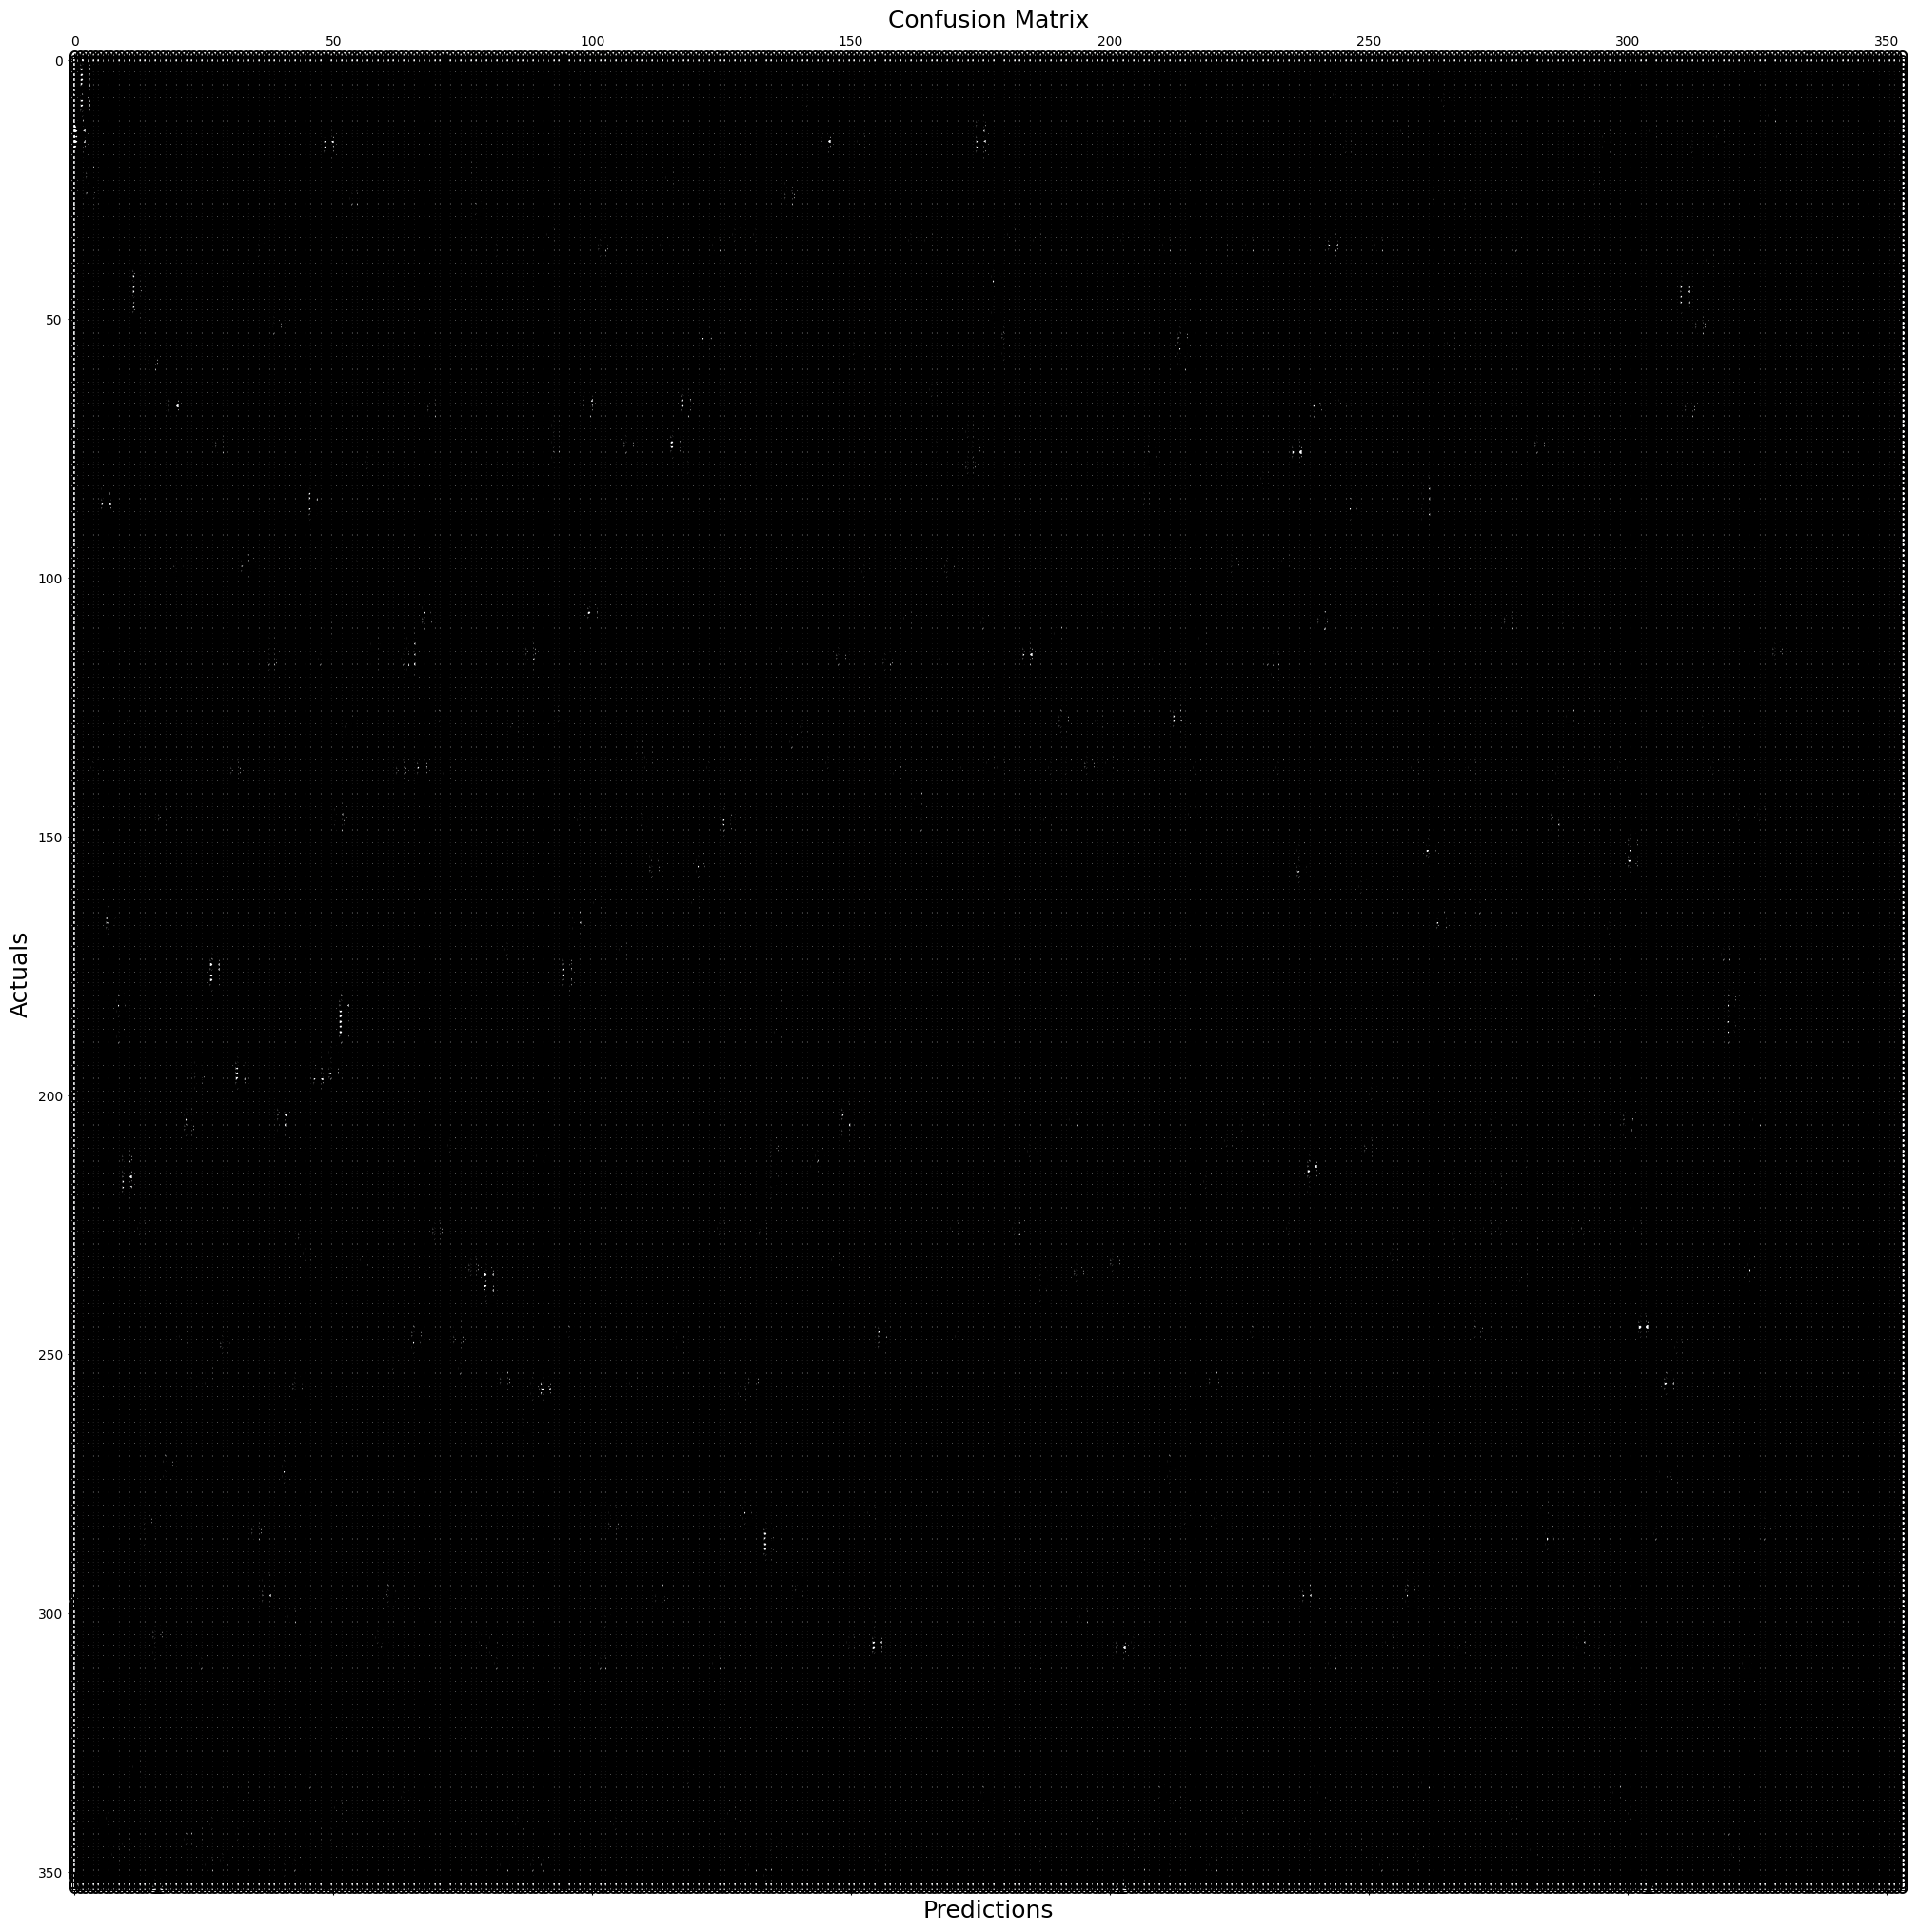

Silhouette Score: 0.3312031787449964
calinski_harabasz Score: 213.89967368591164
davies_bouldin Score: 0.6337749087546592
ari Score: 0.23124184398703396
nmi Score: 0.7905011447833367
fm_index Score: 0.23658961733296338


In [ ]:
conf_matrix=confusion_matrix(ynew, klabels)

fig, ax = plt.subplots(figsize=(25, 25))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xnew, klabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xnew, klabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xnew, klabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ynew, klabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ynew, klabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ynew, klabels)
print(f"fm_index Score: {fm_index}")

In [ ]:
dfc['qs_label'].value_counts().sort_index()

01      1
010     1
02      1
03      1
04      2
       ..
89      3
910     1
97      4
98     29
99      6
Name: qs_label, Length: 242, dtype: int64

In [ ]:
new_df2

1        13        18        19        22        29        30  \
0     2.348287 -0.144763  0.413562  0.740739 -1.277235  0.013485  0.435404   
1     2.131454 -0.081431  0.284334  0.817390 -1.300868 -0.071593  0.446588   
2     2.358305 -0.145859  0.405725  0.747961 -1.305503  0.033899  0.386743   
3     2.155489 -0.060405  0.325666  0.590135 -1.220976 -0.003498  0.439692   
4     2.337363 -0.120844  0.448165  0.636470 -1.394446 -0.084691  0.376348   
...        ...       ...       ...       ...       ...       ...       ...   
1171 -1.962069  1.917883 -0.039235 -2.722078  0.206342 -0.981671  2.584887   
1172 -2.904476  1.670365 -0.279312 -2.577008 -0.347362 -1.800653  1.603661   
1173 -4.291207  0.438695  1.133334 -0.523582  0.399045 -2.179645  0.307964   
1174 -3.192011  1.866288 -0.260491 -2.342490 -0.308459 -2.052903  1.818996   
1175 -3.551449  1.126207  1.068386 -2.815949 -1.263012 -2.384122  1.356647   

            45        51        53  ...       722       727       728  \
0     1.269096 -0.140047 -1.725056  ... -0.928505  1.140695 -1.451722   
1     1.194240 -0.172846 -1.746479  ... -0.899976  1.094258 -1.390011   
2     1.298875 -0.119850 -1.734606  ... -0.925704  1.123495 -1.493501   
3     1.152284 -0.113872 -1.639217  ... -0.889386  1.036766 -1.380167   
4     1.181511 -0.113362 -1.650449  ... -0.757378  1.331156 -1.517943   
...        ...       ...       ...  ...       ...       ...       ...   
1171 -0.781492  0.285889 -0.030710  ...  0.171755  0.788905 -1.352903   
1172 -1.011851 -0.503013 -0.730831  ... -0.129573  1.714932 -2.339944   
1173 -0.786261  1.968517  0.987349  ...  3.351424  2.564982 -1.330868   
1174 -0.896484 -0.424680 -0.655402  ...  0.095515  1.334498 -2.394008   
1175 -1.786861  0.042837 -0.942646  ...  1.340003  1.769350 -2.262579   

           729       732       736       744       759  score  Ques  
0    -1.641054 -1.844009  2.715136  1.142410 -2.330601     10     0  
1    -1.580255 -1.950750  2.657282  1.148131 -2.183963      8     0  
2    -1.636361 -1.828187  2.707419  1.148990 -2.347989      7     0  
3    -1.605538 -1.795472  2.592893  1.204300 -2.216481      5     0  
4    -1.554335 -1.799817  2.736480  1.066568 -2.279187      6     0  
...        ...       ...       ...       ...       ...    ...   ...  
1171 -0.403305 -1.764111 -1.407560 -0.478524 -0.584903      1    30  
1172 -0.203278 -1.632952 -1.606176  0.311400 -1.129538      8    30  
1173 -1.460626 -0.289287 -1.893360  0.641683  0.350203      2    30  
1174 -0.128478 -1.499341 -1.748558  0.299539 -0.952910      8    30  
1175 -0.298696 -1.495439 -1.721198 -0.176546 -1.105921     10    30  

[1176 rows x 197 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[11 11 11 ...  9 25 25]


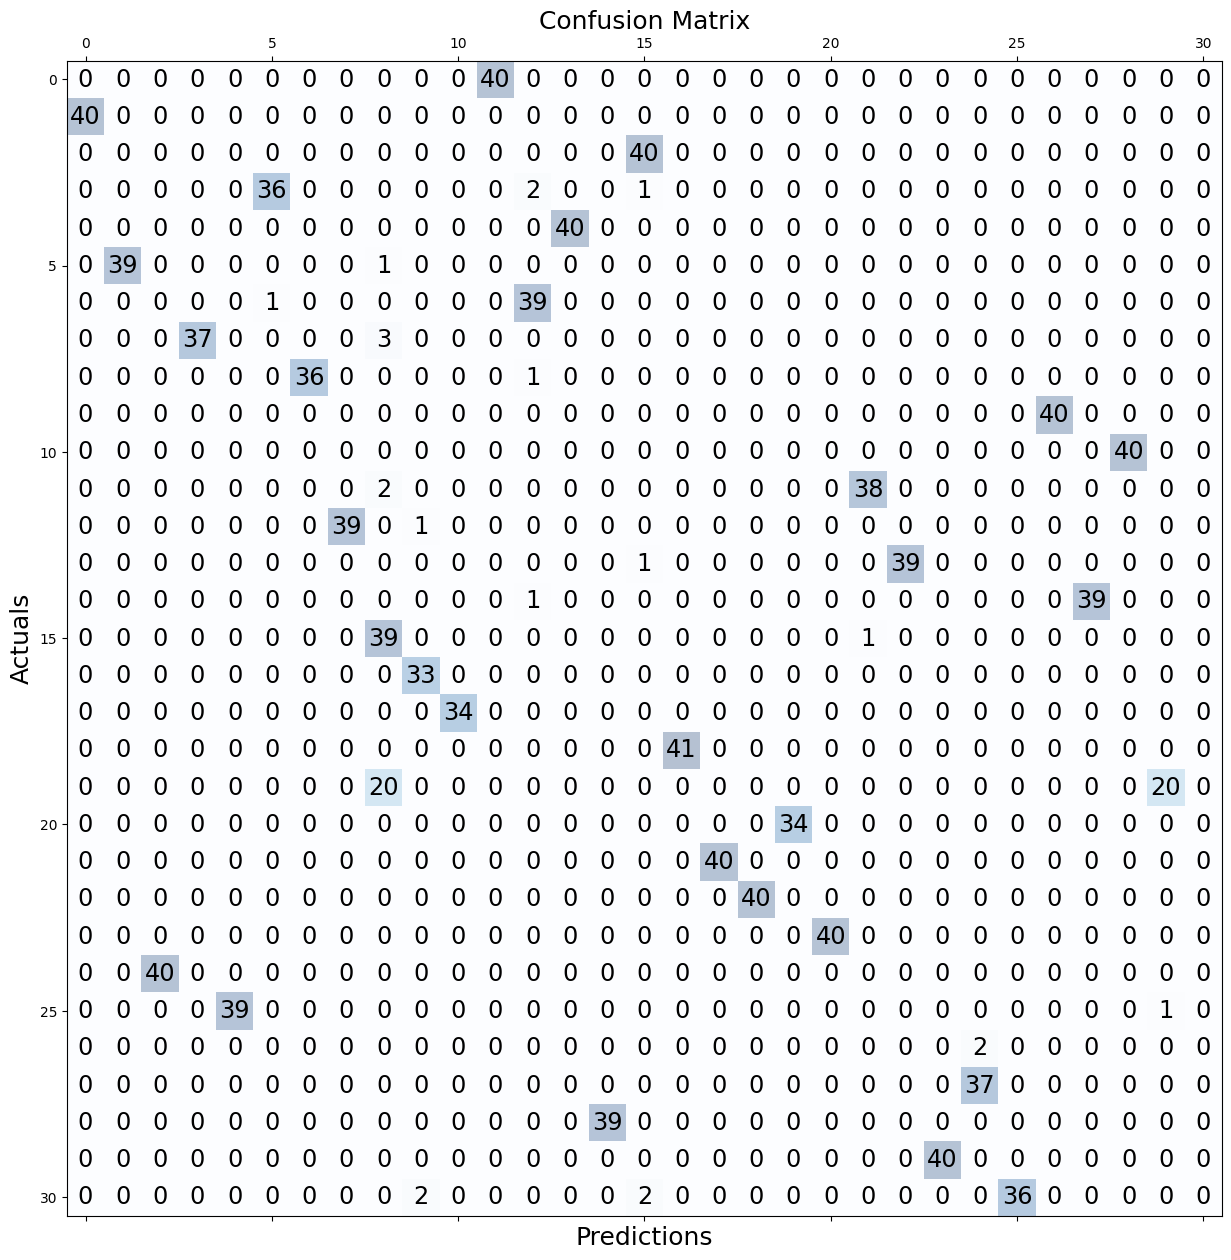

Silhouette Score: 0.5615537873512046
calinski_harabasz Score: 249.64292356907387
davies_bouldin Score: 0.8219263758237166
ari Score: 0.9341967664879637
nmi Score: 0.9694448365544979
fm_index Score: 0.9364397867980063


In [ ]:
#applying kmeans to subset dataset -----------------------------------------
Xcl=new_df2.drop(['score','Ques'], axis=1)
ycl=new_df2['Ques']
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

model_kmeans = KMeans(n_clusters=30, random_state=42)
kmeans_model = model_kmeans.fit(Xcl)
klabels=kmeans_model.labels_
print(klabels)
conf_matrix=confusion_matrix(ycl, klabels)

fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xcl, klabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xcl, klabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xcl, klabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ycl, klabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ycl, klabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ycl, klabels)
print(f"fm_index Score: {fm_index}")

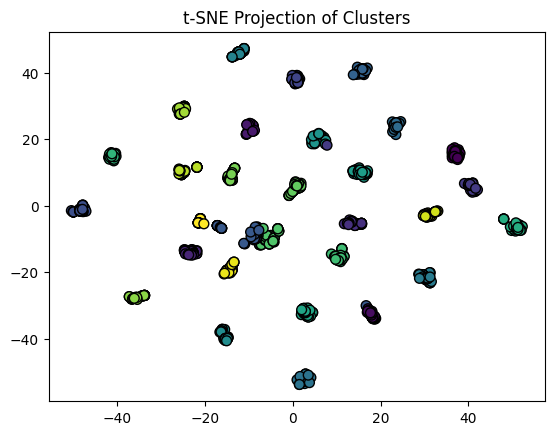

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xcl)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_model.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


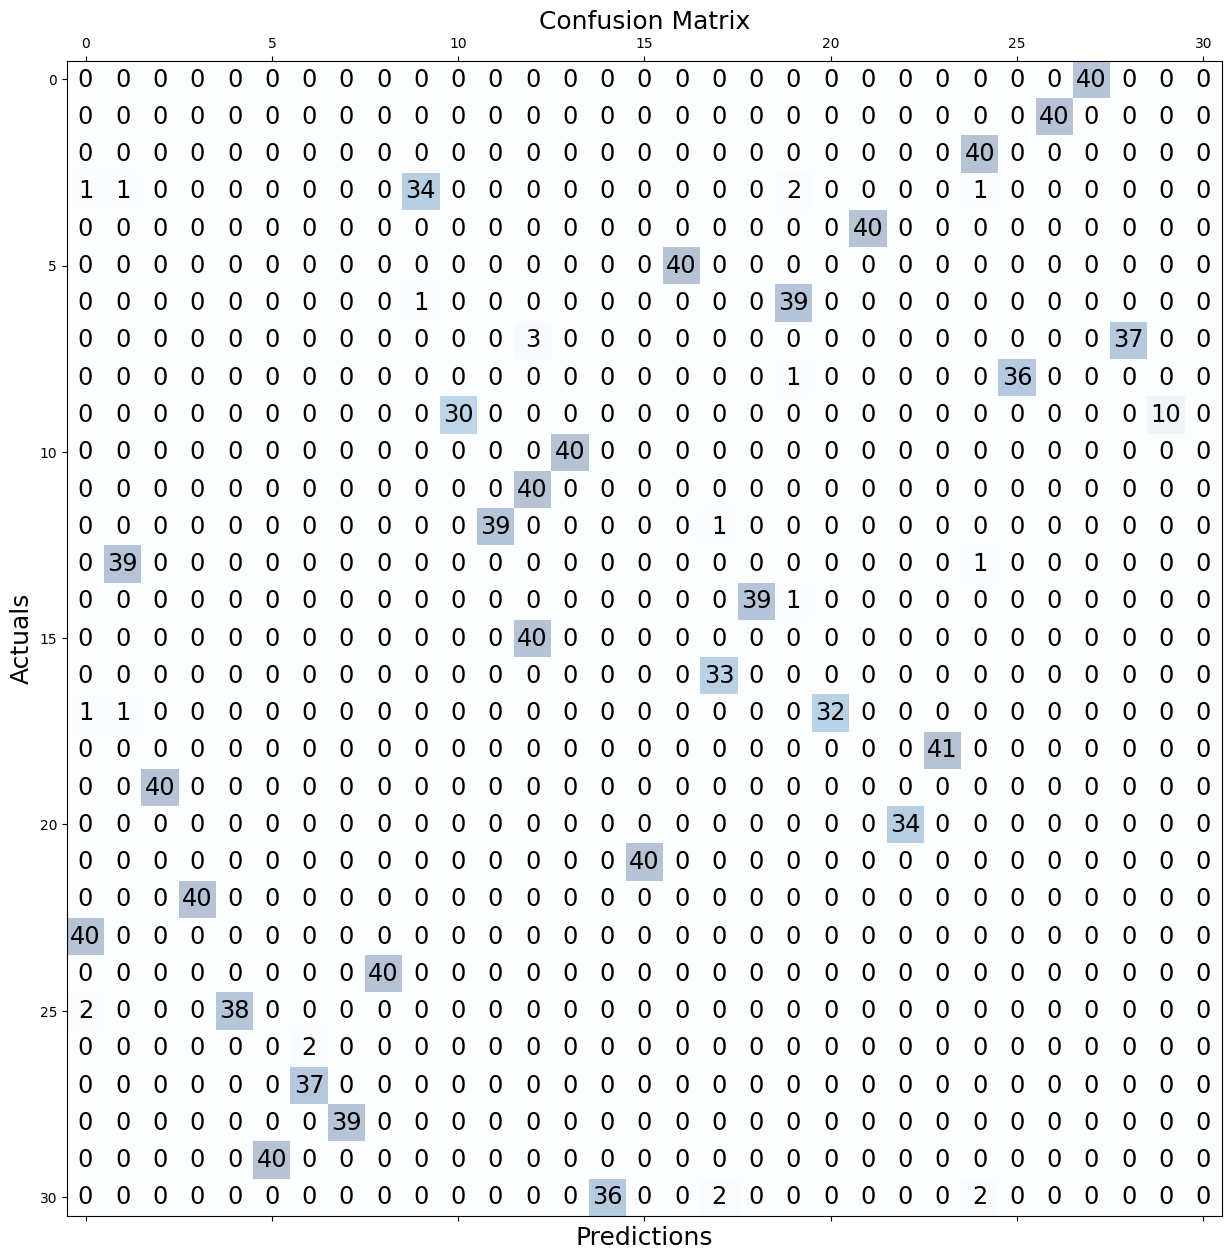

ari Score: 0.9177790951812828
nmi Score: 0.9666483942264095
fm_index Score: 0.9210510949453754
Silhouette Score: 0.5772688338302722
calinski_harabasz Score: 249.65855138024057
davies_bouldin Score: 0.7762071129315494


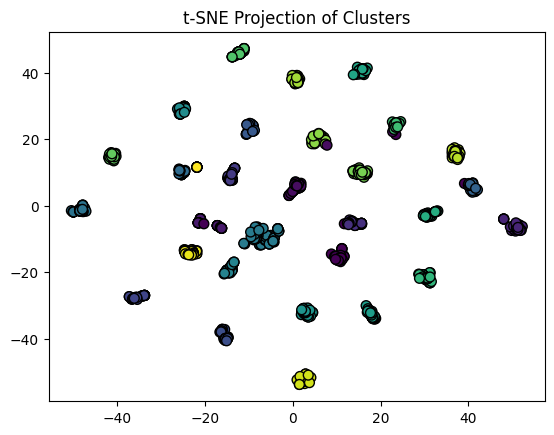

In [ ]:
#hierarchical for subset dataset
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward')
hierar_sub=hierarchical.fit_predict(Xcl)
hierarchical.labels_
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(ycl, hierarchical.labels_)

fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ycl, hierarchical.labels_)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ycl, hierarchical.labels_)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ycl, hierarchical.labels_)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(Xcl, hierarchical.labels_)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xcl, hierarchical.labels_)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xcl, hierarchical.labels_)
print(f"davies_bouldin Score: {davies_bouldin}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_h = tsne.fit_transform(Xcl)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_h[:, 0], X_tsne_h[:, 1], c=hierarchical.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


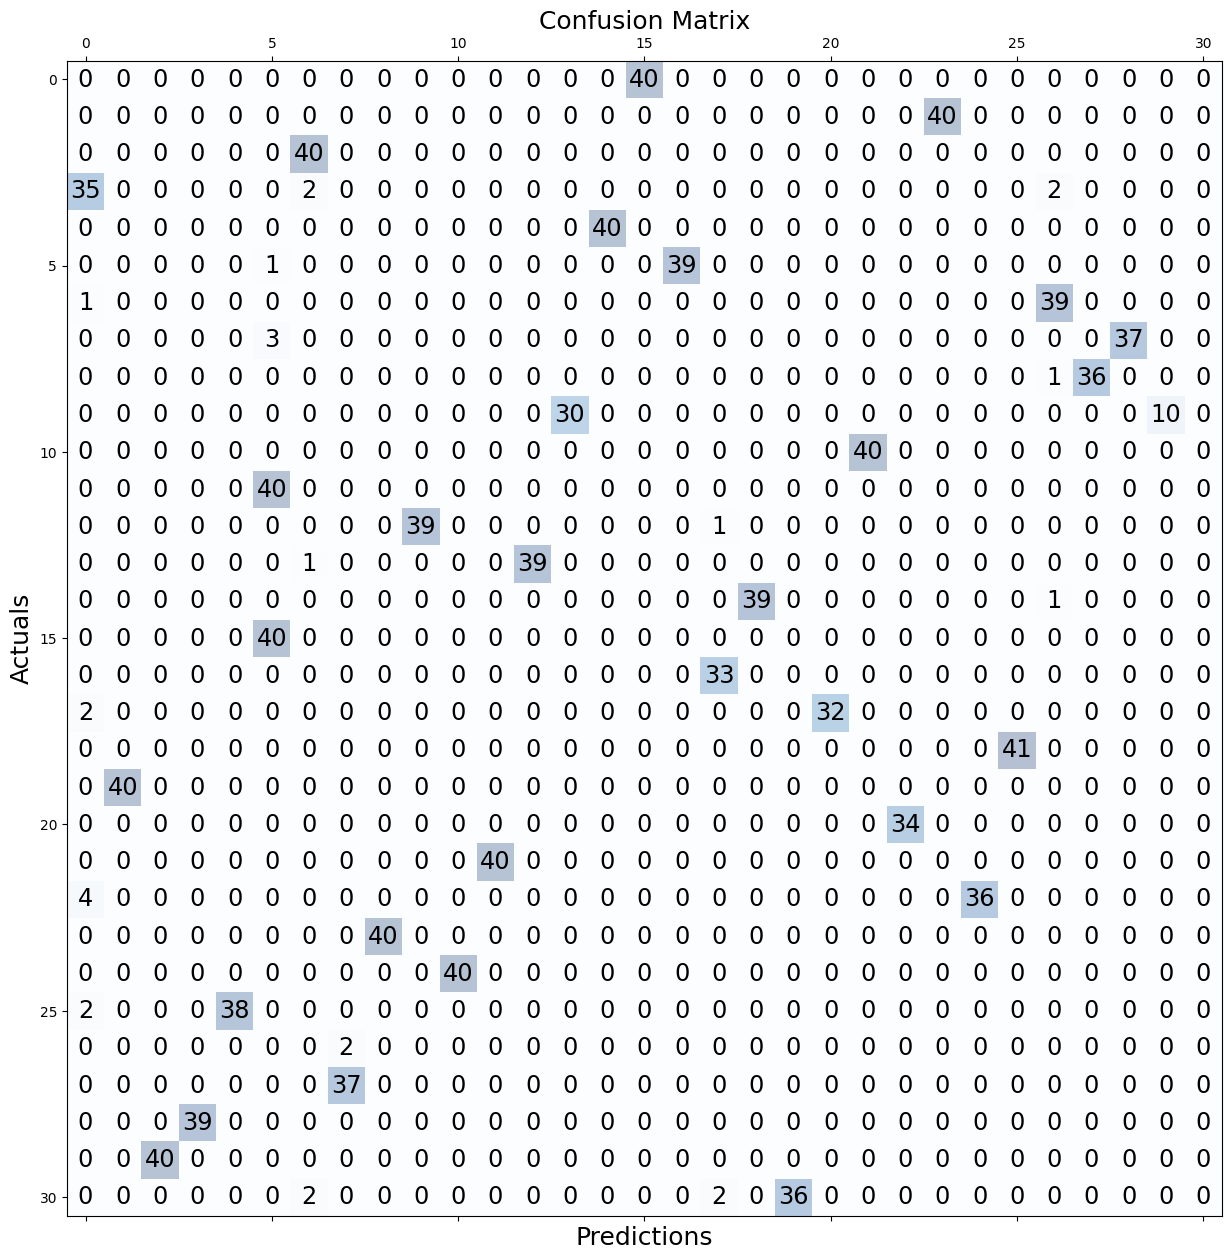

Silhouette Score: 0.6106708218253897
calinski_harabasz Score: 287.2811758020563
davies_bouldin Score: 0.7376797019088916
ari Score: 0.9103299509802532
nmi Score: 0.9639508061731124
fm_index Score: 0.9138789694984824


In [ ]:
#applying hierarchical clustering to entire dataset

hierarchicalt = hierarchical.fit_predict(X2)
hlabels=hierarchical.labels_
conf_matrix=confusion_matrix(y2, hlabels)

fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(X2, hlabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X2, hlabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X2, hlabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y2, hlabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(y2, hlabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(y2, hlabels)
print(f"fm_index Score: {fm_index}")


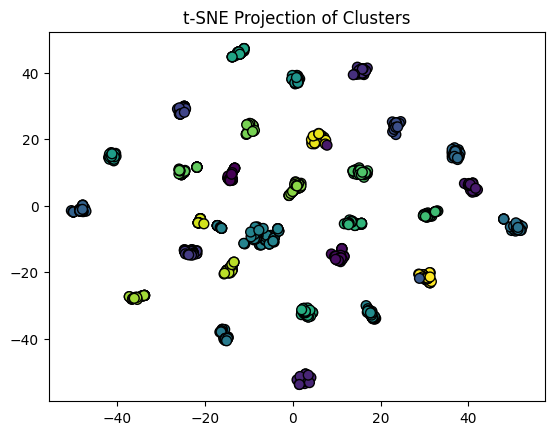

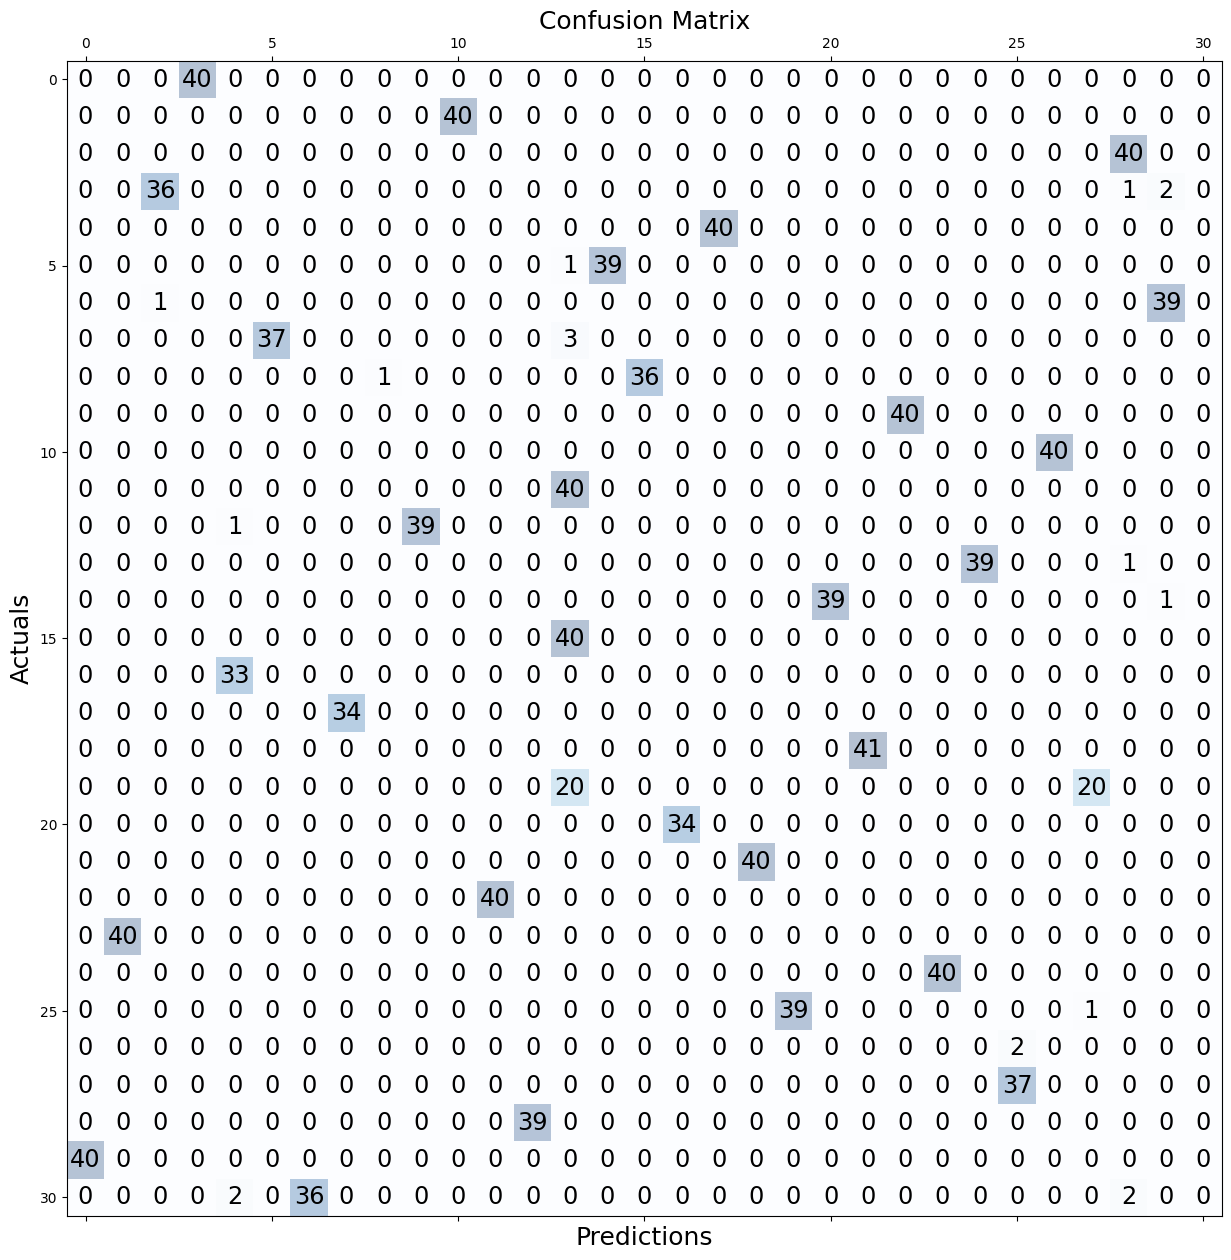

ari Score: 0.8886432611768544
nmi Score: 0.9643014376870255
fm_index Score: 0.8943373083558497
Silhouette Score: 0.5516691572335296
calinski_harabasz Score: 242.0321954524912
davies_bouldin Score: 0.7707488345063016


In [ ]:
#Gaussian Mixture Model (GMM) for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 30, random_state=42)
glabels=gmm.fit_predict(Xcl)
#glabels = gmm.labels_
#glabels = gmm.get_params()['labels_']
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_g = tsne.fit_transform(Xcl)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_g[:, 0], X_tsne_g[:, 1], c=glabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(ycl, glabels)

fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ycl,glabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ycl, glabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ycl, glabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(Xcl, glabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xcl, glabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xcl, glabels)
print(f"davies_bouldin Score: {davies_bouldin}")


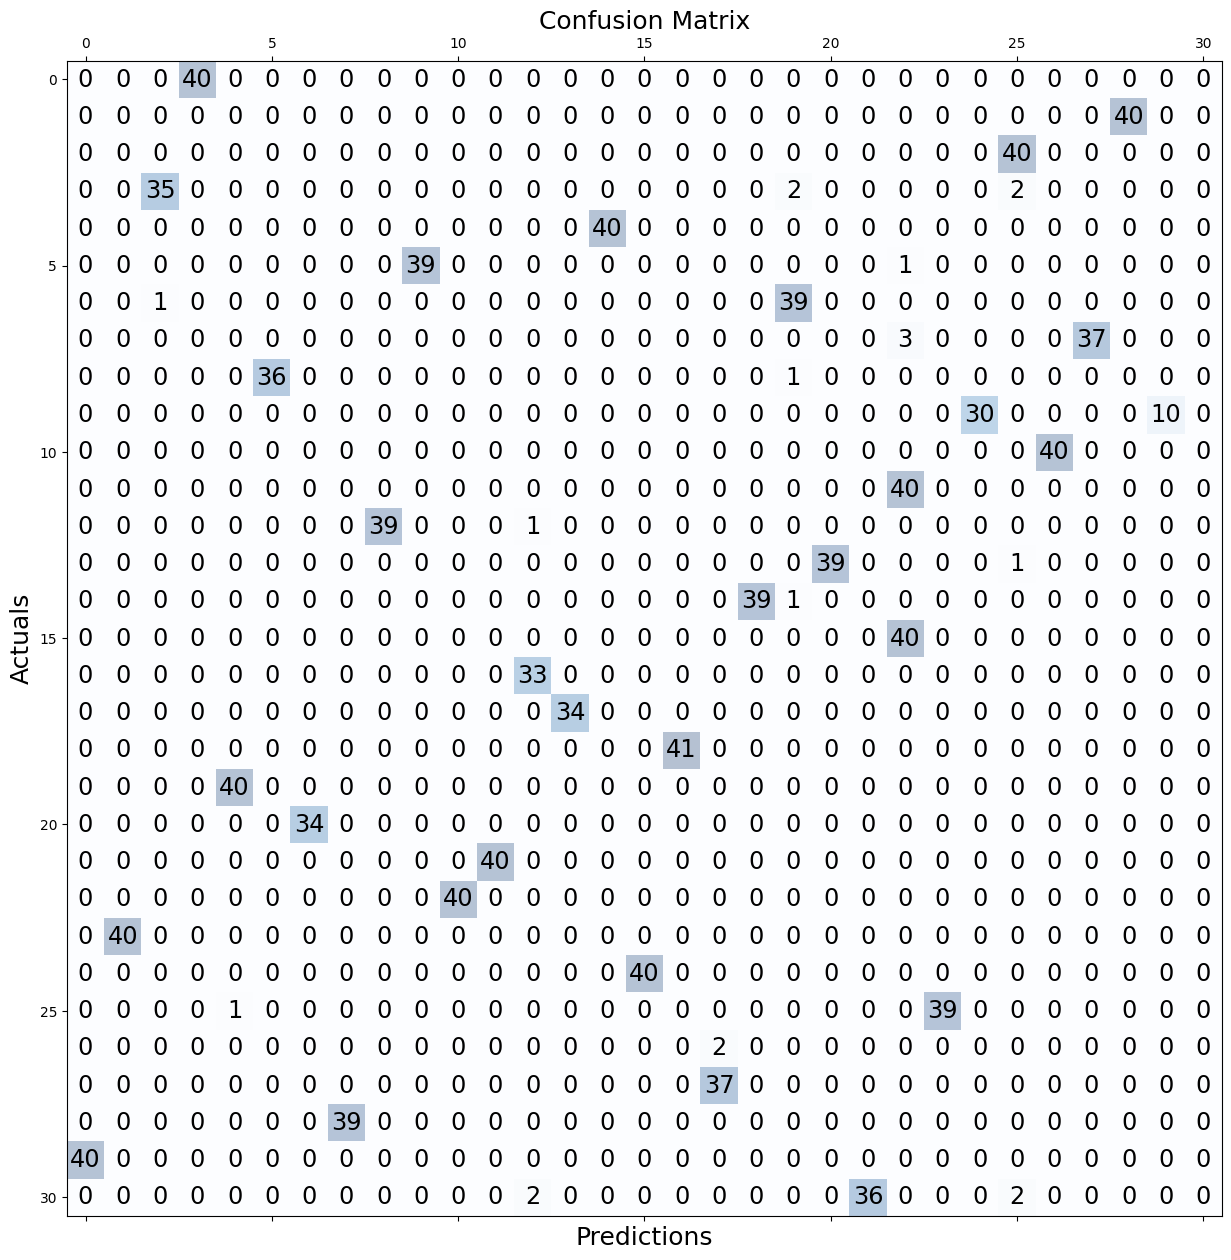

Silhouette Score: 0.6127302444164425
calinski_harabasz Score: 295.21496246489323
davies_bouldin Score: 0.6871441327678184
ari Score: 0.9217127129437509
nmi Score: 0.9700219180212255
fm_index Score: 0.924869463349018


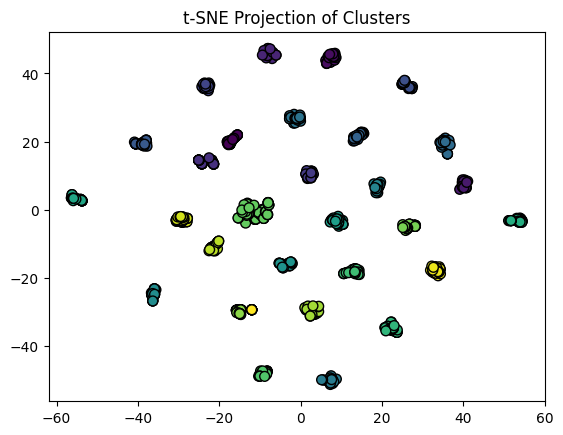

In [ ]:
#applying Gaussian Mixture Model (GMM) to entire dataset

glabelst=gmm.fit_predict(Xk)
conf_matrix=confusion_matrix(y2, glabelst)

fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(X2, glabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X2, glabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X2, glabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y2, glabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(y2, glabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(y2, glabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X2)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=glabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



KMEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
X2=dfc.drop('Questions', axis=1)
y2=dfc['Questions']
# Split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
# kmeans model for subset dataset


In [ ]:
dfc.dtypes

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
765          float64
766          float64
767          float64
score        float64
Questions      int64
Length: 770, dtype: object

In [ ]:
print(y2)

0        0
1        0
2        0
3        0
4        0
        ..
1171    30
1172    30
1173    30
1174    30
1175    30
Name: Questions, Length: 1137, dtype: int64


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}

model = Lasso()
rand_search = RandomizedSearchCV(estimator=model,
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(X2,y2)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+01, tolerance: 5.043e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.395e+01, tolerance: 8.048e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+01, tolerance: 9.179e

0.000760345062456147
-32.93532568898697


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+02, tolerance: 9.256e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#best alpha=0.004493782479070396
#applying lasso again with hyperparam tuning
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Initialize the LASSO model
alpha = 0.004493782479070396 # Regularization strength (adjustable parameter)
lasso_model_hp = Lasso(alpha=alpha, random_state=42)

# Train the LASSO model
lasso_model_hp.fit(X2, y2)

# Display the learned coefficients
print("Learned Coefficients:")
print(lasso_model_hp.coef_)
lasso_res_hp = [index for index, value in enumerate(lasso_model_hp.coef_) if value != 0]

print("Indexes of non-zero numbers:", lasso_res_hp)

Learned Coefficients:
[ 0.00000000e+00 -1.76060950e-01  3.38164476e-01 -1.30945043e-02
  2.41607235e-01  0.00000000e+00  0.00000000e+00  6.91090021e-03
  4.30985068e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  3.42403850e-02  1.96542810e-01 -0.00000000e+00  8.45700385e-04
 -0.00000000e+00  0.00000000e+00 -2.24569607e-01 -0.00000000e+00
 -0.00000000e+00 -1.67427544e-01  2.03992234e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  8.39635234e-02
 -5.84919541e-02 -2.28854415e-02 -2.01838798e-01  0.00000000e+00
  1.08720541e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.16327614e-02 -0.00000000e+00
 -0.00000000e+00 -4.79735413e-02 -0.00000000e+00  1.87154338e-01
  0.00000000e+00  4.23891198e-01 -3.09250507e-01 -6.83542413e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  5.55501932e-01
 -1.20482401e-01 -1.74348095e-03  3.74183406e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.766e+02, tolerance: 9.256e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
X2.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '759', '760', '761', '762', '763', '764', '765', '766', '767', 'score'],
      dtype='object', length=769)

In [ ]:

import pandas as pd

# Assuming you have a DataFrame named original_df

# List of features you want to select
selected_features =  ['1', '2', '3', '4', '7', '8', '9', '13', '16', '18', '21', '22', '27', '29', '30', '34', '35', '38', '41', '45', '46', '47', '51', '52', '54', '61', '62',
                      '63', '64', '68', '70', '71', '77', '78', '80', '81', '82', '84', '85', '87', '89', '90', '91', '92', '93', '94', '95', '97', '98', '99', '109', '110',
                      '112', '114', '116', '119', '127', '128', '129', '131', '133', '134', '136', '137', '138', '139', '141', '142', '149', '151', '152', '153', '156',
                      '157', '159', '161', '165', '166', '167', '168', '169', '170', '174', '176', '177', '178', '179', '181', '186', '187', '188', '189', '192', '193',
                      '196', '200', '201', '204', '205', '207', '208', '212', '214', '218', '220', '221', '226', '231', '233', '239', '240', '243', '246', '247', '249',
                      '250', '253', '255', '257', '259', '269', '271', '278', '279', '280', '282', '283', '284', '287', '290', '293', '297', '303', '304', '305', '308',
                      '315', '318', '319', '321', '323', '324', '327', '328', '332', '333', '334', '335', '336', '338', '341', '345', '350', '355', '360', '362', '364',
                      '366', '367', '370', '371', '376', '379', '381', '383', '385', '387', '388', '390', '391', '392', '394', '395', '398', '405', '406', '410', '414',
                      '419', '420', '422', '423', '425', '426', '427', '431', '433', '434', '435', '437', '442', '444', '452', '455', '457', '458', '460', '462', '465',
                      '468', '469', '473', '474', '477', '478', '483', '488', '489', '490', '492', '495', '496', '499', '500', '503', '505', '506', '507', '509', '511',
                      '512', '516', '518', '519', '521', '523', '529', '530', '531', '535', '540', '543', '546', '547', '548', '551', '552', '554', '557', '559', '560',
                      '561', '569', '572', '576', '577', '578', '579', '580', '583', '584', '586', '587', '588', '589', '593', '594', '596', '600', '601', '602', '603',
                      '604', '608', '611', '612', '616', '618', '619', '625', '627', '628', '630', '631', '633', '639', '641', '644', '645', '647', '653', '654', '655',
                      '656', '661', '663', '664', '665', '666', '667', '669', '670', '674', '675', '676', '677', '678', '679', '680', '686', '688', '689', '691', '692',
                      '694', '696', '697', '699', '700', '702', '703', '705', '706', '709', '710', '711', '714', '718', '719', '722', '727', '728', '729', '735', '742',
                      '744', '747', '755', '759', '766', 'score', 'Questions']

# Create a new DataFrame with selected features
new_df2 = dfc[selected_features].copy()

# Display the new DataFrame
print(new_df2)


             1         2         3         4         7         8         9  \
0     2.348287  1.030452 -1.503548 -0.380958 -1.657276  0.780015  0.224140   
1     2.131454  1.117223 -1.542901 -0.351417 -1.812830  0.707280  0.165037   
2     2.358305  0.994477 -1.480365 -0.382565 -1.669257  0.800453  0.265268   
3     2.155489  1.027737 -1.424550 -0.316464 -1.789147  0.725883  0.298638   
4     2.337363  1.050743 -1.506995 -0.321872 -1.603735  0.730069  0.242844   
...        ...       ...       ...       ...       ...       ...       ...   
1171 -1.962069 -0.794640  1.148723 -0.897512 -0.204680 -0.996293  0.031537   
1172 -2.904476 -2.231147  0.918863 -0.961818  0.092465 -0.959193  0.037899   
1173 -4.291207  0.067668  0.439347  1.269486 -0.827843  0.060943 -2.945170   
1174 -3.192011 -2.486930  0.841529 -1.150033  0.260370 -1.058991  0.145268   
1175 -3.551449 -2.228937  1.091194  0.057393  0.323767 -1.209660 -0.455758   

            13        16        18  ...       729       735    

In [ ]:
dfc.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '760', '761', '762', '763', '764', '765', '766', '767', 'score',
       'Questions'],
      dtype='object', length=770)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 6  6  6 ... 25 21 21]


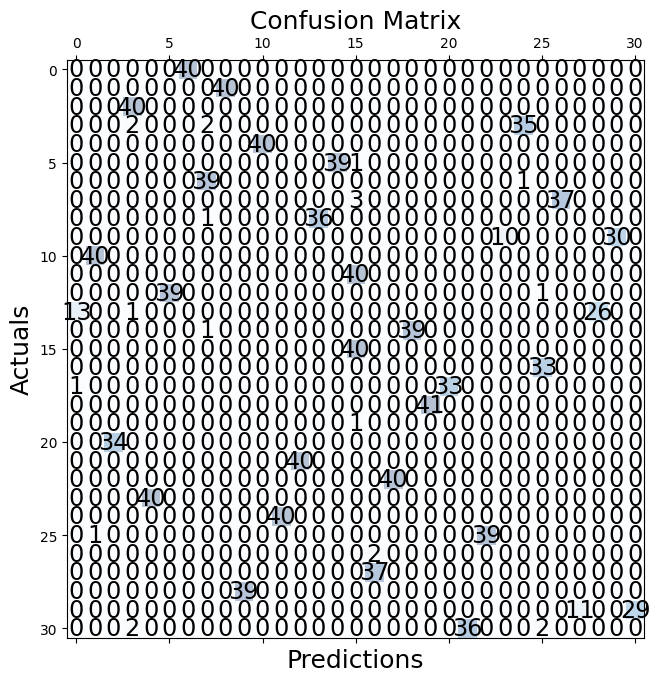

Silhouette Score: 0.5895508959579826
calinski_harabasz Score: 262.03897086567207
davies_bouldin Score: 0.73842325539111
ari Score: 0.8994552964334998
nmi Score: 0.9608314543348828
fm_index Score: 0.9031216924501031


In [ ]:
#applying kmeans to entire dataset -----------------------------------------
Xk=dfc.drop('Questions', axis=1)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

model_kmeans = KMeans(n_clusters=31, random_state=42)
kmeans_model = model_kmeans.fit(Xk)
klabels=kmeans_model.labels_
print(klabels)
conf_matrix=confusion_matrix(y2, klabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(X2, klabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X2, klabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X2, klabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(dfc['Questions'], klabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(dfc['Questions'], klabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(dfc['Questions'], klabels)
print(f"fm_index Score: {fm_index}")

In [ ]:
data_with_clusters = pd.DataFrame(data=X2, columns=X2.columns)
clusters = model_kmeans.fit_predict(Xk)
data_with_clusters["Cluster"] = clusters
cluster_distribution = pd.crosstab(data_with_clusters["Cluster"], y2)

print("\nCluster Distribution Across Target Variable:")
print(cluster_distribution)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Distribution Across Target Variable:
Questions  0   1   2   3   4   5   6   7   8   9   ...  21  22  23  24  25  \
Cluster                                            ...                       
0           0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
1           0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   1   
2           0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
3           0   0  40   2   0   0   0   0   0   0  ...   0   0   0   0   0   
4           0   0   0   0   0   0   0   0   0   0  ...   0   0  40   0   0   
5           0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
6          40   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
7           0   0   0   2   0   0  39   0   1   0  ...   0   0   0   0   0   
8           0  40   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
9           0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
10          0   0 

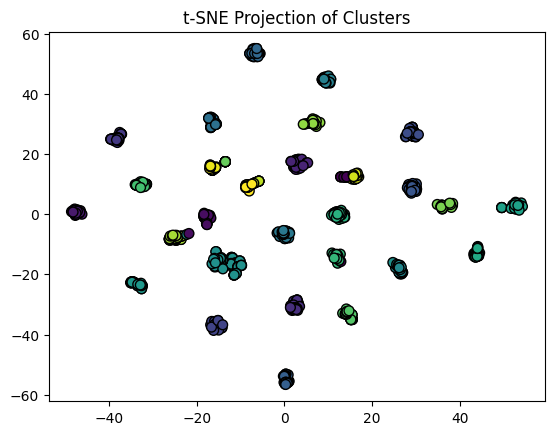

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xk)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_model.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

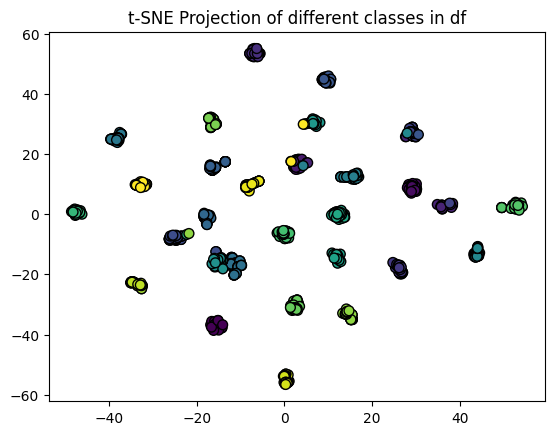

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xk)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y2, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of different classes in df')
plt.show()

In [ ]:
dfc.shape

(1137, 770)

In [ ]:
dfc = dfc.reset_index(drop=True)

In [ ]:
print(dfc['Questions'])

0        0
1        0
2        0
3        0
4        0
        ..
1132    30
1133    30
1134    30
1135    30
1136    30
Name: Questions, Length: 1137, dtype: int64


In [ ]:
len(dfc)

1137

In [ ]:
dfc.shape

(1137, 771)

In [ ]:
dfc.head()

0         1         2         3         4         5         6  \
0 -1.355365  2.348287  1.030452 -1.503548 -0.380958  1.095197 -2.063201   
1 -1.403411  2.131454  1.117223 -1.542901 -0.351417  1.042730 -2.025140   
2 -1.388594  2.358305  0.994477 -1.480365 -0.382565  1.104627 -2.042682   
3 -1.352139  2.155489  1.027737 -1.424550 -0.316464  1.111701 -2.039937   
4 -1.411875  2.337363  1.050743 -1.506995 -0.321872  1.118751 -2.068671   

          7         8         9  ...       761       762       763       764  \
0 -1.657276  0.780015  0.224140  ... -1.660974 -2.150713  0.545611 -1.614411   
1 -1.812830  0.707280  0.165037  ... -1.674375 -2.027182  0.514854 -1.625416   
2 -1.669257  0.800453  0.265268  ... -1.651969 -2.149015  0.582454 -1.606852   
3 -1.789147  0.725883  0.298638  ... -1.595799 -2.143987  0.419316 -1.635483   
4 -1.603735  0.730069  0.242844  ... -1.607142 -2.184134  0.521283 -1.604708   

        765       766       767  score  Questions  Label  
0 -0.133085 -2.134145  1.184289   10.0          0    198  
1  0.014533 -2.156347  1.088794    8.0          0    198  
2 -0.164269 -2.139201  1.158317    7.0          0    198  
3 -0.074271 -2.112344  1.094625    5.0          0    198  
4 -0.055002 -2.056900  1.290956    6.0          0    198  

[5 rows x 771 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[240 240 240 ...  59  94 298]


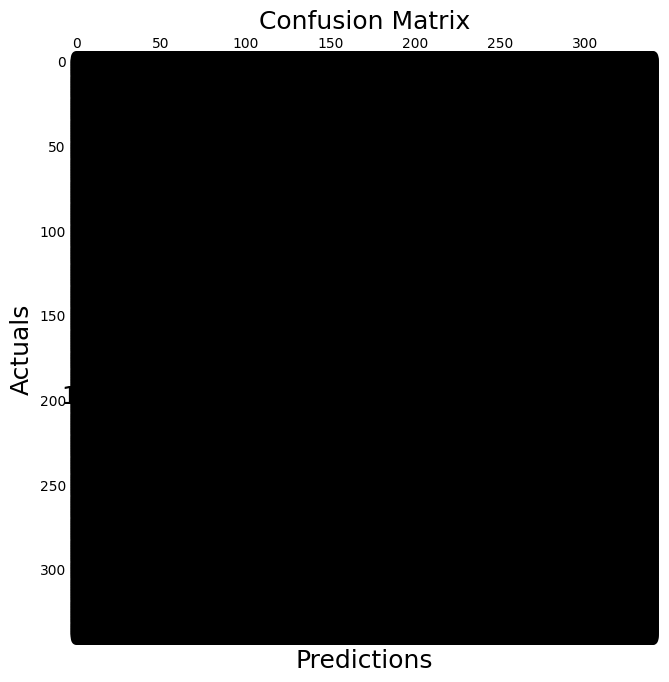

Silhouette Score: 0.2674885969046286
calinski_harabasz Score: 185.4524377840634
davies_bouldin Score: 0.6673425573587779
ari Score: 0.0
nmi Score: 0.0
fm_index Score: 0.07717030909356681


In [ ]:
#applying kmeans to the dataset withn the appended feature of (Questions, score) renamed as Label with values 0-340 (11*31=341)

Xnew=dfc.drop('Label', axis=1)
ynew=dfc['Label']
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

model_kmeans = KMeans(n_clusters=341, random_state=42)
kmeans_model = model_kmeans.fit(Xnew)
klabels=kmeans_model.labels_
print(klabels)
conf_matrix=confusion_matrix(ynew, klabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xnew, klabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xnew, klabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xnew, klabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ynew, klabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ynew, klabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ynew, klabels)
print(f"fm_index Score: {fm_index}")

In [ ]:
#applying kmeans to subset dataset -----------------------------------------
Xcl=new_df2.drop('Cluster', axis=1)
ycl=new_df2['Cluster']
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

model_kmeans = KMeans(n_clusters=31, random_state=42)
kmeans_model = model_kmeans.fit(Xcl)
klabels=kmeans_model.labels_
print(klabels)
conf_matrix=confusion_matrix(ycl, klabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xcl, klabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xcl, klabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xcl, klabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ycl, klabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ycl, klabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ycl, klabels)
print(f"fm_index Score: {fm_index}")

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xcl)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_model.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

In [ ]:
#hierarchical for subset dataset
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=31, affinity='euclidean', linkage='ward')
hierar_sub=hierarchical.fit_predict(Xcl)
hierarchical.labels_
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(ycl, hierarchical.labels_)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ycl, hierarchical.labels_)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ycl, hierarchical.labels_)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ycl, hierarchical.labels_)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(Xcl, hierarchical.labels_)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xcl, hierarchical.labels_)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xcl, hierarchical.labels_)
print(f"davies_bouldin Score: {davies_bouldin}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_h = tsne.fit_transform(Xcl)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_h[:, 0], X_tsne_h[:, 1], c=hierarchical.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

In [ ]:
#applying hierarchical clustering to entire dataset

hierarchicalt = hierarchical.fit_predict(X2)
hlabels=hierarchical.labels_
conf_matrix=confusion_matrix(y2, hlabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(X2, hlabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X2, hlabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X2, hlabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y2, hlabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(y2, hlabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(y2, hlabels)
print(f"fm_index Score: {fm_index}")


In [ ]:
#Gaussian Mixture Model (GMM) for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 31, random_state=42)
glabels=gmm.fit_predict(Xcl)
#glabels = gmm.labels_
#glabels = gmm.get_params()['labels_']
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_g = tsne.fit_transform(Xcl)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_g[:, 0], X_tsne_g[:, 1], c=glabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(ycl, glabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ycl,glabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ycl, glabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ycl, glabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(Xcl, glabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xcl, glabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xcl, glabels)
print(f"davies_bouldin Score: {davies_bouldin}")


In [ ]:
#applying Gaussian Mixture Model (GMM) to entire dataset

glabelst=gmm.fit_predict(Xk)
conf_matrix=confusion_matrix(y2, glabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(X2, glabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X2, glabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X2, glabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y2, glabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(y2, glabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(y2, glabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X2)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=glabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

